### Note : I am taking 5000 points as per Applied AI instructions
* Previously i tried to build bytes bigram file with all data points twice firstly without multi threading and secondly with multi threading my laptop got hanged So then i mailed your team, they told me to run only 5000 points

# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

### Note : I am taking 5000 points as per Applied AI instructions
* Previously i tried to build bytes bigram file with all data points twice firstly without multi threading and secondly with multi threading my laptop got hanged So then i mailed your team, they told me to run only 5000 points

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#separating byte files and asm files 

source = 'train'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    asm_files = os.listdir(source)
    for file in asm_files:
        if (file.endswith("bytes")):

            shutil.move(source+"/"+file,destination)

### Code to move top 5000 files in bytesFiles_5000 folder

In [ ]:
data=[i for i in range(0,5000)]
random.shuffle(data)

In [2]:
source = 'byteFiles'
destination = 'byteFiles_5000'

if not os.path.isdir(destination):
    os.makedirs(destination)
count = 1
if os.path.isdir(source):
    files = os.listdir(source)
    for file in files:
        if(count<=5000):
            shutil.move(source+"/"+file,destination)
            count=count+1
        else:
            break

<h2>3.1. Distribution of malware classes in whole data set </h2>

In [26]:
Y=pd.read_csv("trainLabels.csv")

In [31]:
Y.columns

Index(['Id', 'Class'], dtype='object')

In [33]:
files = os.listdir('byteFiles_5000')
files=pd.DataFrame(files,columns=['Id'])
files['Id'] = files['Id'].apply(lambda x: x.split('.')[0])

In [35]:
Y = pd.merge(files,Y,on='Id',how='left')

In [37]:
Y.shape

(5000, 2)

<IPython.core.display.Javascript object>


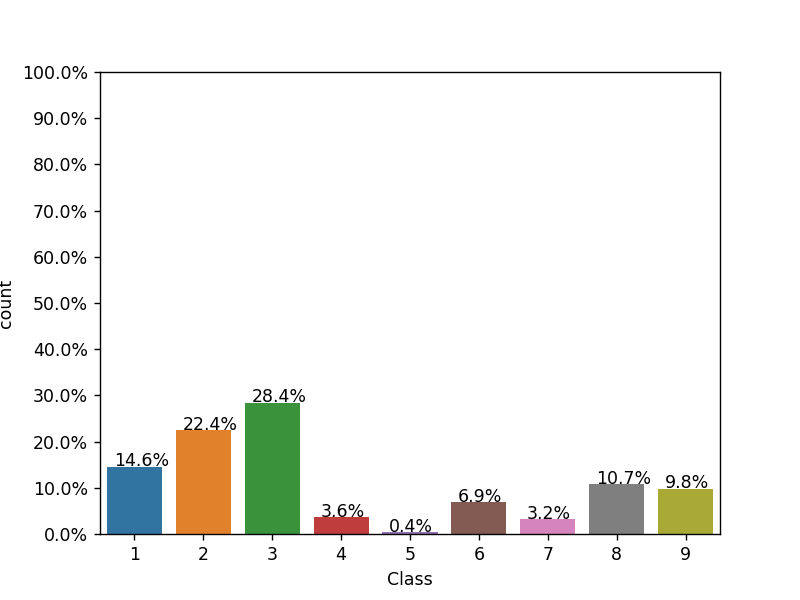

In [38]:
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [5]:
#file sizes of byte files

files=os.listdir('byteFiles_5000')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles_5000/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles_5000/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01IsoiSMh5gxyDYTl4CB  6.556152      2
1  01kcPWA9K2BOxQeS5Rju  0.679688      1
2  02JqQ7H3yEoD8viYWlmS  8.425293      2
3  02K5GMYITj7bBoAisEmD  0.977051      2
4  02MRILoE6rNhmt7FUi45  8.368652      2


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


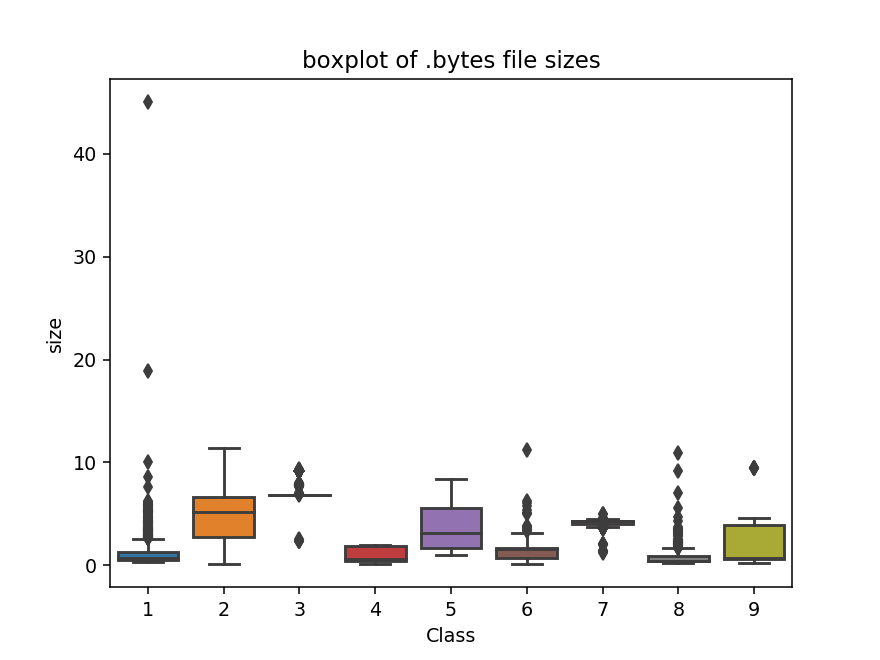

In [5]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [2]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles_5000')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles_5000/'+file+".txt", 'w+')
        with open('byteFiles_5000/'+file+'.bytes',"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles_5000/'+file+'.bytes')
        text_file.close()

files = os.listdir('byteFiles_5000')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)


In [39]:
result=pd.read_csv("result_with_size.csv")
result.head()

Unnamed: 0                    ID       0     1     2     3     4     5  \
0           0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1           1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2           2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3           3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4           4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   

      6     7  ...      f9    fa    fb    fc    fd     fe     ff     ??  \
0  3650  3201  ...    3101  3211  3097  2758  3099   2759   5753   1824   
1  8420  7589  ...     439   281   302  7639   518  17001  54902   8588   
2  9007  2342  ...    2242  2885  2863  2471  2786   2680  49144    468   
3   550   523  ...     485   462   516  1133   471    761   7998  13940   
4   262   249  ...     350   209   239   653   221    242   2199   9008   

       size  Class  
0  4.234863      9  
1  5.538818      2  
2  3.887939      9  
3  0.574219      1  
4  0.370850      8  

[5 rows x 261 columns]

In [40]:
files = os.listdir('byteFiles_5000')
files=pd.DataFrame(files,columns=['ID'])
files['ID'] = files['ID'].apply(lambda x: x.split('.')[0])

In [41]:
result = pd.merge(files, result,on='ID', how='inner')
result.head()

ID  Unnamed: 0       0     1     2     3     4     5  \
0  01azqd4InC7m9JpocGv5           0  601905  3905  2816  3832  3345  3242   
1  01IsoiSMh5gxyDYTl4CB           1   39755  8337  7249  7186  8663  6844   
2  01jsnpXSAlgw6aPeDxrU           2   93506  9542  2568  2438  8925  9330   
3  01kcPWA9K2BOxQeS5Rju           3   21091  1213   726   817  1257   625   
4  01SuzwMJEIXsK7A8dQbl           4   19764   710   302   433   559   410   

      6     7  ...      f9    fa    fb    fc    fd     fe     ff     ??  \
0  3650  3201  ...    3101  3211  3097  2758  3099   2759   5753   1824   
1  8420  7589  ...     439   281   302  7639   518  17001  54902   8588   
2  9007  2342  ...    2242  2885  2863  2471  2786   2680  49144    468   
3   550   523  ...     485   462   516  1133   471    761   7998  13940   
4   262   249  ...     350   209   239   653   221    242   2199   9008   

       size  Class  
0  4.234863      9  
1  5.538818      2  
2  3.887939      9  
3  0.574219      1  
4  0.370850      8  

[5 rows x 261 columns]

In [42]:
result.shape

(5000, 261)

In [43]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [44]:
data_y = result['Class']
result.head()

ID  Unnamed: 0         0         1         2         3  \
0  01azqd4InC7m9JpocGv5      0.0000  0.527809  0.008309  0.002647  0.002067   
1  01IsoiSMh5gxyDYTl4CB      0.0002  0.034861  0.017739  0.006813  0.003876   
2  01jsnpXSAlgw6aPeDxrU      0.0004  0.081995  0.020303  0.002414  0.001315   
3  01kcPWA9K2BOxQeS5Rju      0.0006  0.018495  0.002581  0.000682  0.000441   
4  01SuzwMJEIXsK7A8dQbl      0.0008  0.017331  0.001511  0.000284  0.000234   

          4         5         6         7  ...          f9        fa  \
0  0.002048  0.001835  0.002058  0.005531  ...    0.015454  0.014476   
1  0.005303  0.003873  0.004747  0.013114  ...    0.002188  0.001267   
2  0.005464  0.005280  0.005078  0.004047  ...    0.011173  0.013007   
3  0.000770  0.000354  0.000310  0.000904  ...    0.002417  0.002083   
4  0.000342  0.000232  0.000148  0.000430  ...    0.001744  0.000942   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.014457  0.031724  0.017358  0.014348  0.019206  0.000129  0.091636      9  
1  0.001410  0.087867  0.002901  0.088411  0.183282  0.000606  0.120671      2  
2  0.013365  0.028423  0.015605  0.013937  0.164060  0.000033  0.083910      9  
3  0.002409  0.013032  0.002638  0.003957  0.026700  0.000984  0.010123      1  
4  0.001116  0.007511  0.001238  0.001258  0.007341  0.000636  0.005594      8  

[5 rows x 261 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


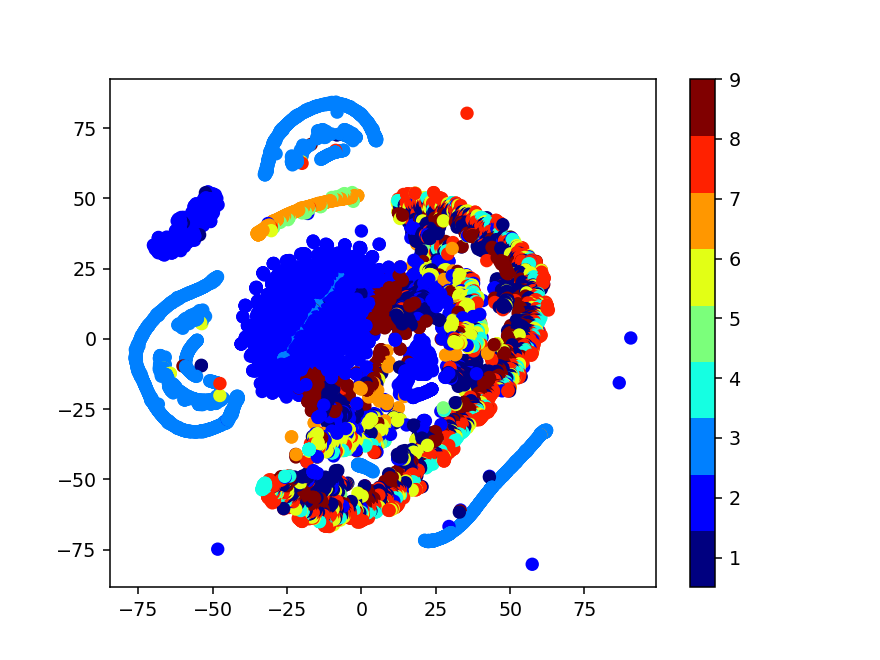

In [11]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


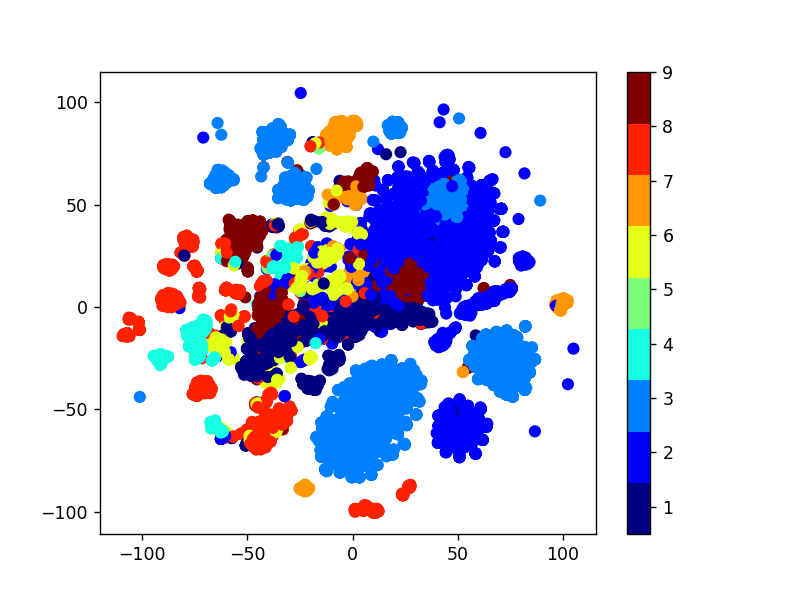

In [0]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [30]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [31]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 3200
Number of data points in test data: 1000
Number of data points in cross validation data: 800


<IPython.core.display.Javascript object>


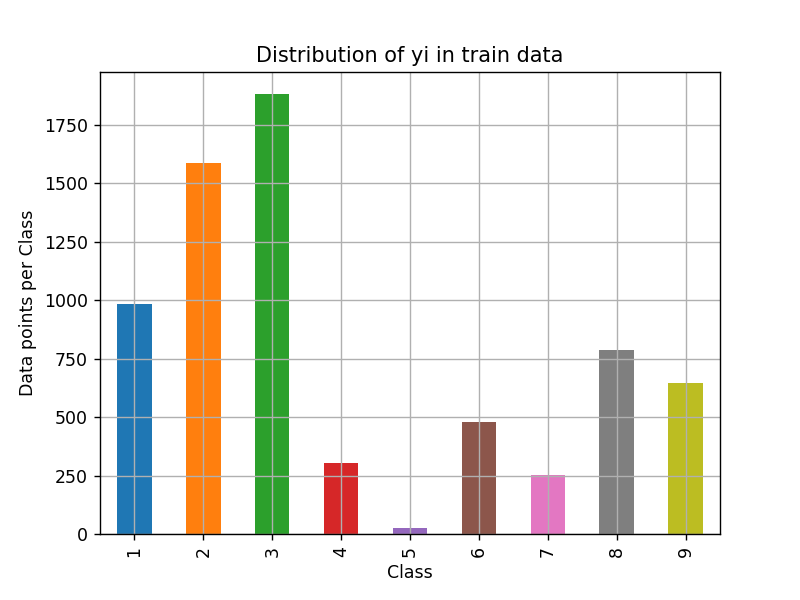

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


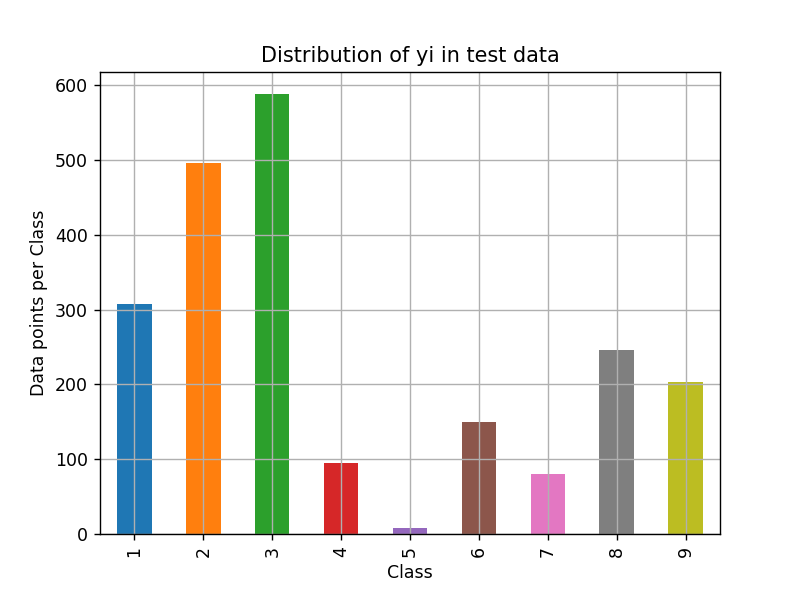

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


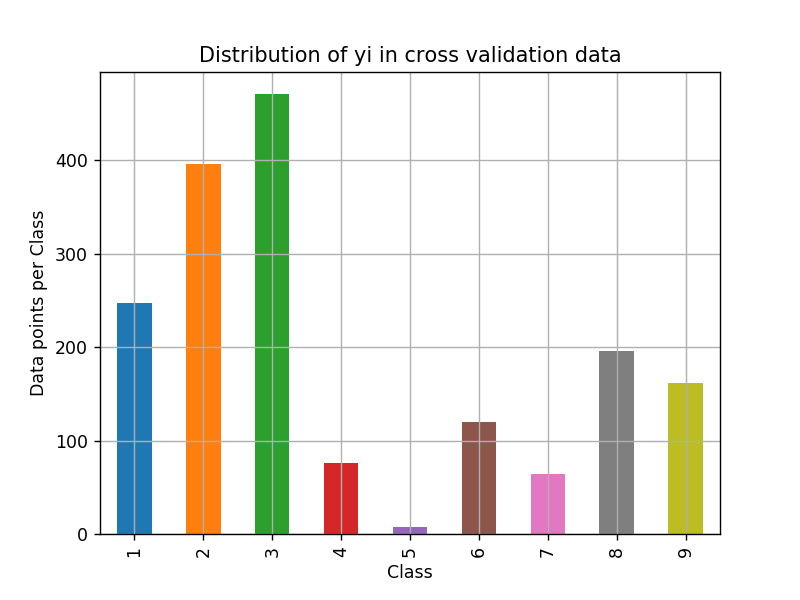

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [29]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

#my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', )
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
#my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [100]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.45615644965
Log loss on Test Data using Random Model 2.48503905509
Number of misclassified points  88.5004599816
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


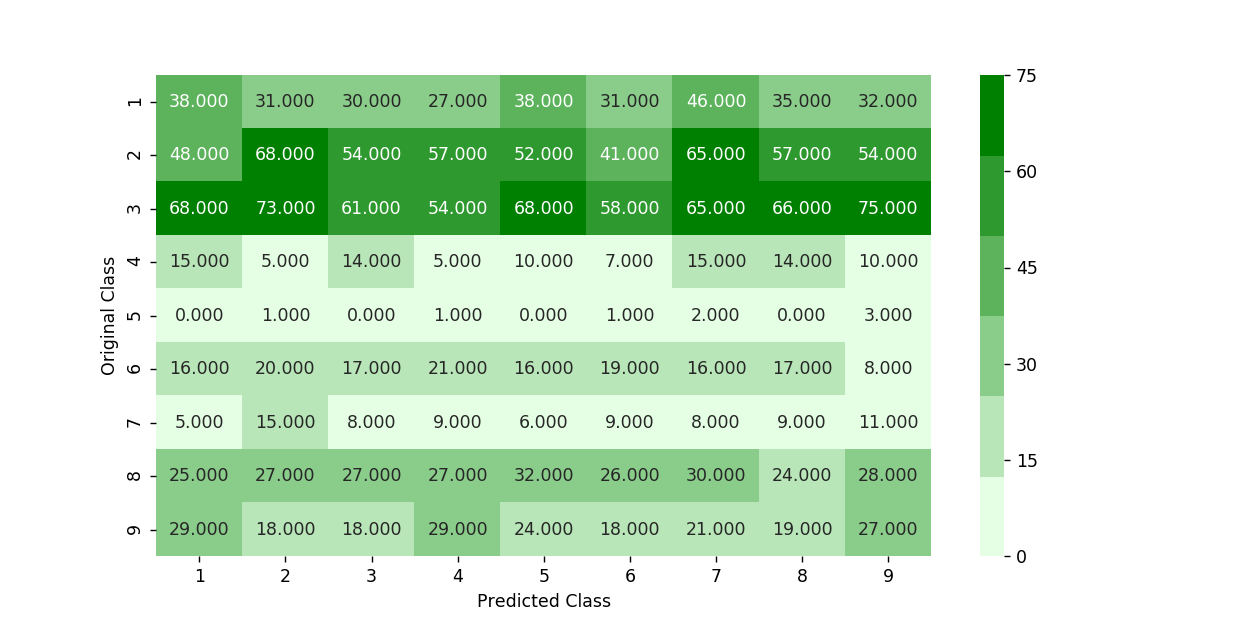

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


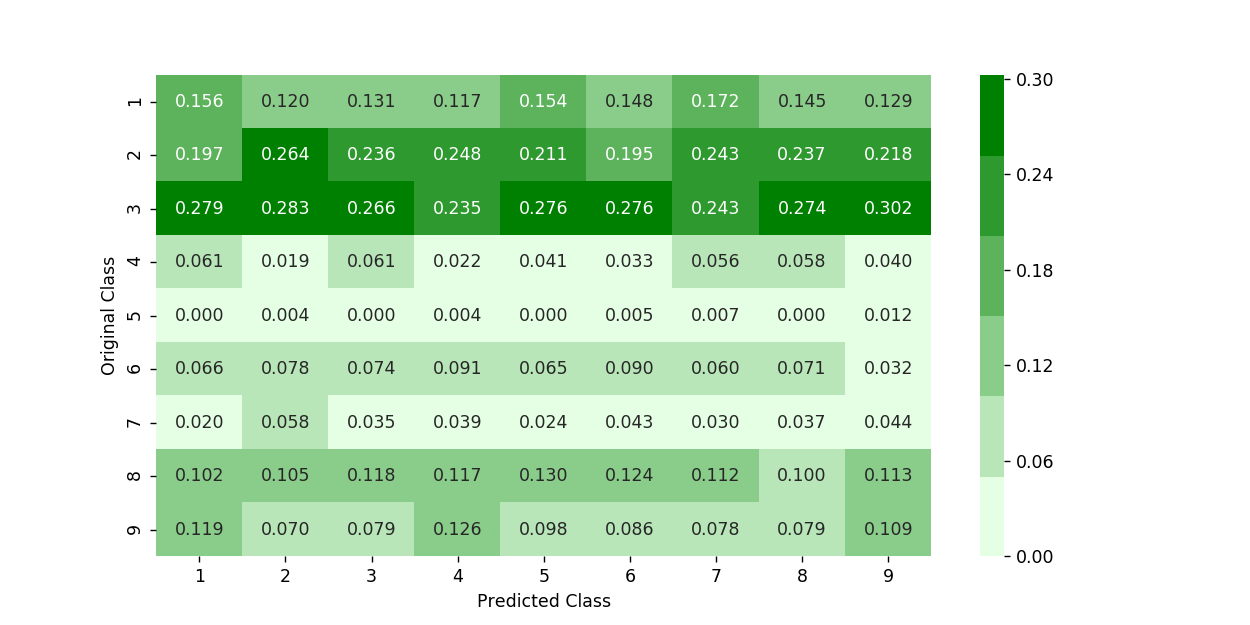

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


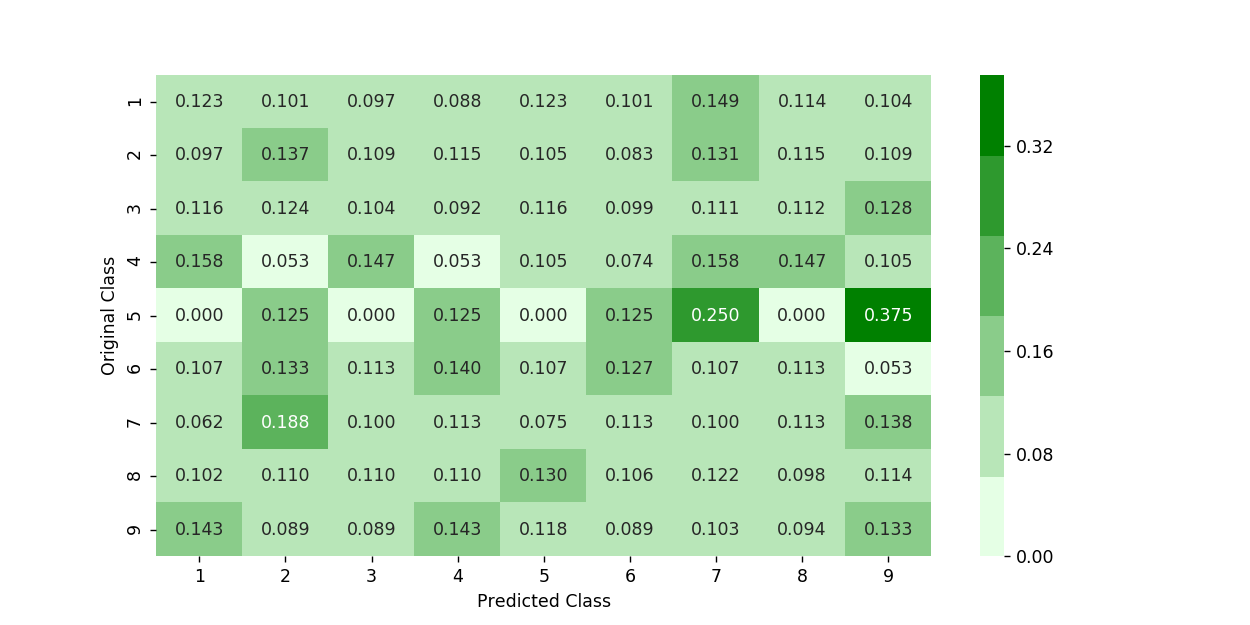

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.225386237304
log_loss for k =  3 is 0.230795229168
log_loss for k =  5 is 0.252421408646
log_loss for k =  7 is 0.273827486888
log_loss for k =  9 is 0.286469181555
log_loss for k =  11 is 0.29623391147
log_loss for k =  13 is 0.307551203154


<IPython.core.display.Javascript object>


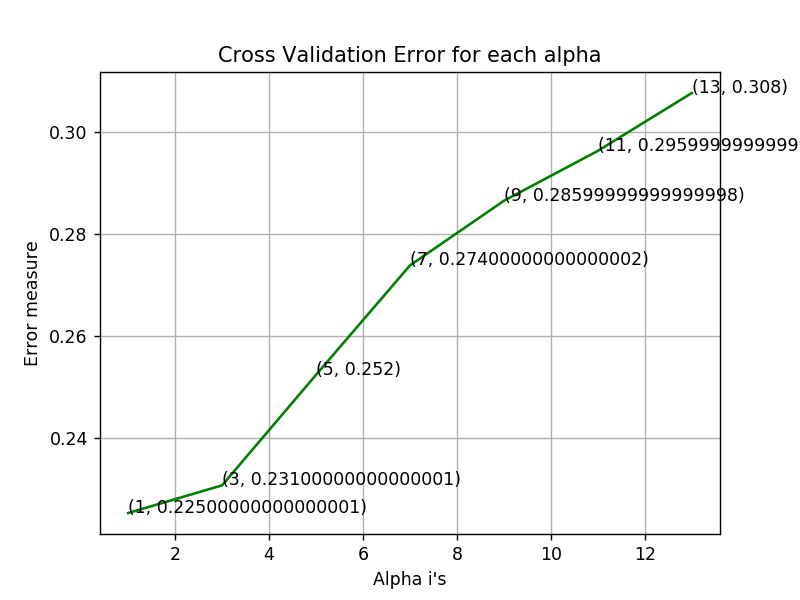

For values of best alpha =  1 The train log loss is: 0.0782947669247
For values of best alpha =  1 The cross validation log loss is: 0.225386237304
For values of best alpha =  1 The test log loss is: 0.241508604195
Number of misclassified points  4.50781968721
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


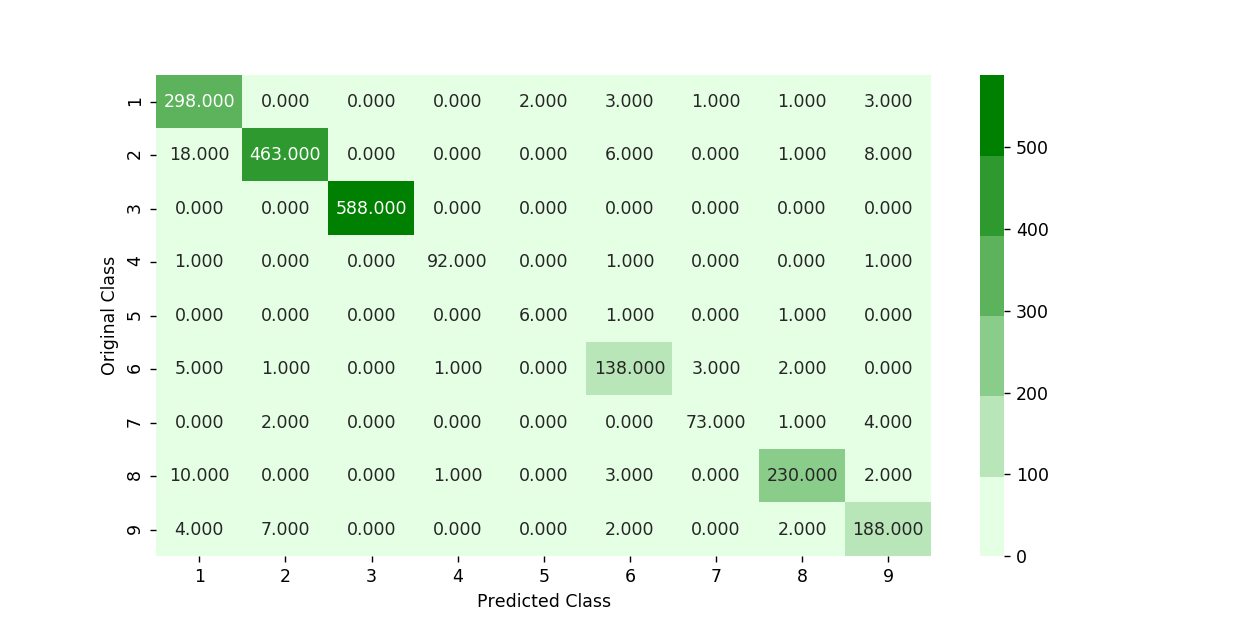

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


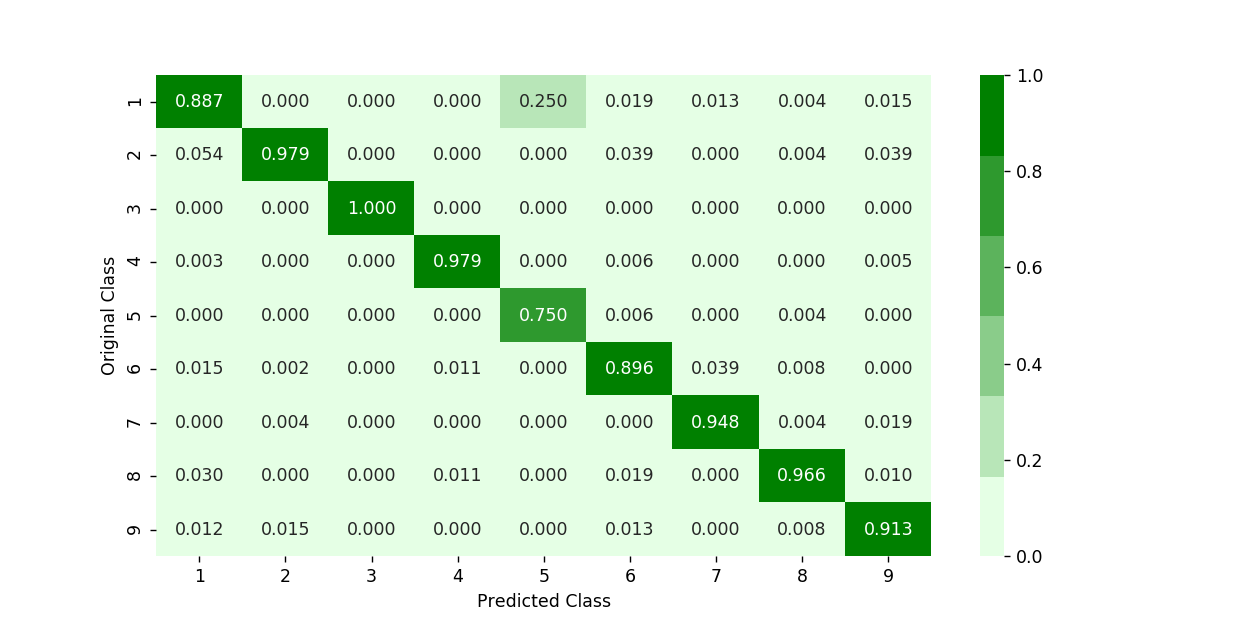

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


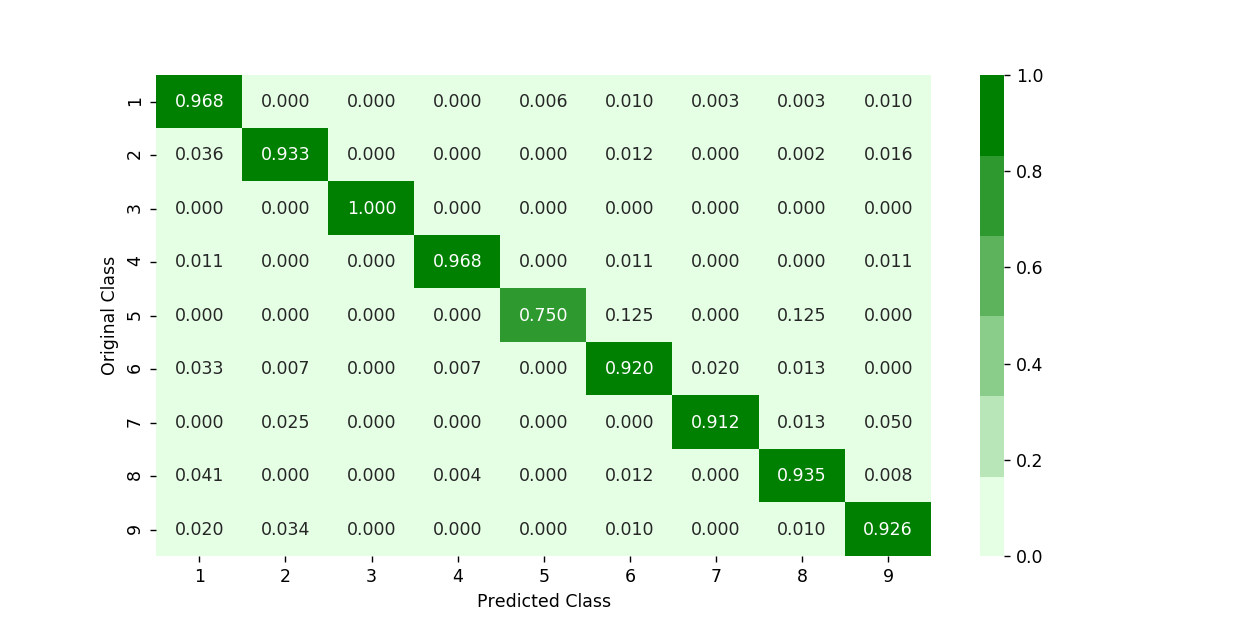

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.56916911178
log_loss for c =  0.0001 is 1.57336384417
log_loss for c =  0.001 is 1.53598598273
log_loss for c =  0.01 is 1.01720972418
log_loss for c =  0.1 is 0.857766083873
log_loss for c =  1 is 0.711154393309
log_loss for c =  10 is 0.583929522635
log_loss for c =  100 is 0.549929846589
log_loss for c =  1000 is 0.624746769121


<IPython.core.display.Javascript object>


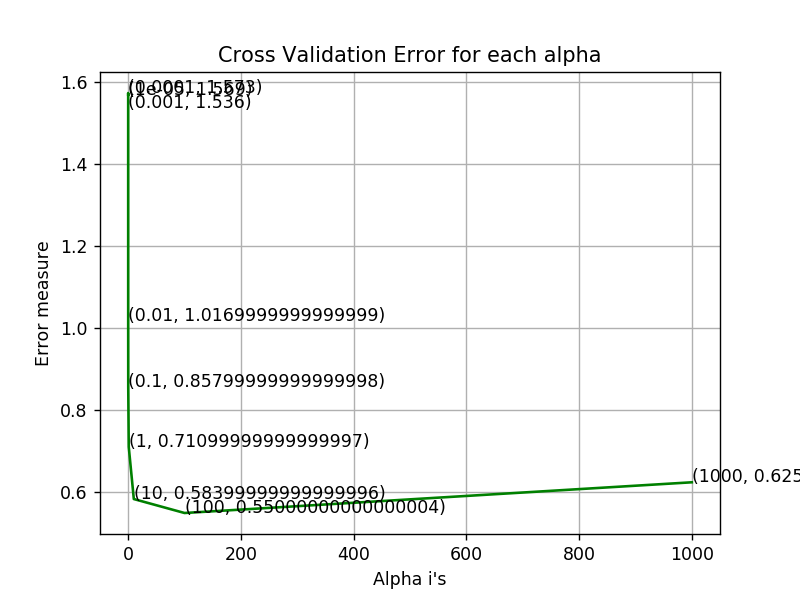

log loss for train data 0.498923428696
log loss for cv data 0.549929846589
log loss for test data 0.528347316704
Number of misclassified points  12.3275068997
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


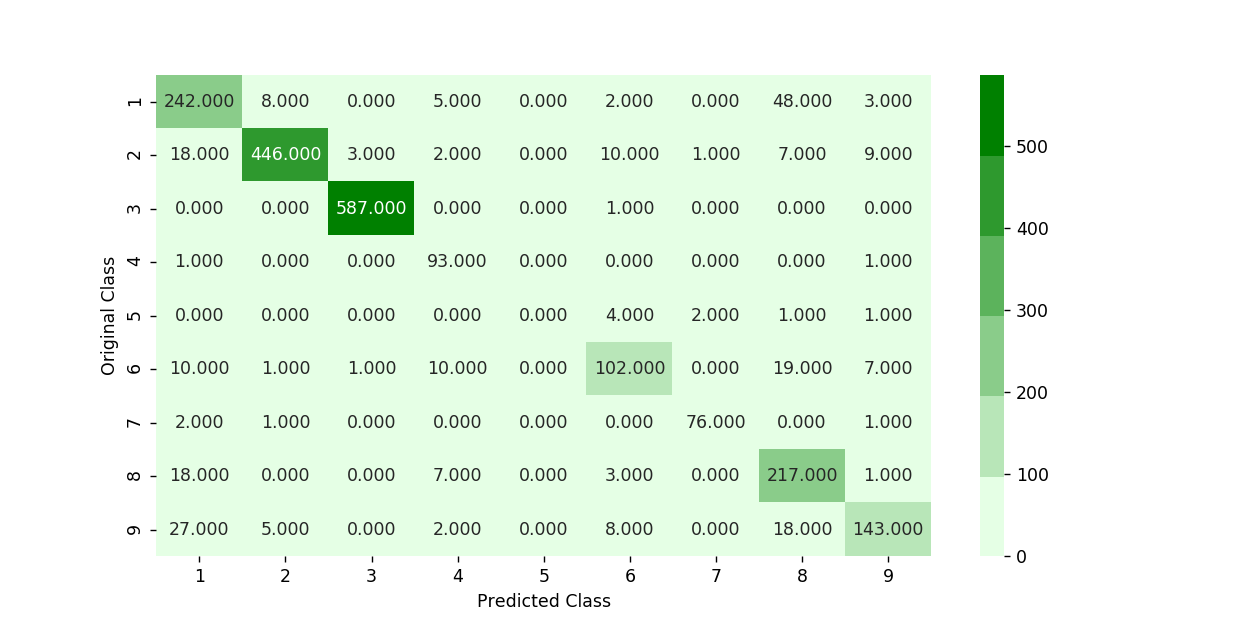

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


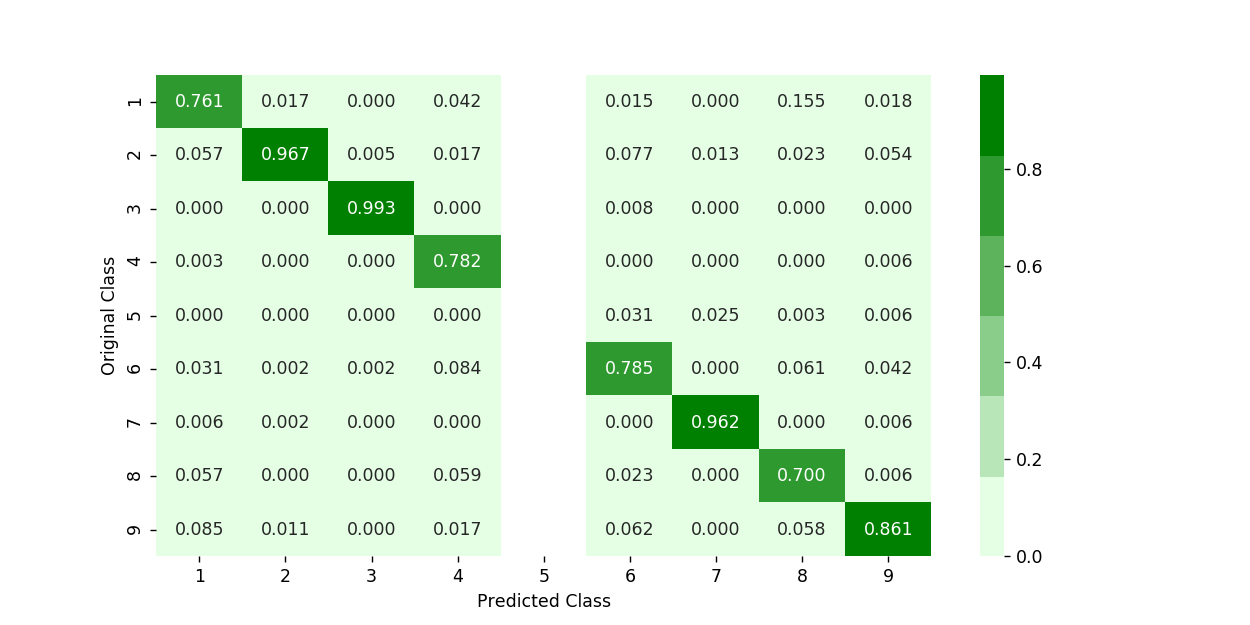

Sum of columns in precision matrix [  1.   1.   1.   1.  nan   1.   1.   1.   1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


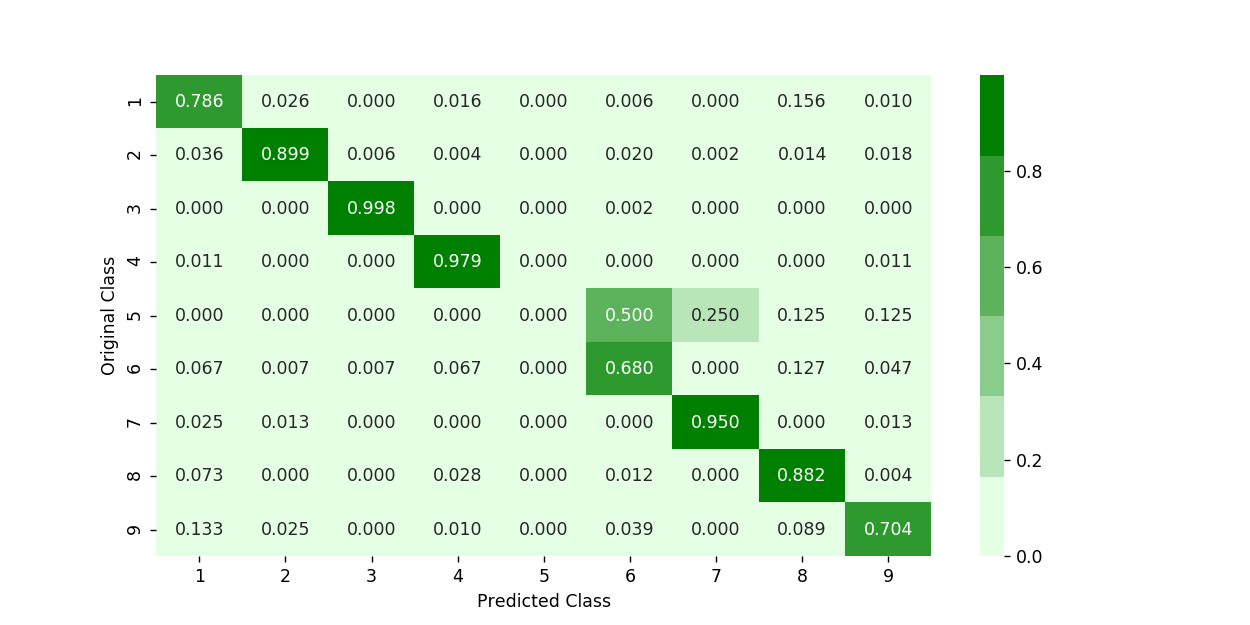

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.106357709164
log_loss for c =  50 is 0.0902124124145
log_loss for c =  100 is 0.0895043339776
log_loss for c =  500 is 0.0881420869288
log_loss for c =  1000 is 0.0879849524621
log_loss for c =  2000 is 0.0881566647295
log_loss for c =  3000 is 0.0881318948443


<IPython.core.display.Javascript object>


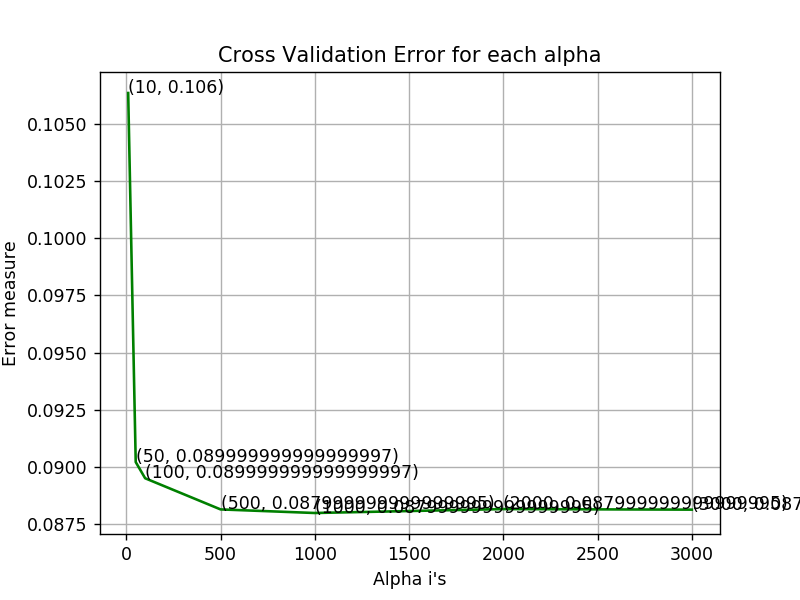

For values of best alpha =  1000 The train log loss is: 0.0266476291801
For values of best alpha =  1000 The cross validation log loss is: 0.0879849524621
For values of best alpha =  1000 The test log loss is: 0.0858346961407
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


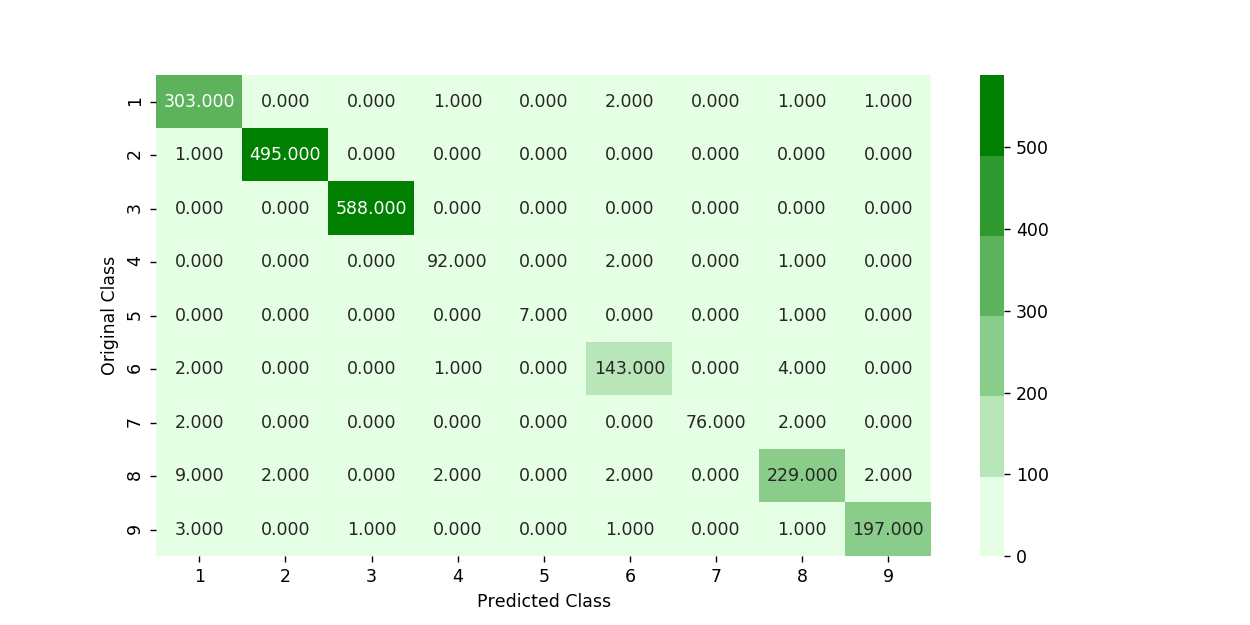

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


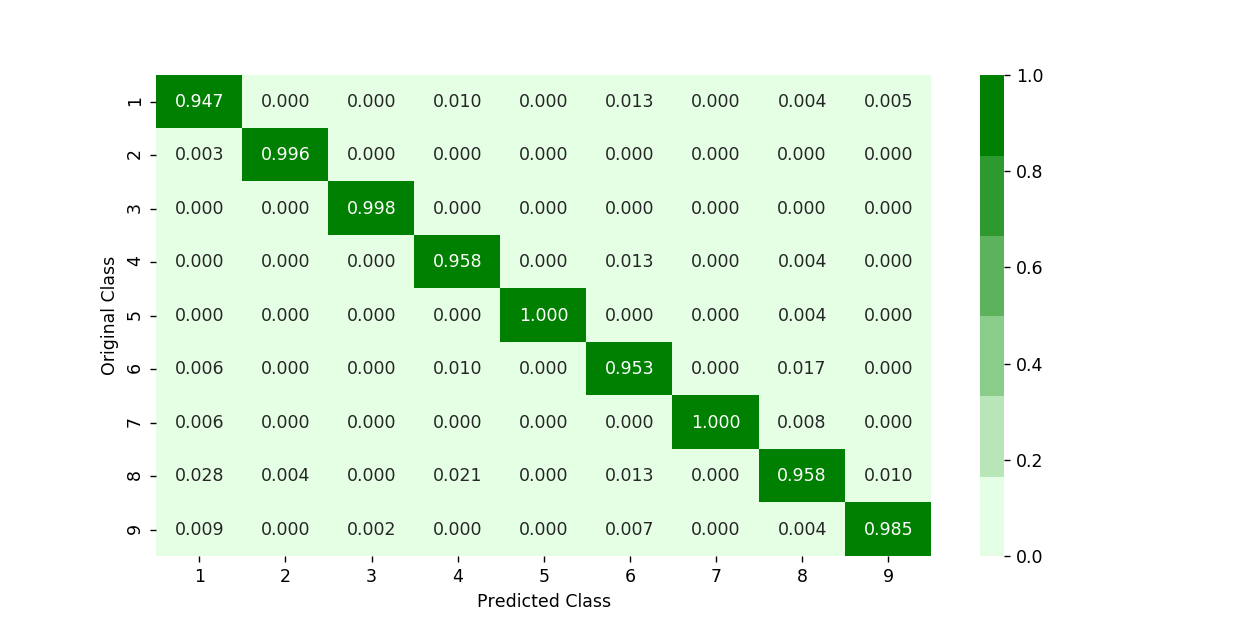

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


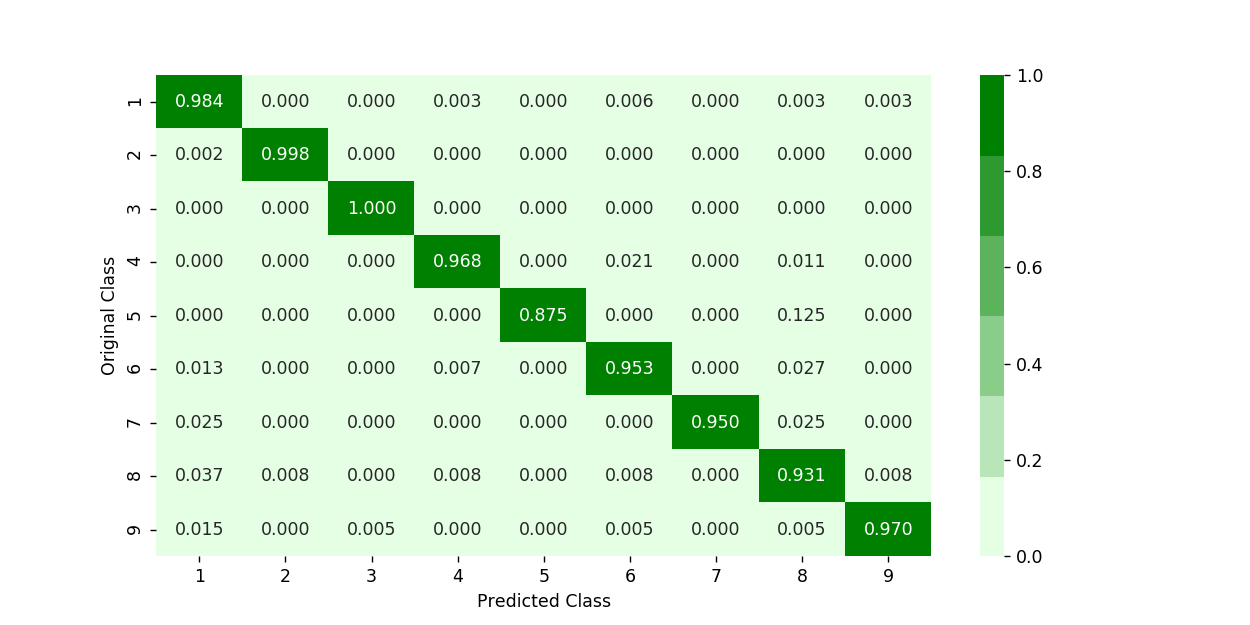

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.20615980494
log_loss for c =  50 is 0.123888382365
log_loss for c =  100 is 0.099919437112
log_loss for c =  500 is 0.0931035681289
log_loss for c =  1000 is 0.0933084876012
log_loss for c =  2000 is 0.0938395690309


<IPython.core.display.Javascript object>


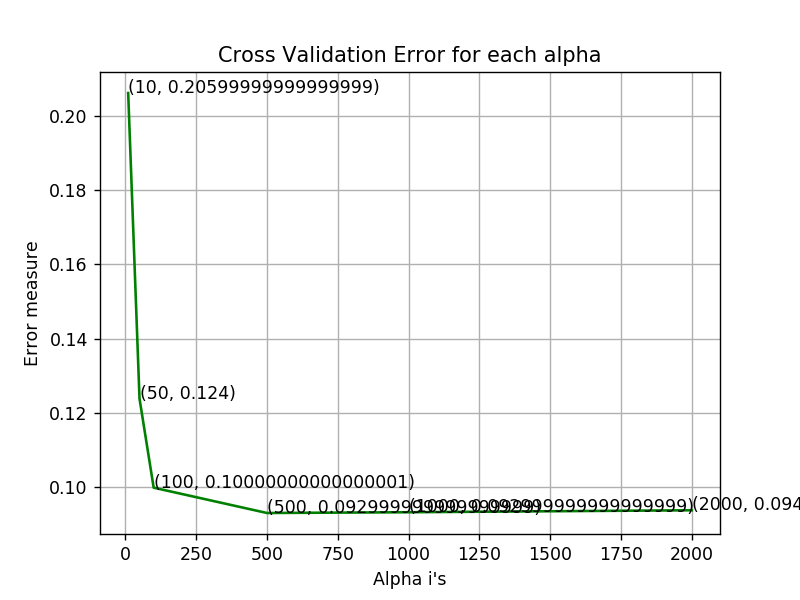

For values of best alpha =  500 The train log loss is: 0.0225231805824
For values of best alpha =  500 The cross validation log loss is: 0.0931035681289
For values of best alpha =  500 The test log loss is: 0.0792067651731
Number of misclassified points  1.24195032199
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


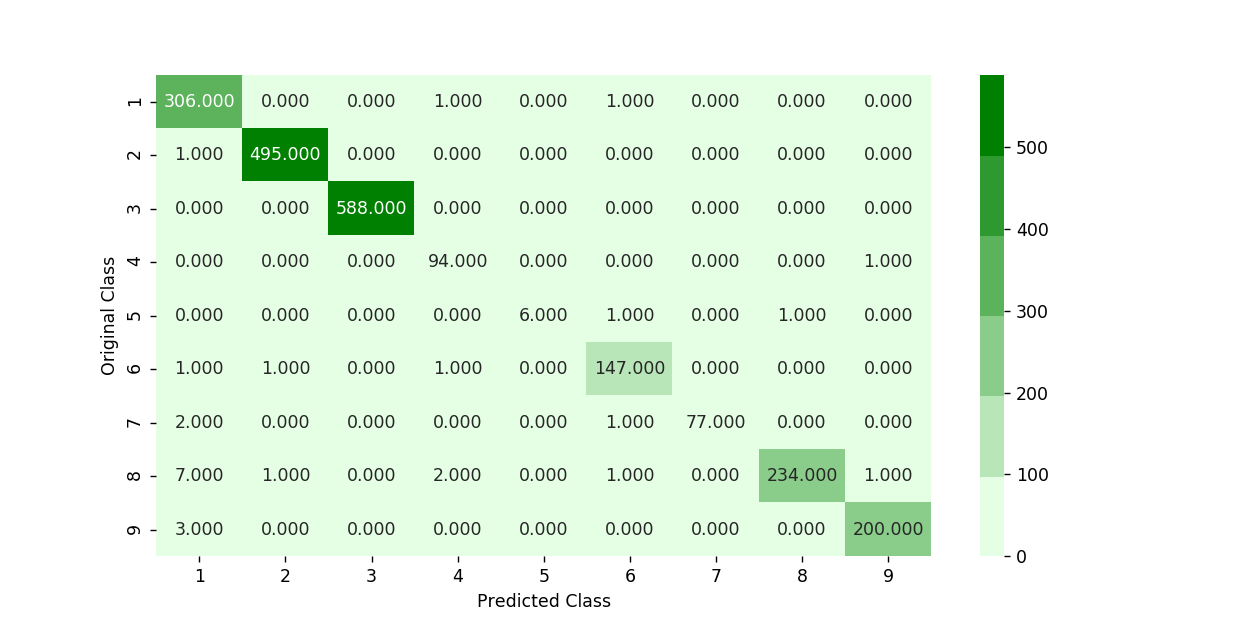

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


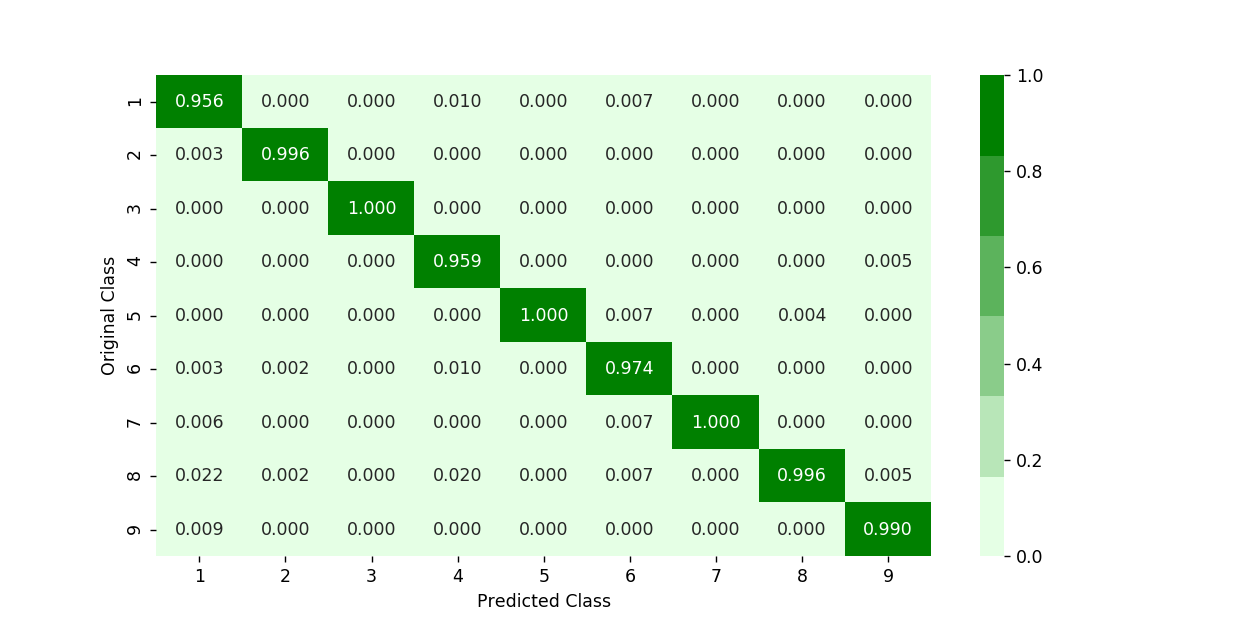

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


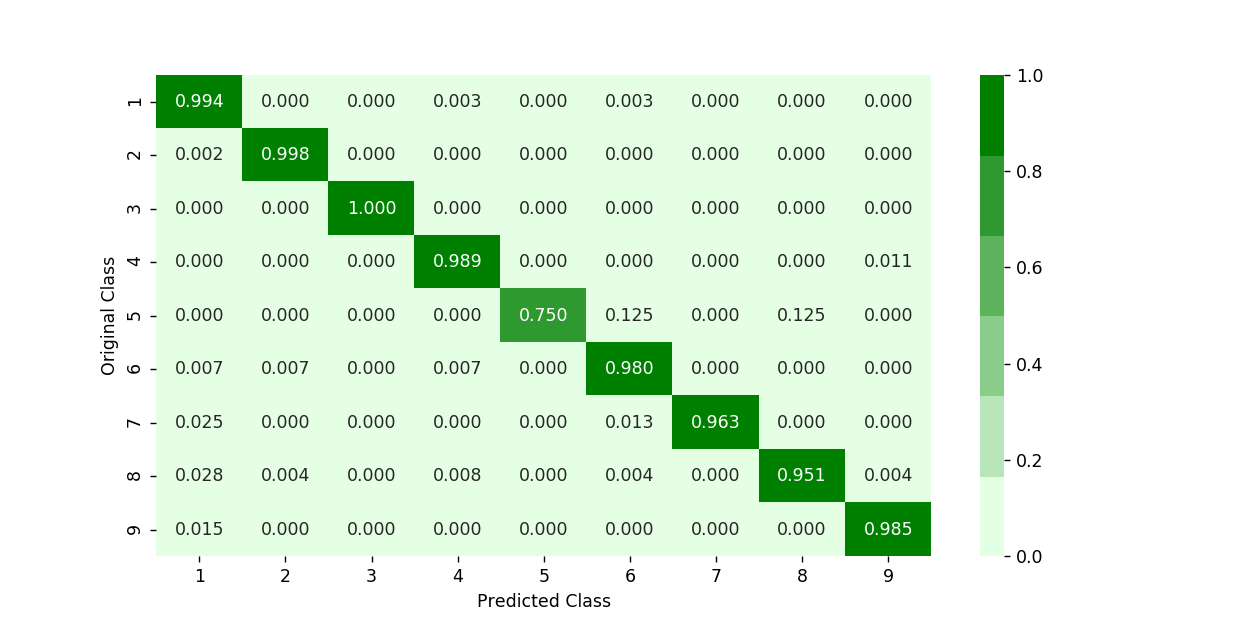

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [0]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  9.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 10.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 14.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.022540976086
cv loss 0.0928710624158
test loss 0.0782688587098


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [53]:
dfasm=pd.read_csv("asmoutputfile.csv")

In [56]:
files = os.listdir('byteFiles_5000')
files=pd.DataFrame(files,columns=['ID'])
files['ID'] = files['ID'].apply(lambda x: x.split('.')[0])

In [57]:
dfasm = pd.merge(dfasm, files,on='ID', how='inner')

In [58]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this

Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    edx  esi  eax  ebx  ecx  edi  ebp  esp  \
0      323        0       3  ...     18   66   15   43   83    0   17   48   
1        0        0       3  ...     18   29   48   82   12    0   14    0   
2      145        0       3  ...     13   42   10   67   14    0   11    0   
3        0        0       3  ...      6    8   14    7    2    0    8    0   
4        0        0       3  ...     12    9   18   29    5    0   11    0   

   eip  Class  
0   29      1  
1   20      1  
2    9      1  
3    6      1  
4   11      1  

[5 rows x 53 columns]

In [59]:
result_asm.shape

(5000, 53)

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [47]:
source = 'asmFiles'
destination = 'asmFiles_5000'

if not os.path.isdir(destination):
    os.makedirs(destination)
count = 1
if os.path.isdir(source):
    files = os.listdir(source)
    for file in files:
        if(count<=5000):
            shutil.move(source+"/"+file,destination)
            count=count+1
        else:
            break

In [60]:
#file sizes of byte files

files=os.listdir('asmFiles_5000')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles_5000/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


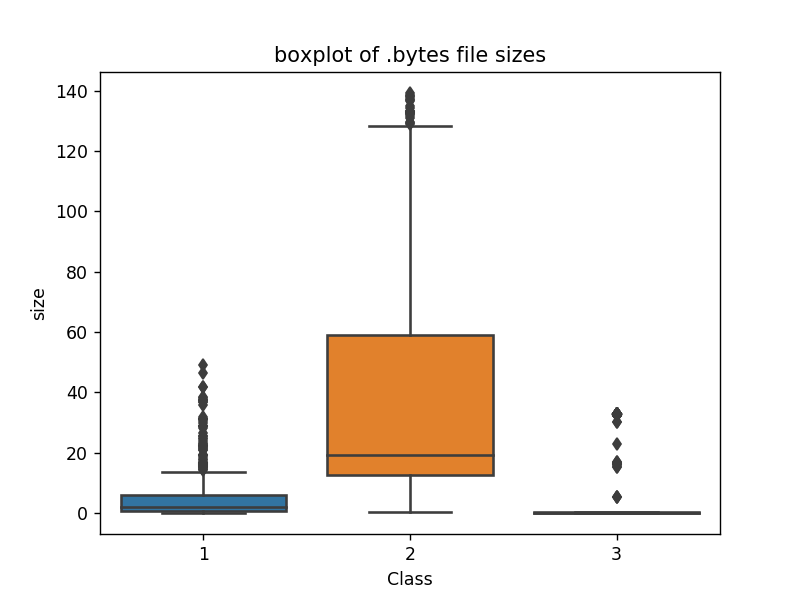

In [76]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [61]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(5000, 53)
(5000, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:    ...     esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3    ...      66   15   43   83    0   17   48   29   
1        0        0       3    ...      29   48   82   12    0   14    0   20   
2      145        0       3    ...      42   10   67   14    0   11    0    9   
3        0        0       3    ...       8   14    7    2    0    8    0    6   
4        0        0       3    ...       9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [62]:
result_asm.shape

(5000, 54)

In [63]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.215909  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.193182  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.193182  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.193182  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.193182  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:    ...          esi       eax       ebx  \
0  0.000084      0.0  0.000072    ...     0.000746  0.000319  0.000360   
1  0.000000      0.0  0.000072    ...     0.000328  0.001020  0.000686   
2  0.000038      0.0  0.000072    ...     0.000475  0.000213  0.000560   
3  0.000000      0.0  0.000072    ...     0.000090  0.000298  0.000059   
4  0.000000      0.0  0.000072    ...     0.000102  0.000383  0.000243   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001204  0.0  0.038991  0.001468  0.003173      1  0.000436  
1  0.000174  0.0  0.032110  0.000000  0.002188      1  0.000329  
2  0.000203  0.0  0.025229  0.000000  0.000985      1  0.000173  
3  0.000029  0.0  0.018349  0.000000  0.000657      1  0.000009  
4  0.000073  0.0  0.025229  0.000000  0.001204      1  0.000144  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


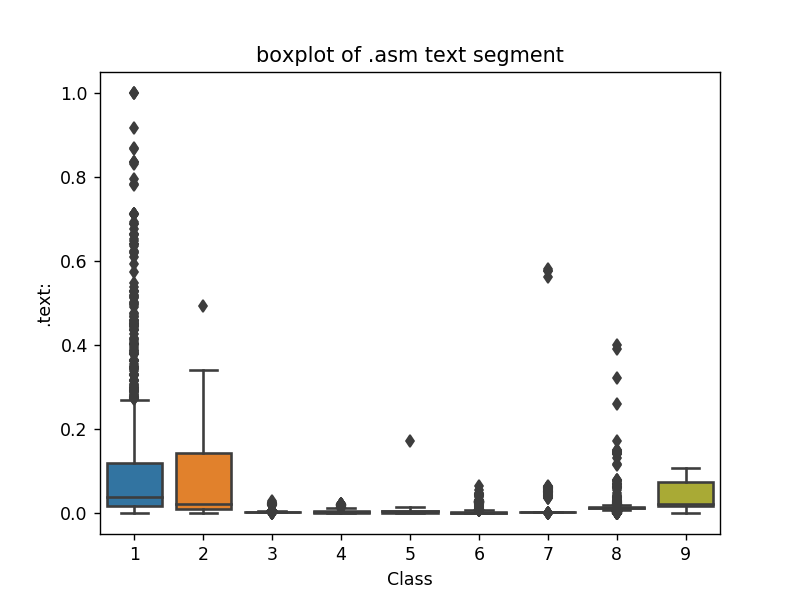

In [0]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


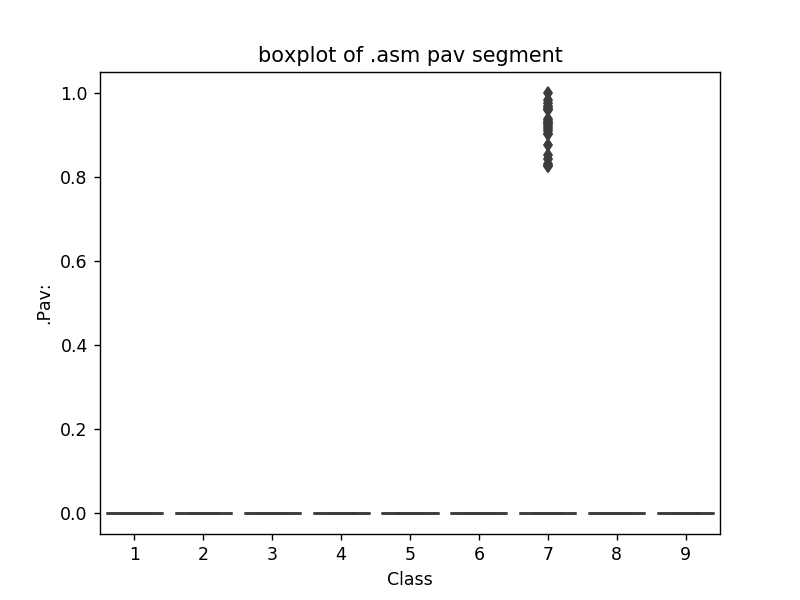

In [0]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


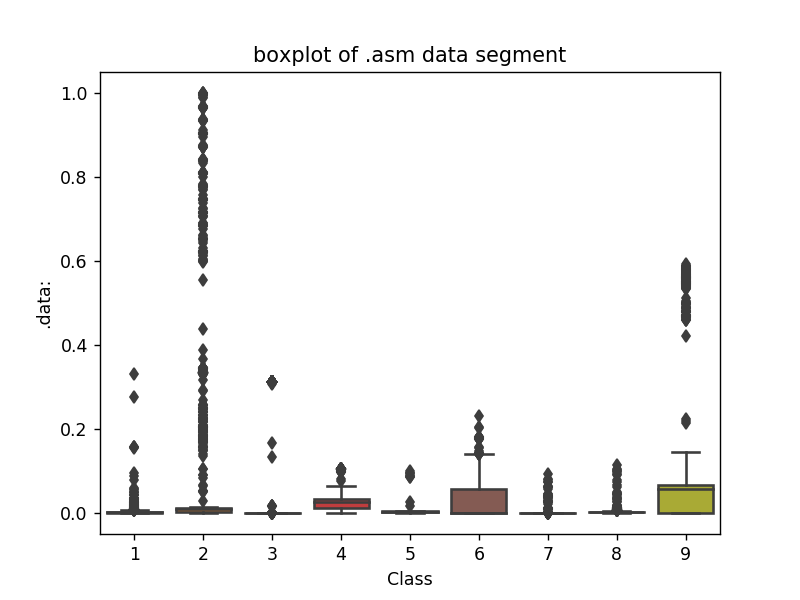

In [0]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


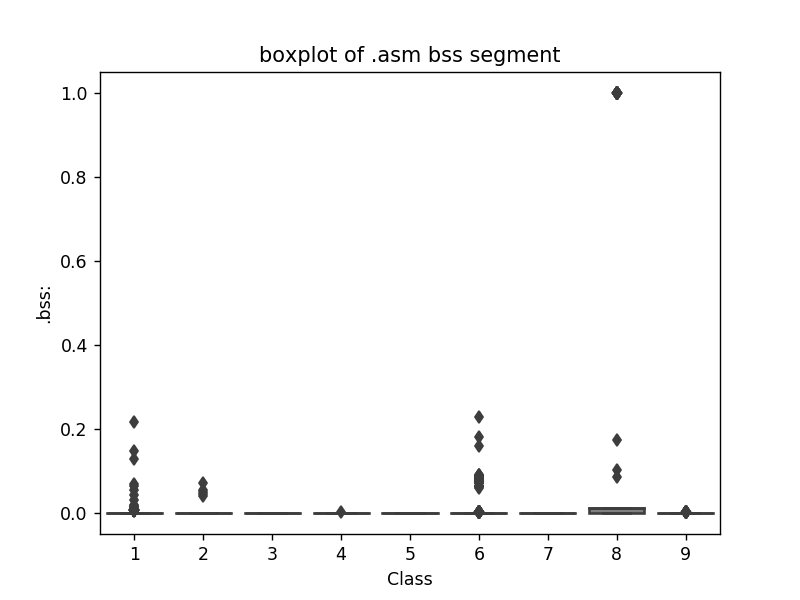

In [0]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


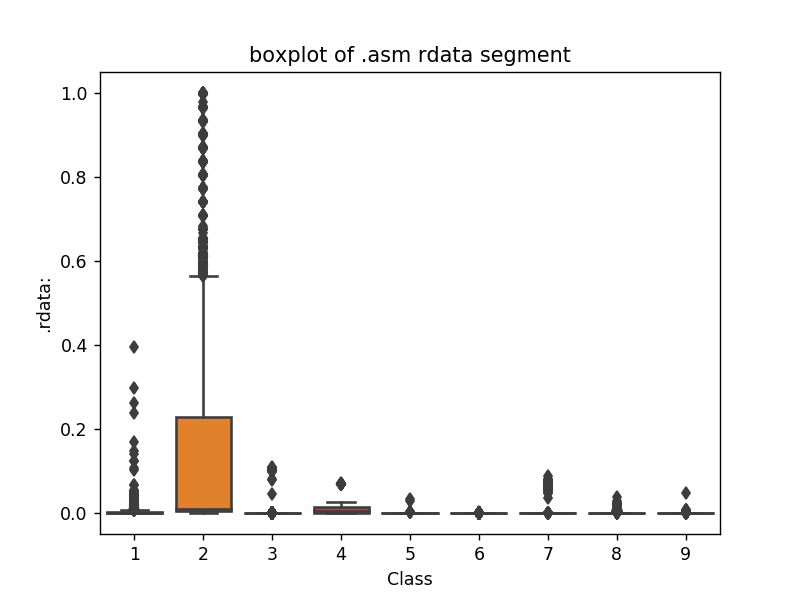

In [0]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


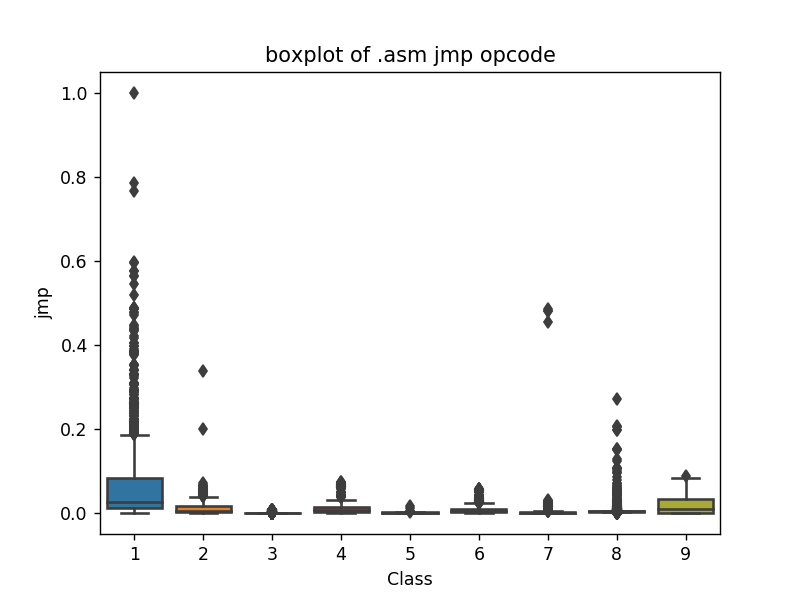

In [0]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


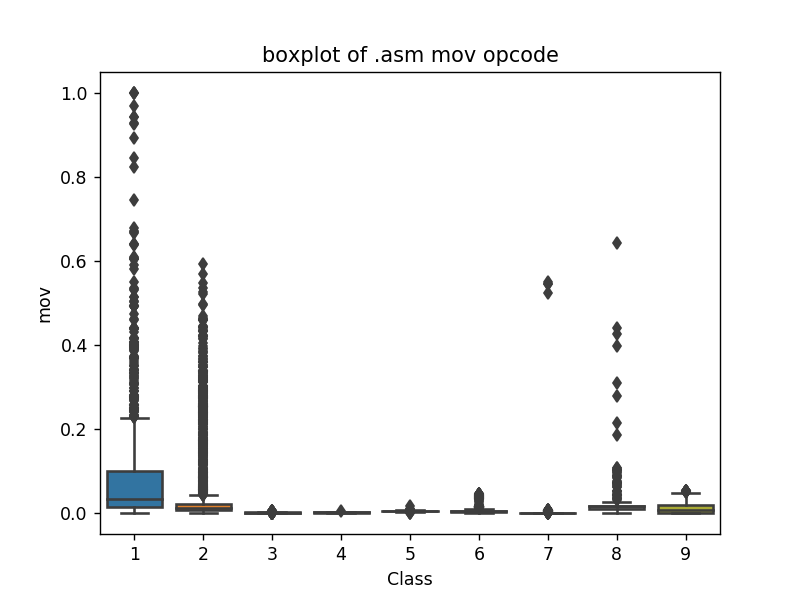

In [0]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


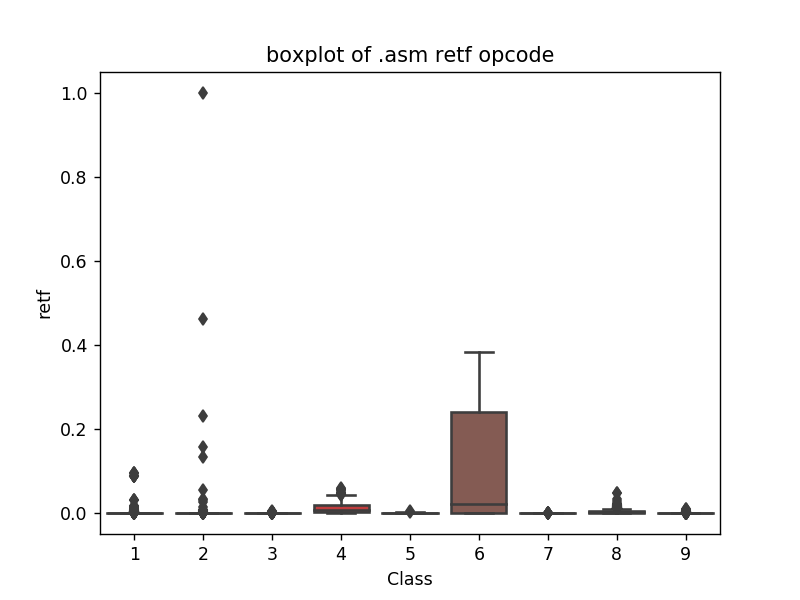

In [0]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


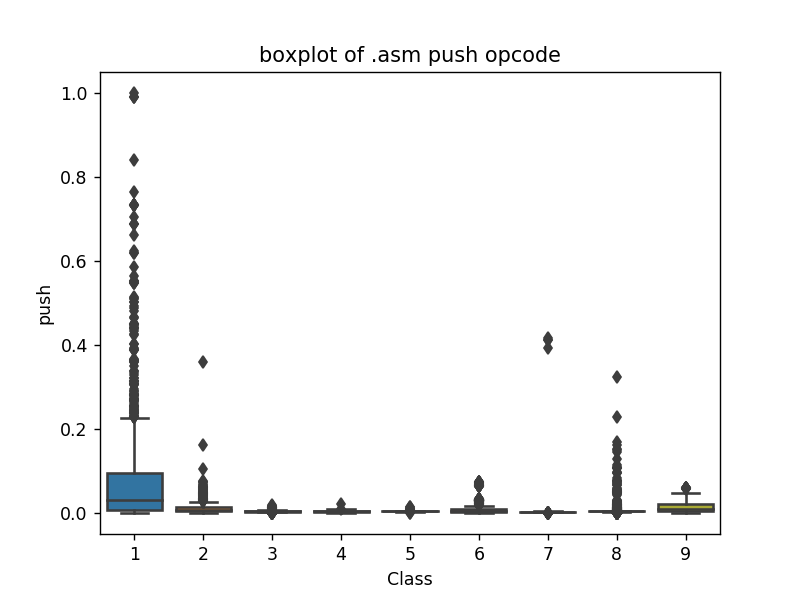

In [0]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


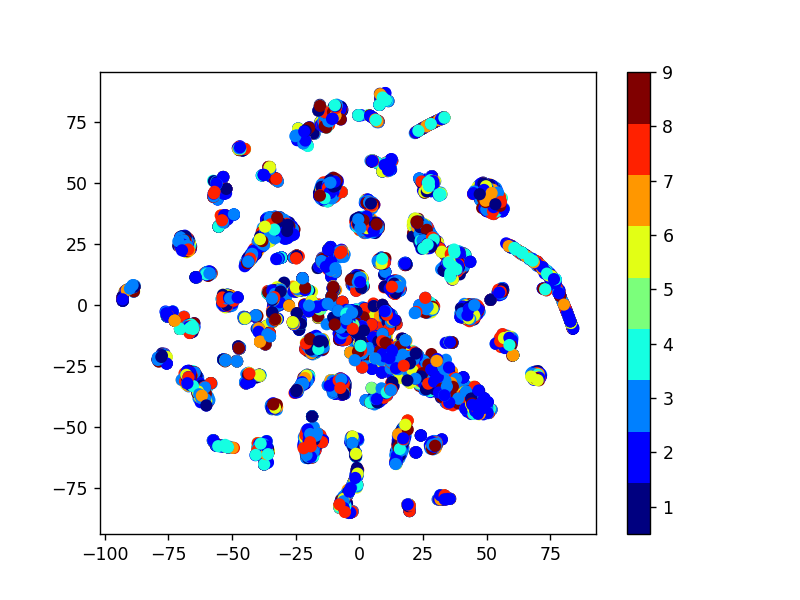

In [0]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


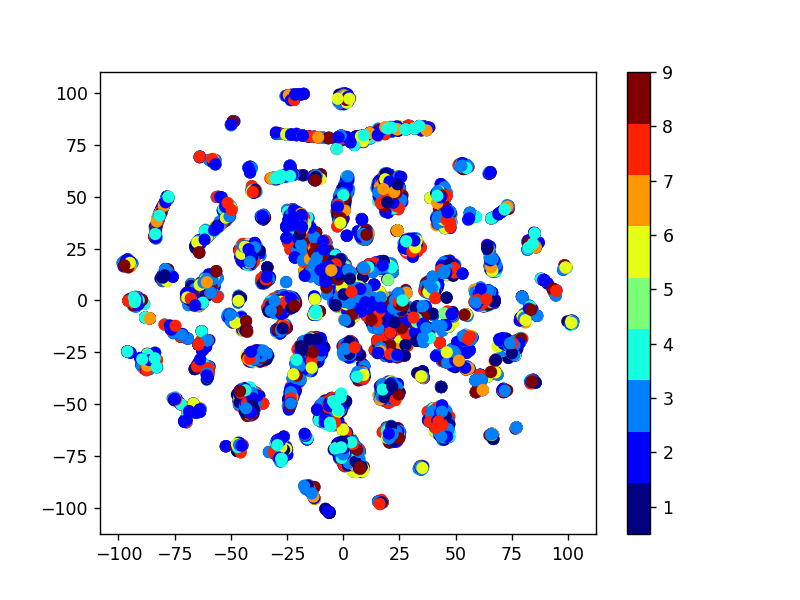

In [0]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [41]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [42]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [43]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


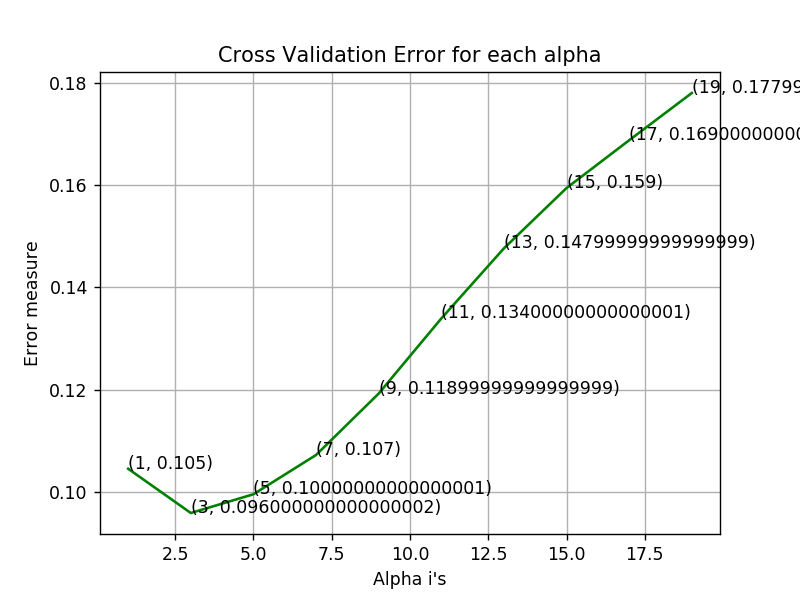

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


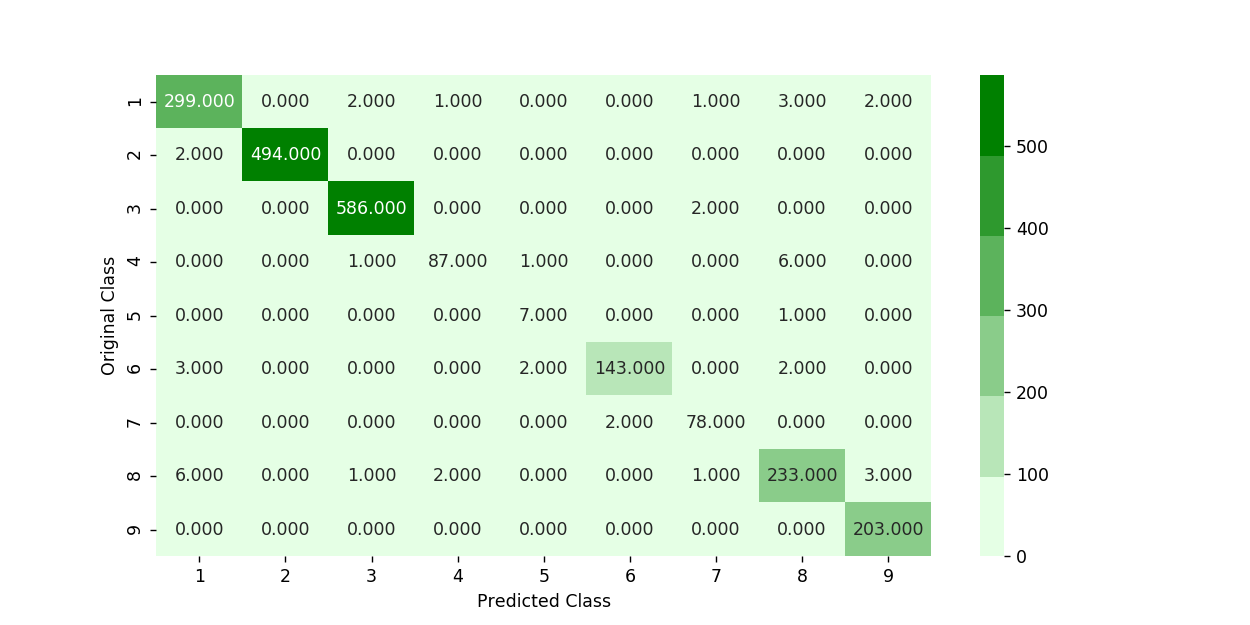

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


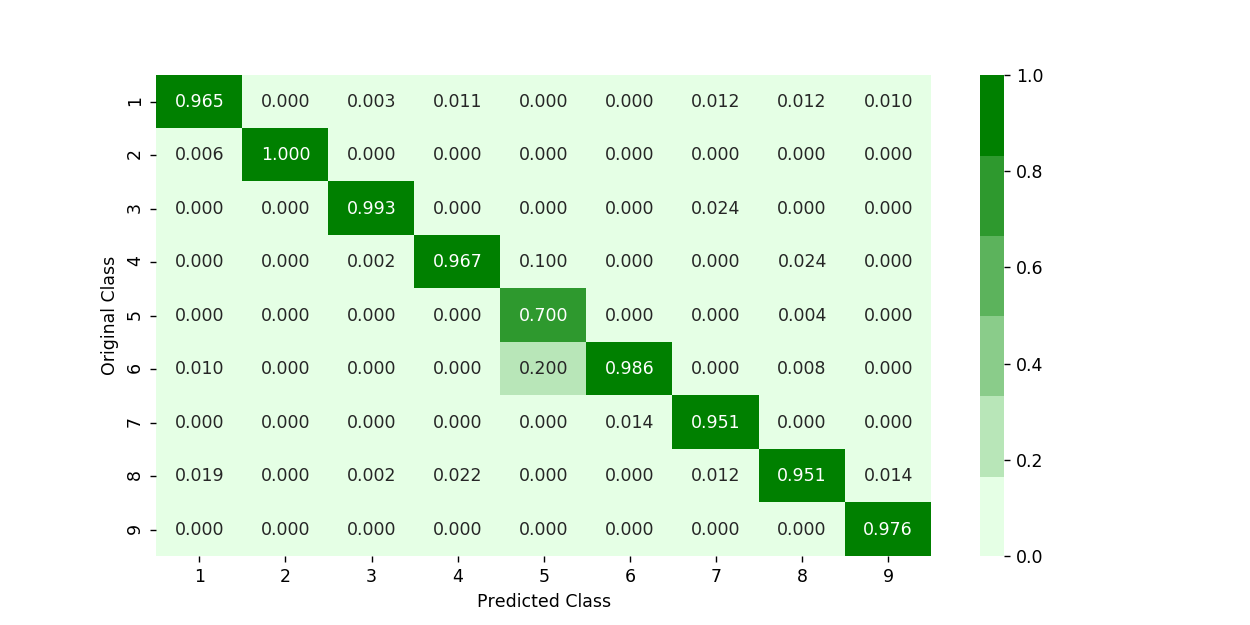

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


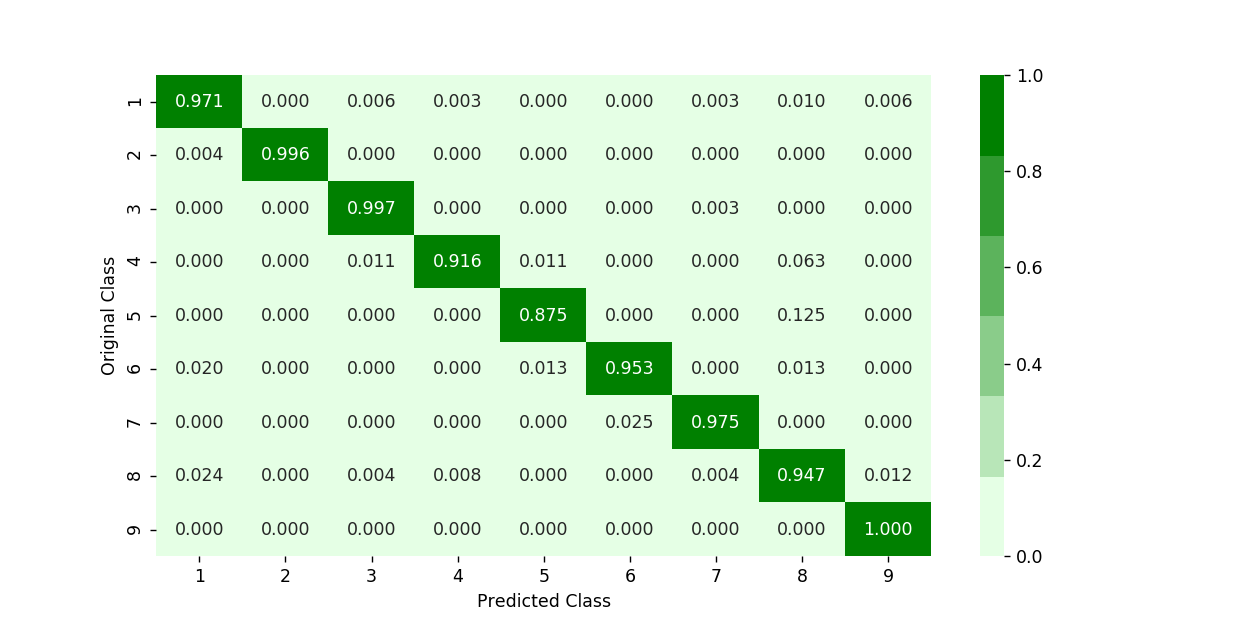

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


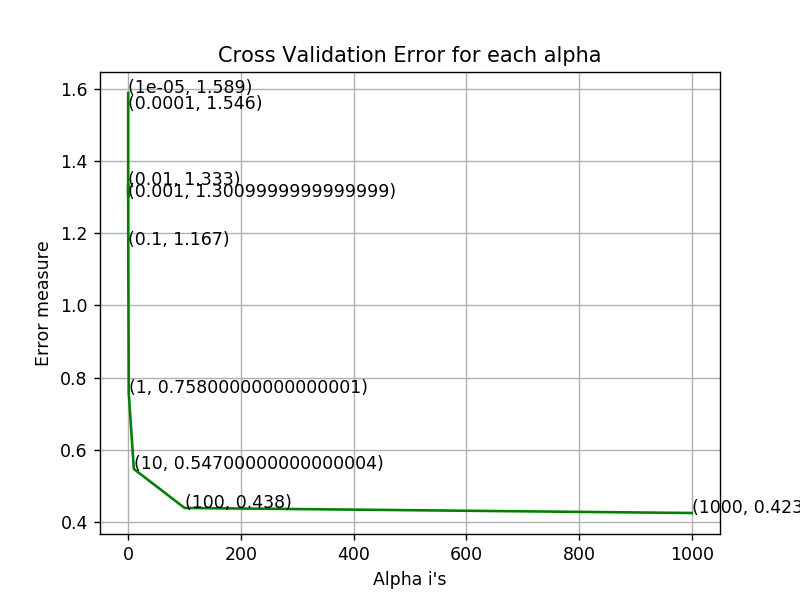

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


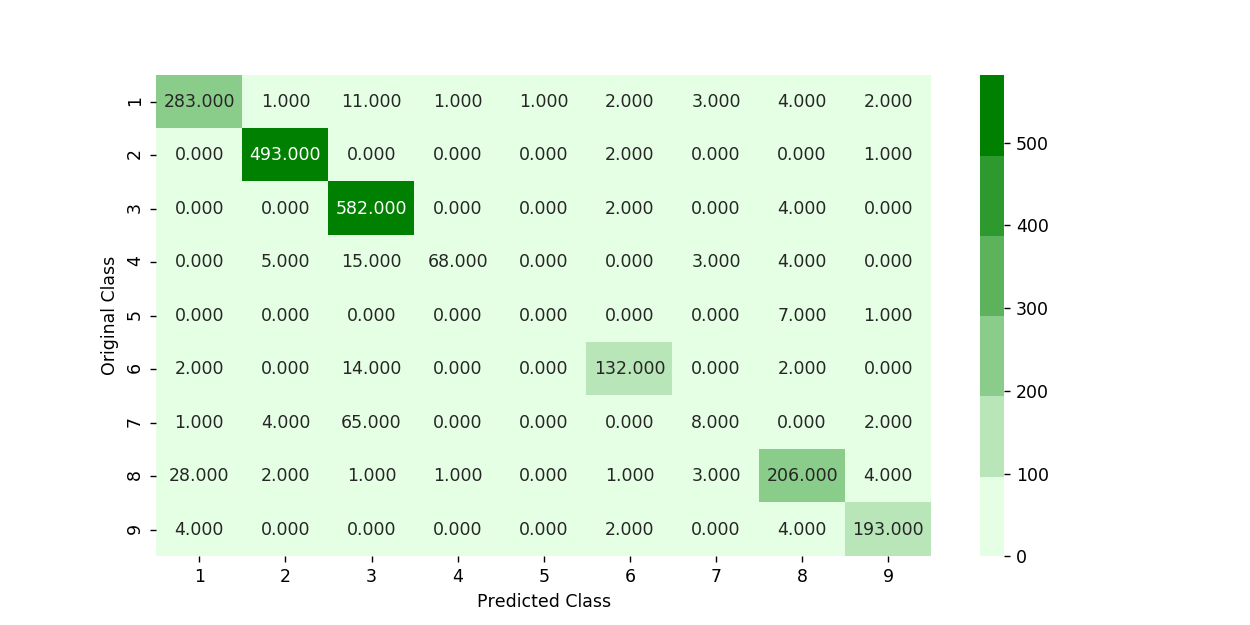

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


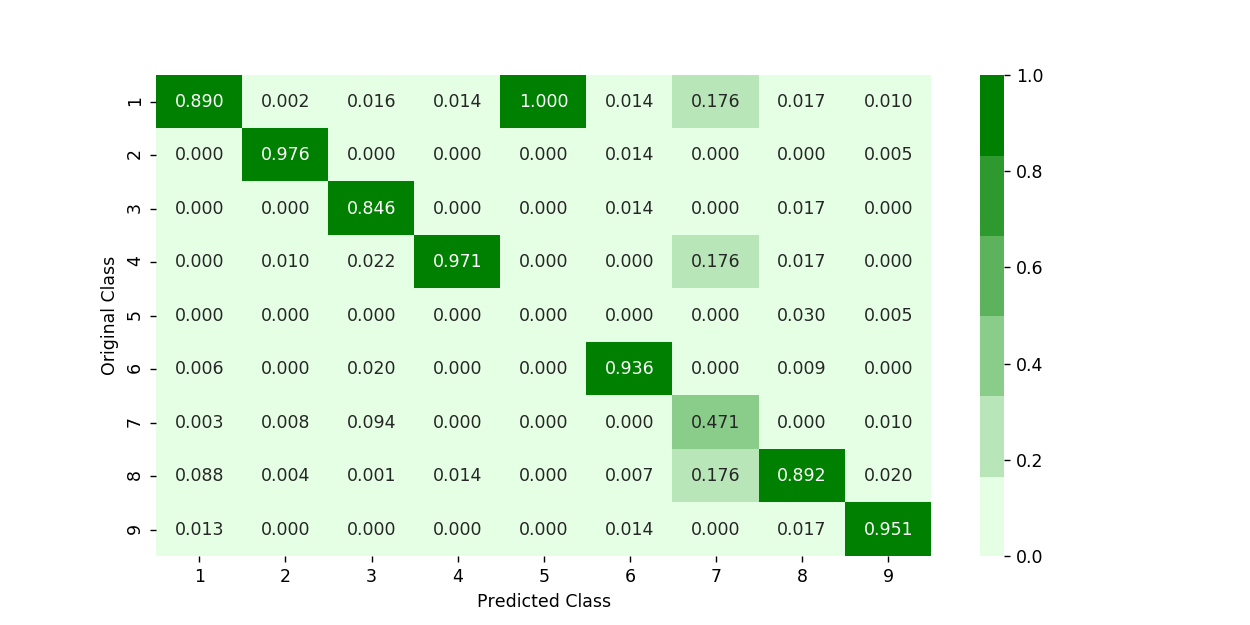

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


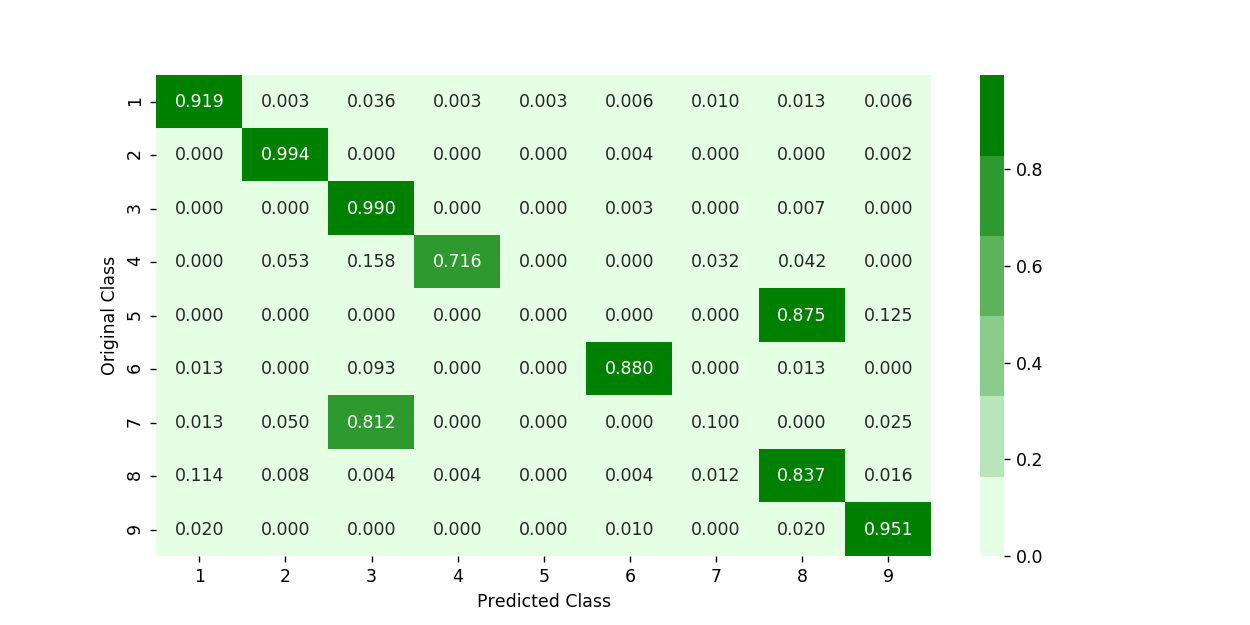

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


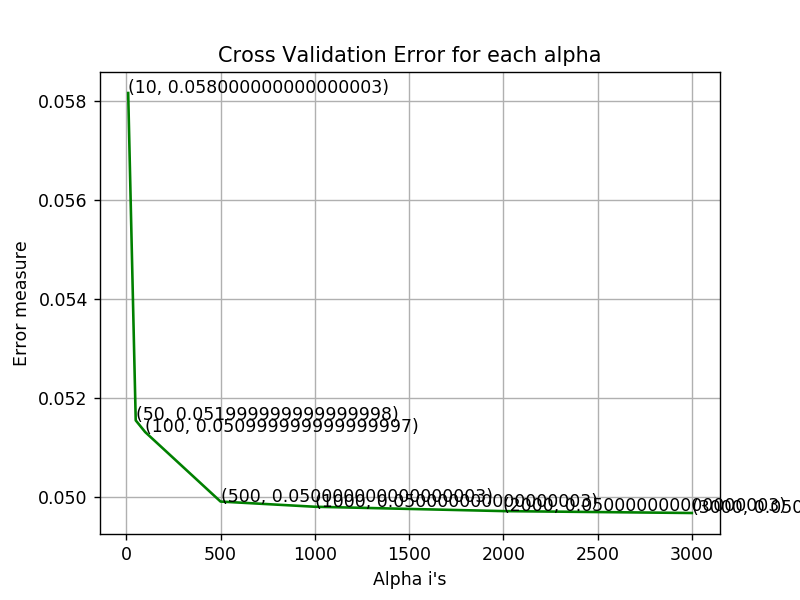

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


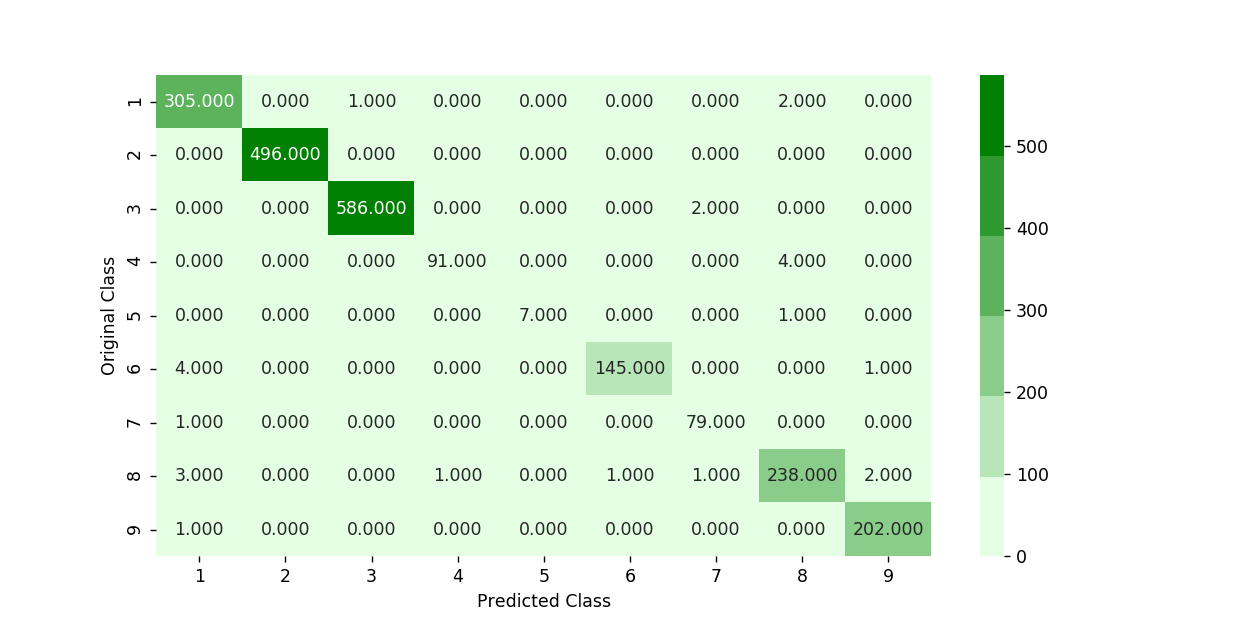

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


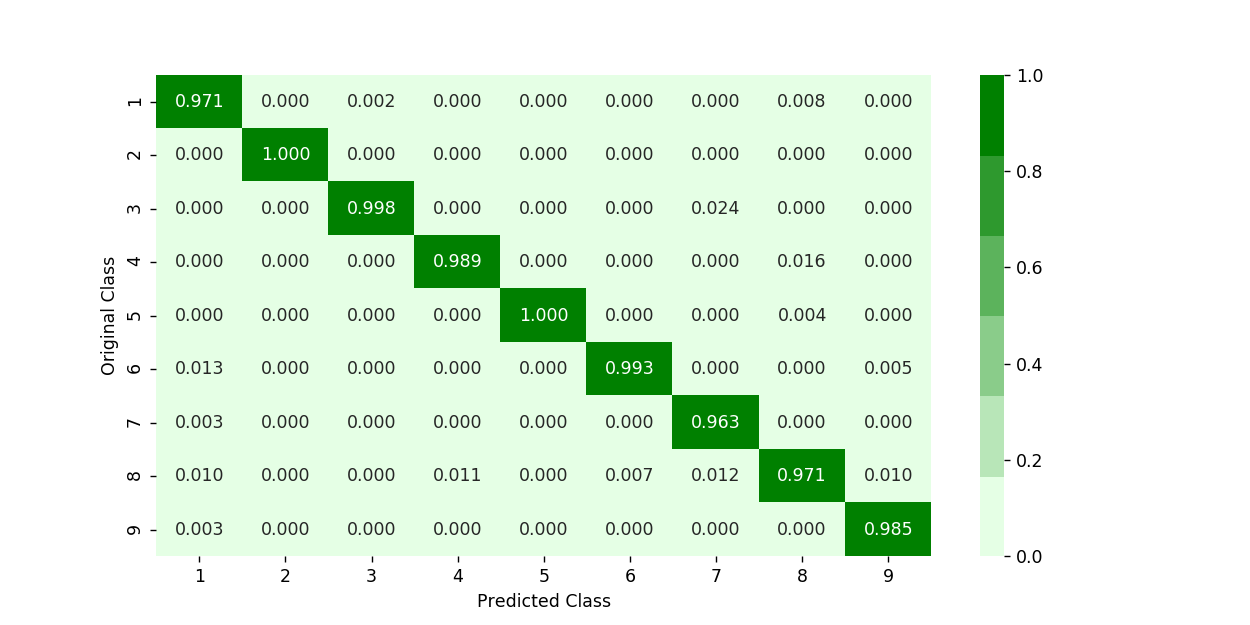

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


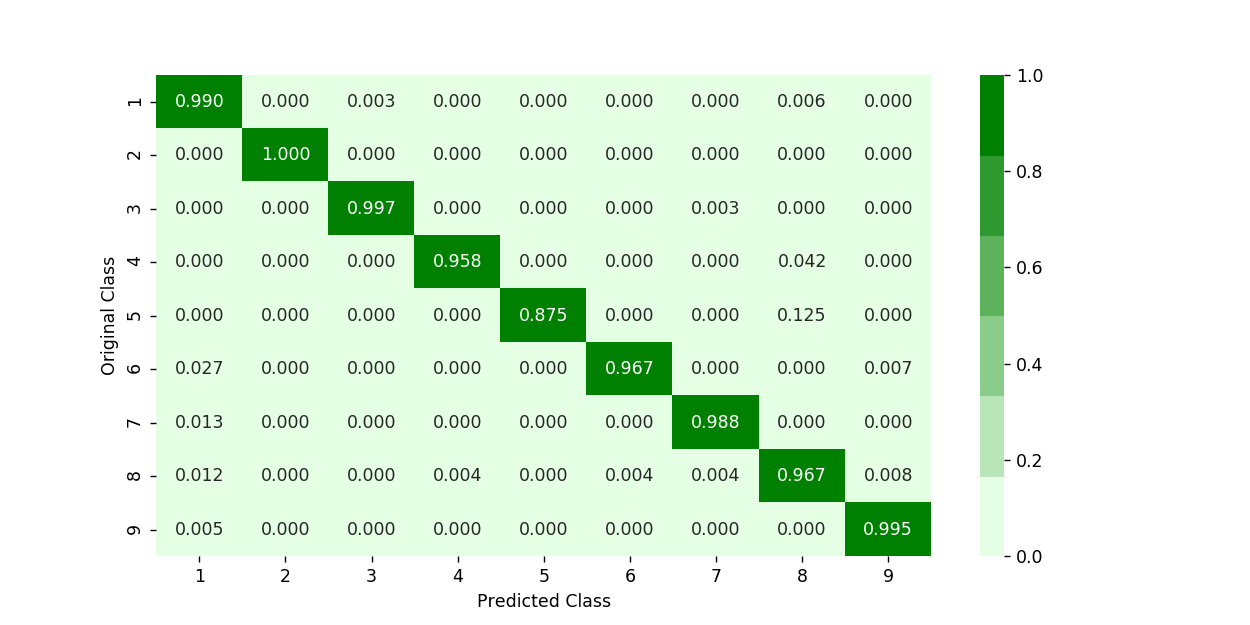

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.104344888454
log_loss for c =  50 is 0.0567190635611
log_loss for c =  100 is 0.056075038646
log_loss for c =  500 is 0.057336051683
log_loss for c =  1000 is 0.0571265109903
log_loss for c =  2000 is 0.057103406781
log_loss for c =  3000 is 0.0567993215778


<IPython.core.display.Javascript object>


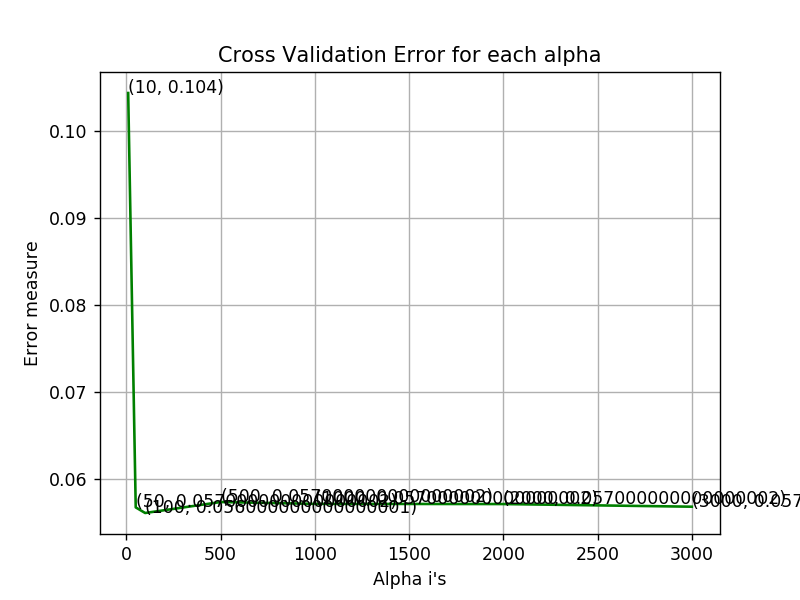

For values of best alpha =  100 The train log loss is: 0.0117883742574
For values of best alpha =  100 The cross validation log loss is: 0.056075038646
For values of best alpha =  100 The test log loss is: 0.0491647763845
Number of misclassified points  0.873965041398
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


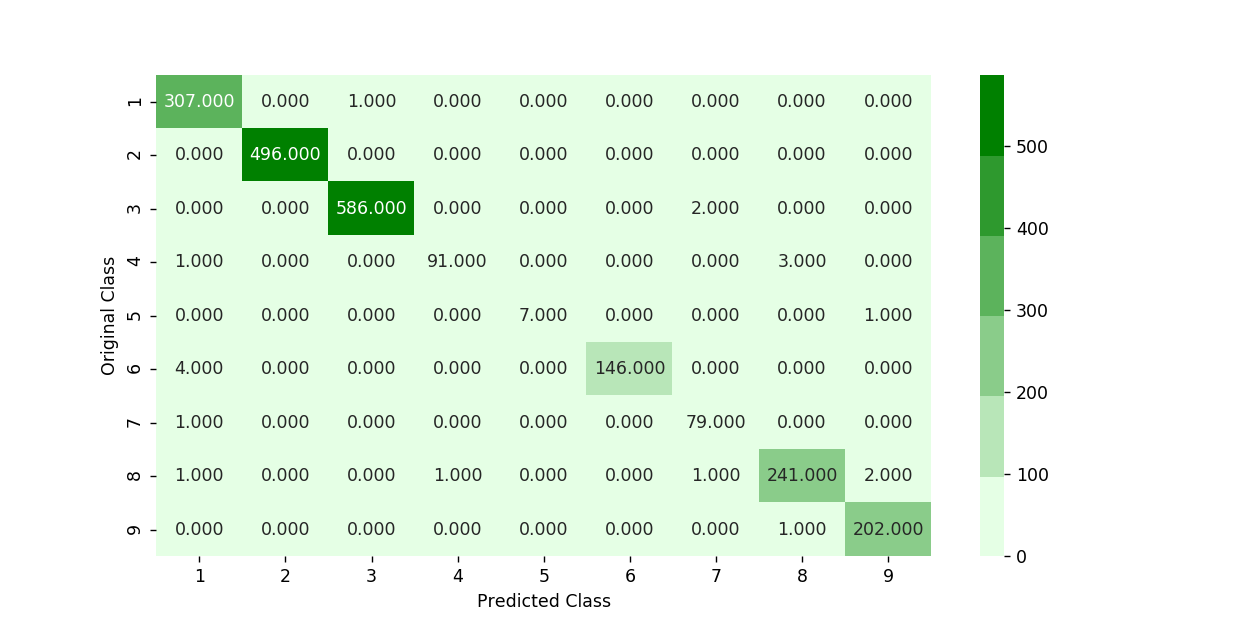

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


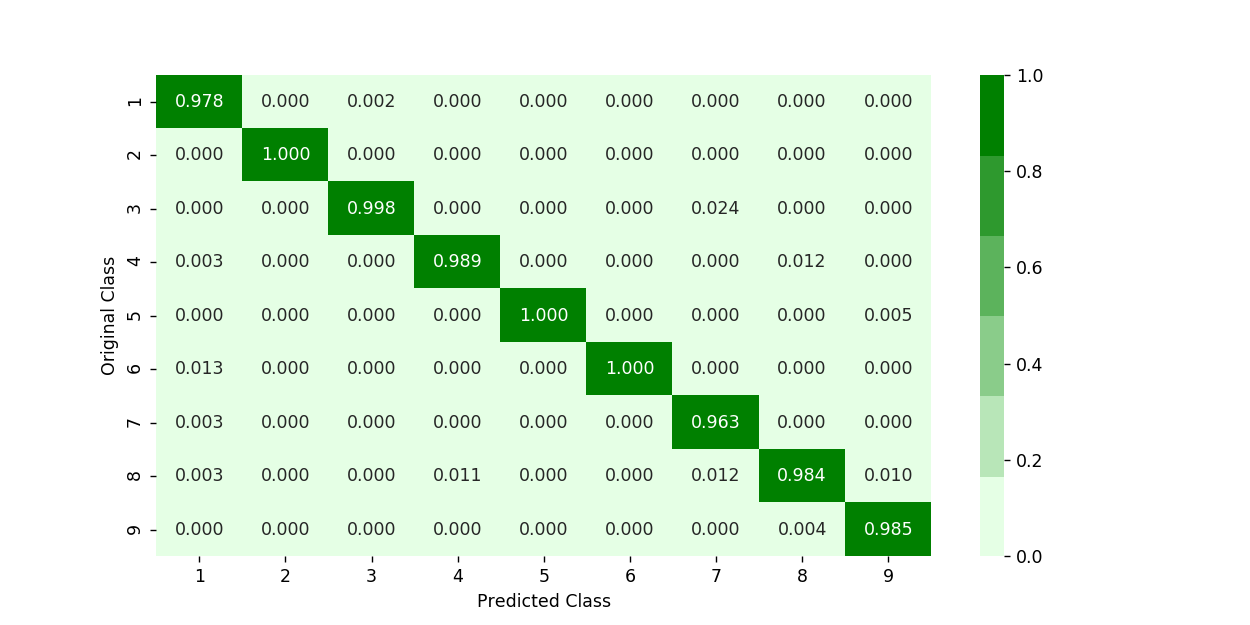

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


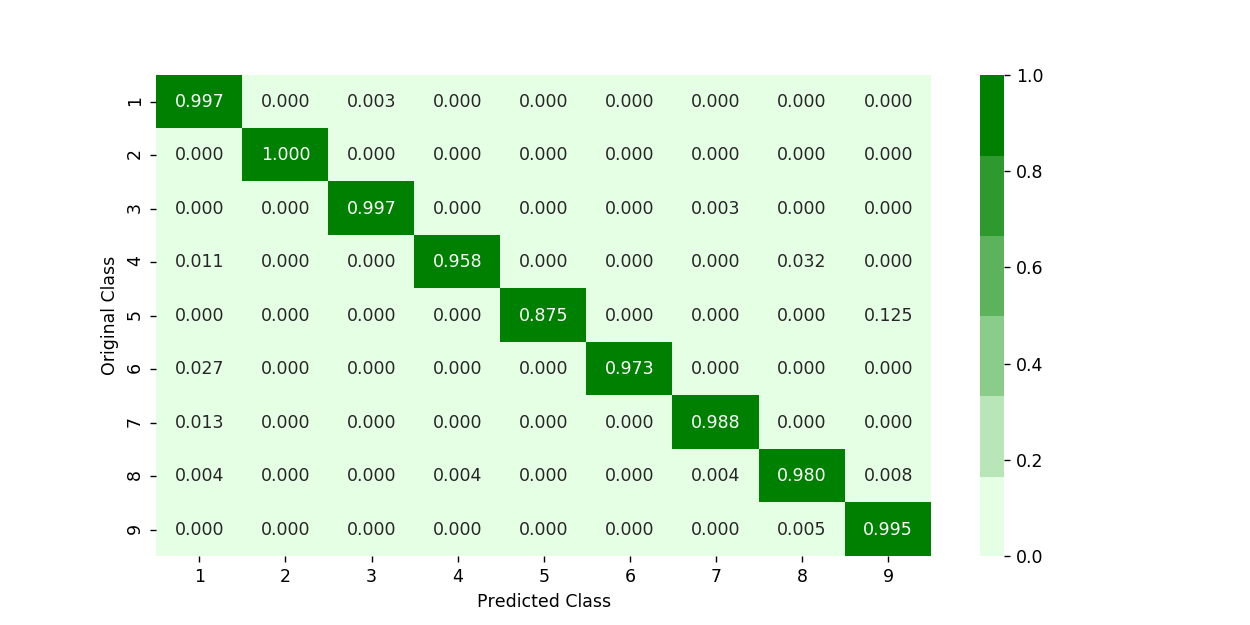

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [64]:
result.head()

ID  Unnamed: 0         0         1         2         3  \
0  01azqd4InC7m9JpocGv5      0.0000  0.527809  0.008309  0.002647  0.002067   
1  01IsoiSMh5gxyDYTl4CB      0.0002  0.034861  0.017739  0.006813  0.003876   
2  01jsnpXSAlgw6aPeDxrU      0.0004  0.081995  0.020303  0.002414  0.001315   
3  01kcPWA9K2BOxQeS5Rju      0.0006  0.018495  0.002581  0.000682  0.000441   
4  01SuzwMJEIXsK7A8dQbl      0.0008  0.017331  0.001511  0.000284  0.000234   

          4         5         6         7  ...          f9        fa  \
0  0.002048  0.001835  0.002058  0.005531  ...    0.015454  0.014476   
1  0.005303  0.003873  0.004747  0.013114  ...    0.002188  0.001267   
2  0.005464  0.005280  0.005078  0.004047  ...    0.011173  0.013007   
3  0.000770  0.000354  0.000310  0.000904  ...    0.002417  0.002083   
4  0.000342  0.000232  0.000148  0.000430  ...    0.001744  0.000942   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.014457  0.031724  0.017358  0.014348  0.019206  0.000129  0.091636      9  
1  0.001410  0.087867  0.002901  0.088411  0.183282  0.000606  0.120671      2  
2  0.013365  0.028423  0.015605  0.013937  0.164060  0.000033  0.083910      9  
3  0.002409  0.013032  0.002638  0.003957  0.026700  0.000984  0.010123      1  
4  0.001116  0.007511  0.001238  0.001258  0.007341  0.000636  0.005594      8  

[5 rows x 261 columns]

In [65]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.215909  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.193182  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.193182  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.193182  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.193182  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:    ...          esi       eax       ebx  \
0  0.000084      0.0  0.000072    ...     0.000746  0.000319  0.000360   
1  0.000000      0.0  0.000072    ...     0.000328  0.001020  0.000686   
2  0.000038      0.0  0.000072    ...     0.000475  0.000213  0.000560   
3  0.000000      0.0  0.000072    ...     0.000090  0.000298  0.000059   
4  0.000000      0.0  0.000072    ...     0.000102  0.000383  0.000243   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001204  0.0  0.038991  0.001468  0.003173      1  0.000436  
1  0.000174  0.0  0.032110  0.000000  0.002188      1  0.000329  
2  0.000203  0.0  0.025229  0.000000  0.000985      1  0.000173  
3  0.000029  0.0  0.018349  0.000000  0.000657      1  0.000009  
4  0.000073  0.0  0.025229  0.000000  0.001204      1  0.000144  

[5 rows x 54 columns]

In [66]:
print(result.shape)
print(result_asm.shape)

(5000, 261)
(5000, 54)


In [67]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

Unnamed: 0         0         1         2         3         4         5  \
0      0.0000  0.527809  0.008309  0.002647  0.002067  0.002048  0.001835   
1      0.0002  0.034861  0.017739  0.006813  0.003876  0.005303  0.003873   
2      0.0004  0.081995  0.020303  0.002414  0.001315  0.005464  0.005280   
3      0.0006  0.018495  0.002581  0.000682  0.000441  0.000770  0.000354   
4      0.0008  0.017331  0.001511  0.000284  0.000234  0.000342  0.000232   

          6         7         8    ...          edx       esi       eax  \
0  0.002058  0.005531  0.003511    ...     0.016262  0.025875  0.027234   
1  0.004747  0.013114  0.011003    ...     0.005233  0.012316  0.008313   
2  0.005078  0.004047  0.010785    ...     0.000101  0.006181  0.000106   
3  0.000310  0.000904  0.001277    ...     0.000362  0.000746  0.000319   
4  0.000148  0.000430  0.000500    ...     0.000362  0.013875  0.000510   

        ebx       ecx  edi       ebp       esp       eip    size_y  
0  0.004910  0.010168  0.0  0.034404  0.000428  0.049896  0.403912  
1  0.007570  0.006092  0.0  0.055046  0.000673  0.024839  0.100466  
2  0.003773  0.000812  0.0  0.061927  0.000000  0.012802  0.061006  
3  0.000360  0.001204  0.0  0.038991  0.001468  0.003173  0.000436  
4  0.012932  0.001552  0.0  0.034404  0.000000  0.008316  0.007036  

[5 rows x 308 columns]

In [68]:
result_x.shape

(5000, 308)

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams and n-gram features on byte files and improve the log-loss</li>
<li> Using the 'dchad' github account (https://github.com/dchad/malware-detection), decrease the logloss to <=0.01 </li>
<li> Watch the video ( https://www.youtube.com/watch?v=VLQTRlLGz5Y ) that was in reference section and implement the image features to improve the logloss </li>
</ol>

### OBJECTIVE:
* Adding bi-grams of byte files
* Opcode 2,3,4 grams generation
* Image features extraction from asmFiles
* Image feature generation of first 300 pixels
* Important feature selection
* Concatenating important feature selected
* XgBoost Classifier

### Note : I am taking 5000 points as per Applied AI instructions
* Previously i tried to build bytes bigram file with all data points twice firstly without multi threading and secondly with multi threading my laptop got hanged So then i mailed your team, they told me to run only 5000 points

## references = sai977 github

## Byte Features(bi-grams)

In [69]:
result.shape

(5000, 261)

In [70]:
result_x.shape

(5000, 308)

In [71]:
result_x['ID'] = result.ID

In [91]:
byte_vocab = """00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16
,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31, 
32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4  
d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68
,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,
84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9
f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba
,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,
d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f
1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"""

## Byte bi-gram vocabulary

In [92]:
byte_bigram_vocab = []

In [93]:
def byte_bigram():
    #byte_bigram_vocab = []
    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            byte_bigram_vocab.append(v + ' ' +byte_vocab.split(',')[j])
    return len(byte_bigram_vocab)

In [94]:
byte_bigram()

66049

In [95]:
byte_bigram_vocab[:5]

['00 00', '00 01', '00 02', '00 03', '00 04']

## Byte tri-gram vocabulary

In [79]:
byte_trigram_vocab = []

In [80]:
def byte_trigram():
    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            for k in range(0, len(byte_vocab.split(','))):
                byte_trigram_vocab.append(v + ' ' +byte_vocab.split(',')[j]+' '+byte_vocab.split(',')[k])
    return len(byte_trigram_vocab)

In [81]:
byte_trigram()

16974593

In [82]:
byte_trigram_vocab[:5]

['00 00 00', '00 00 01', '00 00 02', '00 00 03', '00 00 04']

## Byte bigram generation using Multi-threading

In [96]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
import scipy

In [98]:
import random

In [102]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='byteFiles_5000/'
files = os.listdir('byteFiles_5000')
#ID=result_x['ID'].tolist()
data=[i for i in range(0,5000)]
random.shuffle(data)
count=0
for i in tqdm(range(0,5000)):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'third')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1142.96it/s]


In [103]:
import threading 

In [104]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
    bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
    for i, file in tqdm(enumerate(os.listdir('first'))):
        f = open('first/' + file)
        bytebigram_vect[i]+= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
        scipy.sparse.save_npz('bytebigram.npz', bytebigram_vect)


#same as above 
def secondprocess():
    vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
    bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
    for i, file in tqdm(enumerate(os.listdir('second'))):
        f = open('second/' + file)
        bytebigram_vect[i]+= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
        scipy.sparse.save_npz('bytebigram.npz', bytebigram_vect)

# same as smallprocess() functions
def thirdprocess():
    vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
    bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
    for i, file in tqdm(enumerate(os.listdir('third'))):
        f = open('third/' + file)
        bytebigram_vect[i]+= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
        scipy.sparse.save_npz('bytebigram.npz', bytebigram_vect)


def fourthprocess():
    vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
    bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
    for i, file in tqdm(enumerate(os.listdir('fourth'))):
        f = open('fourth/' + file)
        bytebigram_vect[i]+= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
        scipy.sparse.save_npz('bytebigram.npz', bytebigram_vect)


def fifthprocess():
    vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
    bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
    for i, file in tqdm(enumerate(os.listdir('fifth'))):
        f = open('fifth/' + file)
        bytebigram_vect[i]+= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
        scipy.sparse.save_npz('bytebigram.npz', bytebigram_vect)


if __name__ == "__main__":
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    #manager=multiprocessing.Manager() 	
    p1=threading.Thread(target=firstprocess)
    p2=threading.Thread(target=secondprocess)
    p3=threading.Thread(target=thirdprocess)
    p4=threading.Thread(target=fourthprocess)
    p5=threading.Thread(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()



0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]



1it [00:04,  4.92s/it]
1it [00:07,  7.32s/it]


1it [00:07,  7.19s/it]


2it [00:14,  7.04s/it]

1it [00:16, 16.29s/it]



1it [00:15, 15.35s/it]

2it [00:23,  9.16s/it]
3it [00:30,  8.24s/it]



2it [00:29, 14.98s/it]

3it [00:31, 12.03s/it]


3it [00:32, 10.43s/it]
3it [00:36, 10.66s/it]



4it [00:38,  8.37s/it]

4it [00:41, 11.57s/it]
4it [00:44,  9.97s/it]



4it [00:42, 10.93s/it]


5it [00:47,  8.33s/it]

5it [00:47,  9.74s/it]



5it [00:49,  9.62s/it]

6it [00:54,  8.91s/it]
5it [00:55, 10.30s/it]


5it [00:58, 11.59s/it]
6it [01:01,  9.01s/it]


6it [01:02,  9.48s/it]



6it [01:03, 10.87s/it]

7it [01:08, 10.41s/it]


7it [01:09,  8.70s/it]

8it [01:14,  9.11s/it]
7it [01:16, 10.89s/it]


8it [01:18,  8.66s/it]



7it [01:17, 11.85s/it]

7it [01:21, 12.93s/it]
8it [01:28, 11.07s/it]


9it [01:28,  9.24s/it]



8it [01:32, 12.41s/it]

10it [01:32,  9.43s/it]
9it [01:33,  9.33s/it]

9it [01:42, 1

157it [31:04,  7.49s/it]

158it [31:04,  7.66s/it]


161it [31:06,  6.63s/it]



158it [31:07,  7.11s/it]
158it [31:10,  7.19s/it]

159it [31:10,  7.17s/it]



159it [31:14,  7.17s/it]


162it [31:14,  7.30s/it]

160it [31:18,  7.45s/it]
159it [31:18,  7.47s/it]



160it [31:19,  7.12s/it]


160it [31:22,  7.46s/it]

161it [31:24,  6.96s/it]
160it [31:24,  6.97s/it]



161it [31:25,  6.93s/it]


161it [31:29,  7.18s/it]

162it [31:31,  7.02s/it]
161it [31:31,  7.03s/it]



162it [31:32,  6.97s/it]


162it [31:36,  7.17s/it]
162it [31:38,  7.02s/it]

163it [31:38,  7.04s/it]



163it [31:38,  6.62s/it]


163it [31:44,  7.57s/it]

164it [31:46,  7.35s/it]
163it [31:46,  7.36s/it]



164it [31:46,  7.01s/it]


164it [31:51,  7.32s/it]
164it [31:55,  7.90s/it]

165it [31:55,  7.90s/it]



165it [31:59,  7.63s/it]


168it [31:59,  7.86s/it]

166it [32:02,  7.47s/it]
165it [32:02,  7.47s/it]



166it [32:06,  7.27s/it]


169it [32:06,  7.50s/it]

167it [32:09,  7.48s/it]
166it [32:09,  7.48s

317it [56:44, 12.75s/it]

313it [56:45, 12.41s/it]
310it [56:46, 13.23s/it]



311it [56:50, 12.53s/it]


318it [56:56, 12.51s/it]

311it [56:59, 13.10s/it]
312it [56:59, 12.68s/it]



312it [57:02, 12.41s/it]


319it [57:07, 12.20s/it]

312it [57:10, 12.58s/it]
313it [57:13, 12.96s/it]



313it [57:15, 12.56s/it]


313it [57:23, 12.56s/it]

316it [57:23, 12.60s/it]
314it [57:25, 12.64s/it]



314it [57:28, 12.73s/it]


321it [57:31, 11.99s/it]

314it [57:35, 12.46s/it]
315it [57:36, 12.24s/it]



315it [57:40, 12.54s/it]


322it [57:42, 11.48s/it]

315it [57:47, 12.29s/it]
316it [57:49, 12.30s/it]


323it [57:54, 11.75s/it]



316it [58:00, 12.54s/it]

319it [58:00, 12.65s/it]
317it [58:02, 12.66s/it]


324it [58:06, 11.78s/it]



317it [58:06, 12.66s/it]

317it [58:13, 12.52s/it]
318it [58:14, 12.40s/it]


325it [58:17, 11.74s/it]



318it [58:18, 12.48s/it]

318it [58:24, 12.22s/it]
319it [58:26, 12.28s/it]


326it [58:29, 11.84s/it]



319it [58:30, 12.50s/it]

319it [58:37, 12.41s

453it [1:31:26, 17.25s/it]
455it [1:31:28, 16.68s/it]

459it [1:31:33, 16.81s/it]


453it [1:31:40, 16.67s/it]
456it [1:31:44, 16.30s/it]



454it [1:31:44, 17.28s/it]

460it [1:31:51, 17.08s/it]


454it [1:31:58, 17.00s/it]
457it [1:32:02, 16.79s/it]



455it [1:32:02, 17.78s/it]

461it [1:32:06, 16.60s/it]


455it [1:32:14, 16.66s/it]
458it [1:32:17, 16.38s/it]



456it [1:32:19, 17.28s/it]

462it [1:32:22, 16.42s/it]


456it [1:32:31, 16.79s/it]
459it [1:32:33, 16.19s/it]



457it [1:32:35, 17.16s/it]

463it [1:32:39, 16.52s/it]


457it [1:32:47, 16.48s/it]
460it [1:32:49, 16.24s/it]



458it [1:32:52, 16.92s/it]

464it [1:32:56, 16.53s/it]


458it [1:33:05, 17.05s/it]
461it [1:33:07, 16.70s/it]

465it [1:33:13, 16.81s/it]



459it [1:33:12, 17.91s/it]


459it [1:33:23, 17.15s/it]
462it [1:33:27, 17.55s/it]

466it [1:33:33, 17.62s/it]



460it [1:33:32, 18.38s/it]


460it [1:33:41, 17.38s/it]
463it [1:33:44, 17.54s/it]



461it [1:33:49, 18.02s/it]

467it [1:33:51, 17.70s/it]


461i

602it [2:17:35, 20.94s/it]



595it [2:17:47, 21.27s/it]


609it [2:17:54, 21.76s/it]
599it [2:17:58, 22.61s/it]

603it [2:17:57, 21.28s/it]



596it [2:18:09, 21.49s/it]


610it [2:18:16, 21.81s/it]
600it [2:18:19, 22.39s/it]

604it [2:18:19, 21.46s/it]



597it [2:18:31, 21.79s/it]


611it [2:18:36, 21.20s/it]

605it [2:18:42, 21.98s/it]
601it [2:18:43, 22.63s/it]



598it [2:18:53, 21.90s/it]


612it [2:18:56, 20.92s/it]
602it [2:19:04, 22.11s/it]

606it [2:19:04, 21.95s/it]



599it [2:19:16, 22.10s/it]


613it [2:19:18, 21.23s/it]
603it [2:19:25, 21.94s/it]

607it [2:19:25, 21.58s/it]



600it [2:19:37, 21.81s/it]


614it [2:19:39, 21.16s/it]
604it [2:19:46, 21.76s/it]

608it [2:19:47, 21.63s/it]



601it [2:19:57, 21.41s/it]


615it [2:20:01, 21.23s/it]
605it [2:20:06, 21.22s/it]

609it [2:20:07, 21.25s/it]



602it [2:20:18, 21.21s/it]


616it [2:20:22, 21.09s/it]
606it [2:20:28, 21.36s/it]

610it [2:20:28, 21.09s/it]



603it [2:20:39, 21.17s/it]


617it [2:20:42, 21.01s/it]
60

738it [3:14:06, 24.88s/it]
742it [3:14:14, 24.30s/it]

746it [3:14:20, 25.51s/it]


739it [3:14:33, 25.23s/it]



739it [3:14:31, 24.92s/it]
743it [3:14:40, 25.00s/it]

747it [3:14:47, 25.92s/it]


740it [3:15:00, 25.73s/it]



740it [3:14:58, 25.51s/it]
744it [3:15:05, 24.92s/it]

748it [3:15:15, 26.44s/it]


741it [3:15:26, 25.70s/it]



741it [3:15:24, 25.55s/it]
745it [3:15:31, 25.32s/it]


756it [3:15:39, 25.03s/it]

742it [3:15:50, 25.41s/it]



742it [3:15:49, 25.30s/it]
746it [3:15:56, 25.27s/it]


757it [3:16:04, 24.93s/it]

743it [3:16:16, 25.38s/it]



743it [3:16:15, 25.65s/it]
747it [3:16:22, 25.48s/it]


758it [3:16:31, 25.64s/it]

744it [3:16:41, 25.33s/it]



744it [3:16:41, 25.81s/it]
748it [3:16:50, 26.21s/it]


759it [3:16:55, 25.19s/it]

745it [3:17:07, 25.68s/it]



745it [3:17:07, 25.72s/it]
749it [3:17:16, 26.14s/it]


760it [3:17:20, 25.10s/it]

746it [3:17:33, 25.74s/it]



746it [3:17:33, 26.00s/it]
750it [3:17:43, 26.37s/it]


761it [3:17:46, 25.18s/it]

747i

885it [4:21:28, 30.30s/it]



882it [4:21:34, 30.87s/it]


897it [4:21:42, 30.71s/it]

882it [4:21:55, 31.05s/it]
886it [4:21:57, 29.99s/it]



883it [4:22:05, 31.04s/it]


898it [4:22:12, 30.77s/it]

883it [4:22:27, 31.50s/it]
887it [4:22:28, 30.05s/it]



884it [4:22:35, 30.80s/it]


899it [4:22:42, 30.40s/it]

884it [4:22:59, 31.48s/it]
888it [4:22:58, 30.20s/it]



885it [4:23:04, 30.31s/it]


900it [4:23:11, 30.07s/it]

892it [4:23:20, 30.75s/it]
885it [4:23:29, 31.03s/it]



886it [4:23:34, 30.10s/it]


901it [4:23:40, 29.54s/it]

886it [4:23:59, 30.92s/it]
890it [4:23:59, 30.30s/it]



887it [4:24:04, 30.00s/it]


902it [4:24:11, 29.97s/it]

887it [4:24:29, 30.67s/it]
891it [4:24:29, 30.24s/it]



888it [4:24:34, 30.11s/it]


903it [4:24:42, 30.35s/it]

895it [4:24:51, 30.46s/it]
888it [4:25:00, 30.68s/it]



889it [4:25:05, 30.29s/it]


904it [4:25:13, 30.68s/it]

889it [4:25:31, 30.84s/it]
893it [4:25:31, 30.66s/it]



890it [4:25:36, 30.42s/it]


905it [4:25:44, 30.66s/it]

8

In [73]:
import scipy

In [74]:
from sklearn.preprocessing import normalize
byte_bigram_vect = normalize(scipy.sparse.load_npz('bytebigram.npz'), axis = 0)

## Opcode Features(2,3,4 grams)

In [107]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc'
, 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

## 2 gram opcode vocabulary

In [108]:
asmopcodebigram = []

In [109]:
def asm_opcode_bigram():
    #asmopcodebigram = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            asmopcodebigram.append(v + ' ' + opcodes[j])
    return len(asmopcodebigram)

In [110]:
asm_opcode_bigram()

676

## 3 gram opcode vocabulary

In [111]:
asmopcodetrigram = []

In [112]:
def asm_opcode_trigram():
    #asmopcodetrigram = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                asmopcodetrigram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k])
    return len(asmopcodetrigram)

In [113]:
asm_opcode_trigram()

17576

## 4 gram opcode vocabulary

In [114]:
asmopcodetetragram = []

In [115]:
def asm_opcode_tetragram():
    #asmopcodetetragram = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                for l in range(0, len(opcodes)):
                    asmopcodetetragram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k] + ' ' + opcodes[l])
    return len(asmopcodetetragram)

In [116]:
asm_opcode_tetragram()

456976

## Filtering all opcodes in each asmFile

In [117]:
def opcode_collect():
    op_file = open("opcode_file.txt", "w+")
    for asmfile in os.listdir('asmFiles_5000'):
        opcode_str = ""
        with codecs.open('asmFiles_5000/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
opcode_collect()

## 2 gram opcode vector generation

In [118]:
vect = CountVectorizer(ngram_range=(2, 2), vocabulary = asmopcodebigram)
opcode_bivect = scipy.sparse.csr_matrix((5000, len(asmopcodebigram)))
raw_opcode = open('opcode_file.txt').read().split('\n')

for indx in tqdm(range(5000)):
    opcode_bivect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:25<00:00, 58.72it/s]


In [119]:
opcode_bivect

<5000x676 sparse matrix of type '<class 'numpy.float64'>'
	with 856638 stored elements in Compressed Sparse Row format>

In [120]:
scipy.sparse.save_npz('opcode_bigram.npz', opcode_bivect)

## 3 gram opcode vector generation

In [121]:
vect = CountVectorizer(ngram_range=(3, 3), vocabulary = asmopcodetrigram)
opcodetrivect = scipy.sparse.csr_matrix((5000, len(asmopcodetrigram)))

for indx in tqdm(range(5000)):
    opcodetrivect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [03:55<00:00, 21.19it/s]


In [122]:
opcodetrivect

<5000x17576 sparse matrix of type '<class 'numpy.float64'>'
	with 3353868 stored elements in Compressed Sparse Row format>

In [123]:
scipy.sparse.save_npz('opcodetrigram.npz', opcodetrivect)

## 4 gram opcode vector generation

In [124]:
vect = CountVectorizer(ngram_range=(4, 4), vocabulary = asmopcodetetragram)
opcodetetravect = scipy.sparse.csr_matrix((5000, len(asmopcodetetragram)))

for indx in tqdm(range(5000)):
    opcodetetravect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [09:37<00:00,  4.78it/s]


In [125]:
opcodetetravect

<5000x456976 sparse matrix of type '<class 'numpy.float64'>'
	with 7650592 stored elements in Compressed Sparse Row format>

In [126]:
scipy.sparse.save_npz('opcodetetragram.npz', opcodetetravect)

In [75]:
opcodetetravect = scipy.sparse.load_npz('opcodetetragram.npz')

In [76]:
opcodetrivect=scipy.sparse.load_npz('opcodetrigram.npz')

In [77]:
opcodebivect=scipy.sparse.load_npz('opcode_bigram.npz')

## Image Feature Extraction From ASM Files

### referenced from Applied AI

In [130]:
import os
import array
import numpy as np
from scipy import misc
import time

In [136]:
def collect_img_asm():
    for asmfile in tqdm(os.listdir("asmFiles_5000/")):
        filename = asmfile.split('.')[0]
        file = codecs.open("asmFiles_5000/" + asmfile, 'rb')
        filelen = os.path.getsize("asmFiles_5000/" + asmfile)
        width = int(filelen ** 0.5)
        rem = int(filelen / width)
        arr = array.array('B')
        arr.frombytes(file.read())
        file.close()
        reshaped = np.reshape(arr[:width * width], (width, width))
        reshaped = np.uint8(reshaped)
        misc.imsave('asm_image_5000/' + filename + '.jpg',reshaped)

In [ ]:
collect_img_asm()

  5%|████▎                                                                          | 273/5000 [02:33<18:48,  4.19it/s]

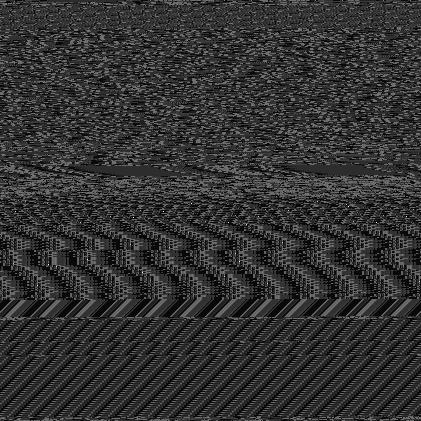

In [79]:
from IPython.display import Image
Image(filename='asm_image_5000/0BIdbVDEgmPwjYF4xzir.jpg')

## First 300 Image Pixels

In [ ]:
from  scipy.misc import imread

In [ ]:
import cv2
imagefeatures = np.zeros((5000, 300))

In [34]:
import tqdm

In [37]:
for i, asmfile in tqdm(enumerate(os.listdir("asm_image_5000"))):
    #startTime = time.time()
    img = imread("asm_image_5000/" + asmfile.split('.')[0] + '.jpg')
    img_arr = img.flatten()[:300]
    imagefeatures[i, :] += img_arr
    #print('time taken to extract first 300 features ',i,'.asm is',time.time()-startTime)

time taken to extract first 300 features  0 .asm is 1.254615306854248
time taken to extract first 300 features  1 .asm is 0.30045032501220703
time taken to extract first 300 features  2 .asm is 0.18468689918518066
time taken to extract first 300 features  3 .asm is 0.0054318904876708984
time taken to extract first 300 features  4 .asm is 0.024462223052978516
time taken to extract first 300 features  5 .asm is 0.0518336296081543
time taken to extract first 300 features  6 .asm is 0.31781649589538574
time taken to extract first 300 features  7 .asm is 0.08396220207214355
time taken to extract first 300 features  8 .asm is 0.020219802856445312
time taken to extract first 300 features  9 .asm is 2.014002799987793
time taken to extract first 300 features  10 .asm is 0.807213544845581
time taken to extract first 300 features  11 .asm is 0.08528518676757812
time taken to extract first 300 features  12 .asm is 0.008013486862182617
time taken to extract first 300 features  13 .asm is 0.66958236

time taken to extract first 300 features  222 .asm is 0.011200428009033203
time taken to extract first 300 features  223 .asm is 0.3617818355560303
time taken to extract first 300 features  224 .asm is 0.20344328880310059
time taken to extract first 300 features  225 .asm is 0.33840441703796387
time taken to extract first 300 features  226 .asm is 0.1448836326599121
time taken to extract first 300 features  227 .asm is 0.7414703369140625
time taken to extract first 300 features  228 .asm is 0.14615297317504883
time taken to extract first 300 features  229 .asm is 0.04460501670837402
time taken to extract first 300 features  230 .asm is 0.0496830940246582
time taken to extract first 300 features  231 .asm is 0.006952524185180664
time taken to extract first 300 features  232 .asm is 0.35010862350463867
time taken to extract first 300 features  233 .asm is 0.021968841552734375
time taken to extract first 300 features  234 .asm is 0.18712902069091797
time taken to extract first 300 feature

time taken to extract first 300 features  442 .asm is 0.006653308868408203
time taken to extract first 300 features  443 .asm is 0.21709394454956055
time taken to extract first 300 features  444 .asm is 0.17196106910705566
time taken to extract first 300 features  445 .asm is 0.0990445613861084
time taken to extract first 300 features  446 .asm is 0.02535557746887207
time taken to extract first 300 features  447 .asm is 0.019510507583618164
time taken to extract first 300 features  448 .asm is 0.5434658527374268
time taken to extract first 300 features  449 .asm is 0.03745579719543457
time taken to extract first 300 features  450 .asm is 0.0199127197265625
time taken to extract first 300 features  451 .asm is 0.782052755355835
time taken to extract first 300 features  452 .asm is 0.06962156295776367
time taken to extract first 300 features  453 .asm is 0.0067729949951171875
time taken to extract first 300 features  454 .asm is 0.2291874885559082
time taken to extract first 300 features

time taken to extract first 300 features  662 .asm is 0.0210263729095459
time taken to extract first 300 features  663 .asm is 0.004763126373291016
time taken to extract first 300 features  664 .asm is 0.005202770233154297
time taken to extract first 300 features  665 .asm is 0.05100727081298828
time taken to extract first 300 features  666 .asm is 0.13538050651550293
time taken to extract first 300 features  667 .asm is 0.298872709274292
time taken to extract first 300 features  668 .asm is 0.44184231758117676
time taken to extract first 300 features  669 .asm is 0.4007992744445801
time taken to extract first 300 features  670 .asm is 0.21119260787963867
time taken to extract first 300 features  671 .asm is 0.03870892524719238
time taken to extract first 300 features  672 .asm is 0.0055997371673583984
time taken to extract first 300 features  673 .asm is 0.02005457878112793
time taken to extract first 300 features  674 .asm is 0.7992870807647705
time taken to extract first 300 feature

time taken to extract first 300 features  882 .asm is 0.035736083984375
time taken to extract first 300 features  883 .asm is 0.2646481990814209
time taken to extract first 300 features  884 .asm is 0.22927069664001465
time taken to extract first 300 features  885 .asm is 0.03357434272766113
time taken to extract first 300 features  886 .asm is 0.010194063186645508
time taken to extract first 300 features  887 .asm is 0.17921066284179688
time taken to extract first 300 features  888 .asm is 0.02426624298095703
time taken to extract first 300 features  889 .asm is 0.0482480525970459
time taken to extract first 300 features  890 .asm is 0.7761936187744141
time taken to extract first 300 features  891 .asm is 0.18056058883666992
time taken to extract first 300 features  892 .asm is 0.04062986373901367
time taken to extract first 300 features  893 .asm is 0.023675203323364258
time taken to extract first 300 features  894 .asm is 0.03372621536254883
time taken to extract first 300 features 

time taken to extract first 300 features  1102 .asm is 1.2042291164398193
time taken to extract first 300 features  1103 .asm is 0.02745676040649414
time taken to extract first 300 features  1104 .asm is 0.014899015426635742
time taken to extract first 300 features  1105 .asm is 0.013839244842529297
time taken to extract first 300 features  1106 .asm is 0.23895788192749023
time taken to extract first 300 features  1107 .asm is 0.10625219345092773
time taken to extract first 300 features  1108 .asm is 1.5714197158813477
time taken to extract first 300 features  1109 .asm is 0.03949546813964844
time taken to extract first 300 features  1110 .asm is 0.0187070369720459
time taken to extract first 300 features  1111 .asm is 0.37721681594848633
time taken to extract first 300 features  1112 .asm is 0.13268661499023438
time taken to extract first 300 features  1113 .asm is 0.19772982597351074
time taken to extract first 300 features  1114 .asm is 0.032616376876831055
time taken to extract fir

time taken to extract first 300 features  1320 .asm is 0.030360937118530273
time taken to extract first 300 features  1321 .asm is 0.014134407043457031
time taken to extract first 300 features  1322 .asm is 0.01294708251953125
time taken to extract first 300 features  1323 .asm is 0.15569162368774414
time taken to extract first 300 features  1324 .asm is 0.04215717315673828
time taken to extract first 300 features  1325 .asm is 0.010898351669311523
time taken to extract first 300 features  1326 .asm is 0.02373814582824707
time taken to extract first 300 features  1327 .asm is 1.9756193161010742
time taken to extract first 300 features  1328 .asm is 3.1998116970062256
time taken to extract first 300 features  1329 .asm is 1.3573417663574219
time taken to extract first 300 features  1330 .asm is 0.2778491973876953
time taken to extract first 300 features  1331 .asm is 0.05529332160949707
time taken to extract first 300 features  1332 .asm is 0.825131893157959
time taken to extract first 

time taken to extract first 300 features  1538 .asm is 1.007206678390503
time taken to extract first 300 features  1539 .asm is 0.05006861686706543
time taken to extract first 300 features  1540 .asm is 0.13697457313537598
time taken to extract first 300 features  1541 .asm is 0.31646060943603516
time taken to extract first 300 features  1542 .asm is 1.213228464126587
time taken to extract first 300 features  1543 .asm is 0.05988478660583496
time taken to extract first 300 features  1544 .asm is 0.0686194896697998
time taken to extract first 300 features  1545 .asm is 0.10483455657958984
time taken to extract first 300 features  1546 .asm is 0.11540794372558594
time taken to extract first 300 features  1547 .asm is 0.40468835830688477
time taken to extract first 300 features  1548 .asm is 0.03493642807006836
time taken to extract first 300 features  1549 .asm is 0.35457372665405273
time taken to extract first 300 features  1550 .asm is 0.0958709716796875
time taken to extract first 300

time taken to extract first 300 features  1756 .asm is 0.008548259735107422
time taken to extract first 300 features  1757 .asm is 0.3917255401611328
time taken to extract first 300 features  1758 .asm is 0.07876706123352051
time taken to extract first 300 features  1759 .asm is 0.02496790885925293
time taken to extract first 300 features  1760 .asm is 0.17364859580993652
time taken to extract first 300 features  1761 .asm is 1.9643466472625732
time taken to extract first 300 features  1762 .asm is 0.4476339817047119
time taken to extract first 300 features  1763 .asm is 0.8969302177429199
time taken to extract first 300 features  1764 .asm is 0.029746055603027344
time taken to extract first 300 features  1765 .asm is 2.8095862865448
time taken to extract first 300 features  1766 .asm is 1.575788974761963
time taken to extract first 300 features  1767 .asm is 0.049352169036865234
time taken to extract first 300 features  1768 .asm is 0.05624556541442871
time taken to extract first 300 

time taken to extract first 300 features  1974 .asm is 0.0332491397857666
time taken to extract first 300 features  1975 .asm is 0.08896136283874512
time taken to extract first 300 features  1976 .asm is 0.03553891181945801
time taken to extract first 300 features  1977 .asm is 1.6146609783172607
time taken to extract first 300 features  1978 .asm is 0.12627911567687988
time taken to extract first 300 features  1979 .asm is 0.03581714630126953
time taken to extract first 300 features  1980 .asm is 1.4688072204589844
time taken to extract first 300 features  1981 .asm is 0.03582191467285156
time taken to extract first 300 features  1982 .asm is 0.3988792896270752
time taken to extract first 300 features  1983 .asm is 0.034183502197265625
time taken to extract first 300 features  1984 .asm is 0.1835472583770752
time taken to extract first 300 features  1985 .asm is 0.030545949935913086
time taken to extract first 300 features  1986 .asm is 0.010641336441040039
time taken to extract first

time taken to extract first 300 features  2192 .asm is 0.17916512489318848
time taken to extract first 300 features  2193 .asm is 0.07909131050109863
time taken to extract first 300 features  2194 .asm is 0.1292881965637207
time taken to extract first 300 features  2195 .asm is 0.8218972682952881
time taken to extract first 300 features  2196 .asm is 0.016041278839111328
time taken to extract first 300 features  2197 .asm is 0.0190279483795166
time taken to extract first 300 features  2198 .asm is 0.007724761962890625
time taken to extract first 300 features  2199 .asm is 0.027106761932373047
time taken to extract first 300 features  2200 .asm is 0.07505488395690918
time taken to extract first 300 features  2201 .asm is 0.025238752365112305
time taken to extract first 300 features  2202 .asm is 0.08100175857543945
time taken to extract first 300 features  2203 .asm is 0.009805440902709961
time taken to extract first 300 features  2204 .asm is 0.011229515075683594
time taken to extract 

time taken to extract first 300 features  2410 .asm is 0.3553736209869385
time taken to extract first 300 features  2411 .asm is 1.0333263874053955
time taken to extract first 300 features  2412 .asm is 0.09377002716064453
time taken to extract first 300 features  2413 .asm is 0.41115331649780273
time taken to extract first 300 features  2414 .asm is 0.025223731994628906
time taken to extract first 300 features  2415 .asm is 0.24114370346069336
time taken to extract first 300 features  2416 .asm is 0.01800251007080078
time taken to extract first 300 features  2417 .asm is 0.008015632629394531
time taken to extract first 300 features  2418 .asm is 0.010657548904418945
time taken to extract first 300 features  2419 .asm is 0.03203439712524414
time taken to extract first 300 features  2420 .asm is 0.1917109489440918
time taken to extract first 300 features  2421 .asm is 0.013258934020996094
time taken to extract first 300 features  2422 .asm is 0.2102680206298828
time taken to extract fir

time taken to extract first 300 features  2628 .asm is 0.10589933395385742
time taken to extract first 300 features  2629 .asm is 0.09766530990600586
time taken to extract first 300 features  2630 .asm is 0.08735942840576172
time taken to extract first 300 features  2631 .asm is 0.0059278011322021484
time taken to extract first 300 features  2632 .asm is 0.0064013004302978516
time taken to extract first 300 features  2633 .asm is 0.19963502883911133
time taken to extract first 300 features  2634 .asm is 0.00772547721862793
time taken to extract first 300 features  2635 .asm is 0.008636474609375
time taken to extract first 300 features  2636 .asm is 0.024019718170166016
time taken to extract first 300 features  2637 .asm is 0.35036635398864746
time taken to extract first 300 features  2638 .asm is 0.01565718650817871
time taken to extract first 300 features  2639 .asm is 0.008604049682617188
time taken to extract first 300 features  2640 .asm is 0.23948979377746582
time taken to extract

time taken to extract first 300 features  2846 .asm is 1.2204794883728027
time taken to extract first 300 features  2847 .asm is 0.16110730171203613
time taken to extract first 300 features  2848 .asm is 0.9820387363433838
time taken to extract first 300 features  2849 .asm is 1.248483657836914
time taken to extract first 300 features  2850 .asm is 1.2310068607330322
time taken to extract first 300 features  2851 .asm is 0.4327547550201416
time taken to extract first 300 features  2852 .asm is 0.010323286056518555
time taken to extract first 300 features  2853 .asm is 0.17476725578308105
time taken to extract first 300 features  2854 .asm is 1.0799427032470703
time taken to extract first 300 features  2855 .asm is 2.977036237716675
time taken to extract first 300 features  2856 .asm is 1.2844748497009277
time taken to extract first 300 features  2857 .asm is 0.013882875442504883
time taken to extract first 300 features  2858 .asm is 2.5162806510925293
time taken to extract first 300 fe

time taken to extract first 300 features  3064 .asm is 0.009774446487426758
time taken to extract first 300 features  3065 .asm is 0.05153036117553711
time taken to extract first 300 features  3066 .asm is 2.312737464904785
time taken to extract first 300 features  3067 .asm is 1.2173349857330322
time taken to extract first 300 features  3068 .asm is 0.032129526138305664
time taken to extract first 300 features  3069 .asm is 0.08302998542785645
time taken to extract first 300 features  3070 .asm is 0.979651689529419
time taken to extract first 300 features  3071 .asm is 2.932903289794922
time taken to extract first 300 features  3072 .asm is 0.12712669372558594
time taken to extract first 300 features  3073 .asm is 0.030218839645385742
time taken to extract first 300 features  3074 .asm is 0.19186043739318848
time taken to extract first 300 features  3075 .asm is 1.2007477283477783
time taken to extract first 300 features  3076 .asm is 0.0939340591430664
time taken to extract first 300

time taken to extract first 300 features  3283 .asm is 0.7296688556671143
time taken to extract first 300 features  3284 .asm is 0.14397168159484863
time taken to extract first 300 features  3285 .asm is 0.009342432022094727
time taken to extract first 300 features  3286 .asm is 0.23093891143798828
time taken to extract first 300 features  3287 .asm is 0.03848385810852051
time taken to extract first 300 features  3288 .asm is 0.1096639633178711
time taken to extract first 300 features  3289 .asm is 0.16751933097839355
time taken to extract first 300 features  3290 .asm is 0.014250516891479492
time taken to extract first 300 features  3291 .asm is 0.1855623722076416
time taken to extract first 300 features  3292 .asm is 0.04568076133728027
time taken to extract first 300 features  3293 .asm is 0.5287017822265625
time taken to extract first 300 features  3294 .asm is 1.1716670989990234
time taken to extract first 300 features  3295 .asm is 0.029897212982177734
time taken to extract first

time taken to extract first 300 features  3501 .asm is 0.9310853481292725
time taken to extract first 300 features  3502 .asm is 1.5934934616088867
time taken to extract first 300 features  3503 .asm is 1.0719928741455078
time taken to extract first 300 features  3504 .asm is 1.2030680179595947
time taken to extract first 300 features  3505 .asm is 1.4983179569244385
time taken to extract first 300 features  3506 .asm is 3.599503517150879
time taken to extract first 300 features  3507 .asm is 0.12414193153381348
time taken to extract first 300 features  3508 .asm is 0.026630640029907227
time taken to extract first 300 features  3509 .asm is 0.051110267639160156
time taken to extract first 300 features  3510 .asm is 0.008503437042236328
time taken to extract first 300 features  3511 .asm is 0.02168869972229004
time taken to extract first 300 features  3512 .asm is 0.017158985137939453
time taken to extract first 300 features  3513 .asm is 0.022662639617919922
time taken to extract first

time taken to extract first 300 features  3719 .asm is 1.5544319152832031
time taken to extract first 300 features  3720 .asm is 1.153209924697876
time taken to extract first 300 features  3721 .asm is 0.055144548416137695
time taken to extract first 300 features  3722 .asm is 0.010068416595458984
time taken to extract first 300 features  3723 .asm is 1.0962014198303223
time taken to extract first 300 features  3724 .asm is 0.024725675582885742
time taken to extract first 300 features  3725 .asm is 0.6048645973205566
time taken to extract first 300 features  3726 .asm is 0.013368844985961914
time taken to extract first 300 features  3727 .asm is 0.03454399108886719
time taken to extract first 300 features  3728 .asm is 0.2869689464569092
time taken to extract first 300 features  3729 .asm is 1.0304336547851562
time taken to extract first 300 features  3730 .asm is 0.024736881256103516
time taken to extract first 300 features  3731 .asm is 0.02099013328552246
time taken to extract first

time taken to extract first 300 features  3937 .asm is 2.2747340202331543
time taken to extract first 300 features  3938 .asm is 0.046015024185180664
time taken to extract first 300 features  3939 .asm is 0.6865067481994629
time taken to extract first 300 features  3940 .asm is 4.016422748565674
time taken to extract first 300 features  3941 .asm is 0.05299854278564453
time taken to extract first 300 features  3942 .asm is 0.17681002616882324
time taken to extract first 300 features  3943 .asm is 1.703413486480713
time taken to extract first 300 features  3944 .asm is 1.1323959827423096
time taken to extract first 300 features  3945 .asm is 0.07172322273254395
time taken to extract first 300 features  3946 .asm is 0.15682363510131836
time taken to extract first 300 features  3947 .asm is 0.030756473541259766
time taken to extract first 300 features  3948 .asm is 0.017616987228393555
time taken to extract first 300 features  3949 .asm is 0.10601162910461426
time taken to extract first 3

time taken to extract first 300 features  4155 .asm is 1.3058323860168457
time taken to extract first 300 features  4156 .asm is 0.03642725944519043
time taken to extract first 300 features  4157 .asm is 0.009726762771606445
time taken to extract first 300 features  4158 .asm is 0.07209944725036621
time taken to extract first 300 features  4159 .asm is 0.016779661178588867
time taken to extract first 300 features  4160 .asm is 0.09812474250793457
time taken to extract first 300 features  4161 .asm is 0.013361454010009766
time taken to extract first 300 features  4162 .asm is 0.01257014274597168
time taken to extract first 300 features  4163 .asm is 0.23798227310180664
time taken to extract first 300 features  4164 .asm is 0.05072760581970215
time taken to extract first 300 features  4165 .asm is 0.13407230377197266
time taken to extract first 300 features  4166 .asm is 0.21625256538391113
time taken to extract first 300 features  4167 .asm is 0.033080339431762695
time taken to extract 

time taken to extract first 300 features  4373 .asm is 2.131457805633545
time taken to extract first 300 features  4374 .asm is 0.580596923828125
time taken to extract first 300 features  4375 .asm is 0.15918850898742676
time taken to extract first 300 features  4376 .asm is 0.0481419563293457
time taken to extract first 300 features  4377 .asm is 0.9560060501098633
time taken to extract first 300 features  4378 .asm is 0.12494826316833496
time taken to extract first 300 features  4379 .asm is 0.008228540420532227
time taken to extract first 300 features  4380 .asm is 0.026011228561401367
time taken to extract first 300 features  4381 .asm is 0.016956329345703125
time taken to extract first 300 features  4382 .asm is 0.0401301383972168
time taken to extract first 300 features  4383 .asm is 0.014199018478393555
time taken to extract first 300 features  4384 .asm is 0.23678016662597656
time taken to extract first 300 features  4385 .asm is 0.0308535099029541
time taken to extract first 3

time taken to extract first 300 features  4591 .asm is 0.18543434143066406
time taken to extract first 300 features  4592 .asm is 0.017223834991455078
time taken to extract first 300 features  4593 .asm is 1.6292624473571777
time taken to extract first 300 features  4594 .asm is 0.0634467601776123
time taken to extract first 300 features  4595 .asm is 0.011010408401489258
time taken to extract first 300 features  4596 .asm is 0.033428192138671875
time taken to extract first 300 features  4597 .asm is 0.340526819229126
time taken to extract first 300 features  4598 .asm is 0.05371665954589844
time taken to extract first 300 features  4599 .asm is 0.029097557067871094
time taken to extract first 300 features  4600 .asm is 1.065168857574463
time taken to extract first 300 features  4601 .asm is 0.4139218330383301
time taken to extract first 300 features  4602 .asm is 1.0919723510742188
time taken to extract first 300 features  4603 .asm is 0.07141542434692383
time taken to extract first 3

time taken to extract first 300 features  4809 .asm is 0.04471087455749512
time taken to extract first 300 features  4810 .asm is 0.21975064277648926
time taken to extract first 300 features  4811 .asm is 1.042870044708252
time taken to extract first 300 features  4812 .asm is 2.362645149230957
time taken to extract first 300 features  4813 .asm is 4.185799598693848
time taken to extract first 300 features  4814 .asm is 0.4332692623138428
time taken to extract first 300 features  4815 .asm is 0.20609140396118164
time taken to extract first 300 features  4816 .asm is 0.11229920387268066
time taken to extract first 300 features  4817 .asm is 0.13771653175354004
time taken to extract first 300 features  4818 .asm is 0.05205702781677246
time taken to extract first 300 features  4819 .asm is 0.05161166191101074
time taken to extract first 300 features  4820 .asm is 0.011323213577270508
time taken to extract first 300 features  4821 .asm is 0.01147150993347168
time taken to extract first 300

time taken to extract first 300 features  5027 .asm is 0.030213117599487305
time taken to extract first 300 features  5028 .asm is 0.506129264831543
time taken to extract first 300 features  5029 .asm is 0.012656450271606445
time taken to extract first 300 features  5030 .asm is 0.283998966217041
time taken to extract first 300 features  5031 .asm is 0.0861365795135498
time taken to extract first 300 features  5032 .asm is 0.11505293846130371
time taken to extract first 300 features  5033 .asm is 0.009582042694091797
time taken to extract first 300 features  5034 .asm is 0.23749661445617676
time taken to extract first 300 features  5035 .asm is 0.027943849563598633
time taken to extract first 300 features  5036 .asm is 0.5707948207855225
time taken to extract first 300 features  5037 .asm is 1.2869560718536377
time taken to extract first 300 features  5038 .asm is 0.02922201156616211
time taken to extract first 300 features  5039 .asm is 0.2219550609588623
time taken to extract first 3

time taken to extract first 300 features  5245 .asm is 0.01741194725036621
time taken to extract first 300 features  5246 .asm is 0.026693105697631836
time taken to extract first 300 features  5247 .asm is 0.009378671646118164
time taken to extract first 300 features  5248 .asm is 0.03163480758666992
time taken to extract first 300 features  5249 .asm is 0.21947050094604492
time taken to extract first 300 features  5250 .asm is 0.055877685546875
time taken to extract first 300 features  5251 .asm is 0.32074928283691406
time taken to extract first 300 features  5252 .asm is 2.109299898147583
time taken to extract first 300 features  5253 .asm is 0.02501511573791504
time taken to extract first 300 features  5254 .asm is 0.0562434196472168
time taken to extract first 300 features  5255 .asm is 0.007275104522705078
time taken to extract first 300 features  5256 .asm is 0.92234206199646
time taken to extract first 300 features  5257 .asm is 0.11782550811767578
time taken to extract first 30

time taken to extract first 300 features  5463 .asm is 0.04697990417480469
time taken to extract first 300 features  5464 .asm is 0.00973653793334961
time taken to extract first 300 features  5465 .asm is 0.007797956466674805
time taken to extract first 300 features  5466 .asm is 0.006641864776611328
time taken to extract first 300 features  5467 .asm is 0.01682734489440918
time taken to extract first 300 features  5468 .asm is 0.3517885208129883
time taken to extract first 300 features  5469 .asm is 0.035902976989746094
time taken to extract first 300 features  5470 .asm is 0.2039930820465088
time taken to extract first 300 features  5471 .asm is 0.9625339508056641
time taken to extract first 300 features  5472 .asm is 0.43299078941345215
time taken to extract first 300 features  5473 .asm is 0.026059627532958984
time taken to extract first 300 features  5474 .asm is 1.3929424285888672
time taken to extract first 300 features  5475 .asm is 0.05093693733215332
time taken to extract fir

time taken to extract first 300 features  5681 .asm is 0.01662921905517578
time taken to extract first 300 features  5682 .asm is 0.2039012908935547
time taken to extract first 300 features  5683 .asm is 1.2504396438598633
time taken to extract first 300 features  5684 .asm is 0.028714895248413086
time taken to extract first 300 features  5685 .asm is 0.3470628261566162
time taken to extract first 300 features  5686 .asm is 0.6922972202301025
time taken to extract first 300 features  5687 .asm is 1.7106800079345703
time taken to extract first 300 features  5688 .asm is 2.1268537044525146
time taken to extract first 300 features  5689 .asm is 0.8480997085571289
time taken to extract first 300 features  5690 .asm is 2.1924312114715576
time taken to extract first 300 features  5691 .asm is 0.026769638061523438
time taken to extract first 300 features  5692 .asm is 0.8596904277801514
time taken to extract first 300 features  5693 .asm is 0.05008697509765625
time taken to extract first 300 

time taken to extract first 300 features  5899 .asm is 0.06704950332641602
time taken to extract first 300 features  5900 .asm is 0.038240671157836914
time taken to extract first 300 features  5901 .asm is 0.006996631622314453
time taken to extract first 300 features  5902 .asm is 0.9867677688598633
time taken to extract first 300 features  5903 .asm is 0.6091277599334717
time taken to extract first 300 features  5904 .asm is 0.009362459182739258
time taken to extract first 300 features  5905 .asm is 0.0769801139831543
time taken to extract first 300 features  5906 .asm is 0.04569411277770996
time taken to extract first 300 features  5907 .asm is 0.04390239715576172
time taken to extract first 300 features  5908 .asm is 0.03291177749633789
time taken to extract first 300 features  5909 .asm is 0.013208627700805664
time taken to extract first 300 features  5910 .asm is 2.308824300765991
time taken to extract first 300 features  5911 .asm is 0.613976001739502
time taken to extract first 

time taken to extract first 300 features  6117 .asm is 0.021317720413208008
time taken to extract first 300 features  6118 .asm is 0.14255690574645996
time taken to extract first 300 features  6119 .asm is 0.16488265991210938
time taken to extract first 300 features  6120 .asm is 2.296520471572876
time taken to extract first 300 features  6121 .asm is 0.022852420806884766
time taken to extract first 300 features  6122 .asm is 0.07171487808227539
time taken to extract first 300 features  6123 .asm is 0.03170156478881836
time taken to extract first 300 features  6124 .asm is 0.026843547821044922
time taken to extract first 300 features  6125 .asm is 0.007016420364379883
time taken to extract first 300 features  6126 .asm is 0.006677865982055664
time taken to extract first 300 features  6127 .asm is 0.3246936798095703
time taken to extract first 300 features  6128 .asm is 0.047155141830444336
time taken to extract first 300 features  6129 .asm is 0.024150609970092773
time taken to extract

time taken to extract first 300 features  6335 .asm is 0.8512492179870605
time taken to extract first 300 features  6336 .asm is 0.01433706283569336
time taken to extract first 300 features  6337 .asm is 0.01959371566772461
time taken to extract first 300 features  6338 .asm is 0.02907872200012207
time taken to extract first 300 features  6339 .asm is 0.005643367767333984
time taken to extract first 300 features  6340 .asm is 0.027361392974853516
time taken to extract first 300 features  6341 .asm is 0.03868603706359863
time taken to extract first 300 features  6342 .asm is 3.3496768474578857
time taken to extract first 300 features  6343 .asm is 0.053005218505859375
time taken to extract first 300 features  6344 .asm is 0.010038614273071289
time taken to extract first 300 features  6345 .asm is 1.0623955726623535
time taken to extract first 300 features  6346 .asm is 0.99961256980896
time taken to extract first 300 features  6347 .asm is 0.01213216781616211
time taken to extract first

time taken to extract first 300 features  6553 .asm is 1.4987106323242188
time taken to extract first 300 features  6554 .asm is 0.018390655517578125
time taken to extract first 300 features  6555 .asm is 0.19916033744812012
time taken to extract first 300 features  6556 .asm is 0.01786971092224121
time taken to extract first 300 features  6557 .asm is 0.021131277084350586
time taken to extract first 300 features  6558 .asm is 1.0022127628326416
time taken to extract first 300 features  6559 .asm is 1.24253511428833
time taken to extract first 300 features  6560 .asm is 0.00814962387084961
time taken to extract first 300 features  6561 .asm is 0.4336223602294922
time taken to extract first 300 features  6562 .asm is 0.05684685707092285
time taken to extract first 300 features  6563 .asm is 0.04700064659118652
time taken to extract first 300 features  6564 .asm is 0.023062944412231445
time taken to extract first 300 features  6565 .asm is 0.0775766372680664
time taken to extract first 3

time taken to extract first 300 features  6771 .asm is 0.08601999282836914
time taken to extract first 300 features  6772 .asm is 0.22547554969787598
time taken to extract first 300 features  6773 .asm is 0.06754350662231445
time taken to extract first 300 features  6774 .asm is 0.01887989044189453
time taken to extract first 300 features  6775 .asm is 0.7309377193450928
time taken to extract first 300 features  6776 .asm is 1.095383644104004
time taken to extract first 300 features  6777 .asm is 0.3696420192718506
time taken to extract first 300 features  6778 .asm is 0.04262948036193848
time taken to extract first 300 features  6779 .asm is 0.9217400550842285
time taken to extract first 300 features  6780 .asm is 3.821439504623413
time taken to extract first 300 features  6781 .asm is 0.10825276374816895
time taken to extract first 300 features  6782 .asm is 0.14307928085327148
time taken to extract first 300 features  6783 .asm is 0.44518017768859863
time taken to extract first 300 

time taken to extract first 300 features  6989 .asm is 1.3607170581817627
time taken to extract first 300 features  6990 .asm is 0.8355746269226074
time taken to extract first 300 features  6991 .asm is 0.17055082321166992
time taken to extract first 300 features  6992 .asm is 0.06971526145935059
time taken to extract first 300 features  6993 .asm is 0.0178680419921875
time taken to extract first 300 features  6994 .asm is 0.0067408084869384766
time taken to extract first 300 features  6995 .asm is 0.1373600959777832
time taken to extract first 300 features  6996 .asm is 0.012154817581176758
time taken to extract first 300 features  6997 .asm is 1.7924516201019287
time taken to extract first 300 features  6998 .asm is 0.824866533279419
time taken to extract first 300 features  6999 .asm is 0.013651609420776367
time taken to extract first 300 features  7000 .asm is 0.1749866008758545
time taken to extract first 300 features  7001 .asm is 0.13480329513549805
time taken to extract first 3

time taken to extract first 300 features  7208 .asm is 0.018011808395385742
time taken to extract first 300 features  7209 .asm is 0.008363008499145508
time taken to extract first 300 features  7210 .asm is 0.9733297824859619
time taken to extract first 300 features  7211 .asm is 2.6589434146881104
time taken to extract first 300 features  7212 .asm is 0.0564727783203125
time taken to extract first 300 features  7213 .asm is 0.06406497955322266
time taken to extract first 300 features  7214 .asm is 0.07122373580932617
time taken to extract first 300 features  7215 .asm is 1.0307495594024658
time taken to extract first 300 features  7216 .asm is 0.20677614212036133
time taken to extract first 300 features  7217 .asm is 2.316638231277466
time taken to extract first 300 features  7218 .asm is 1.0856823921203613
time taken to extract first 300 features  7219 .asm is 0.023186445236206055
time taken to extract first 300 features  7220 .asm is 0.2093353271484375
time taken to extract first 30

time taken to extract first 300 features  7426 .asm is 1.4332826137542725
time taken to extract first 300 features  7427 .asm is 2.7779431343078613
time taken to extract first 300 features  7428 .asm is 0.037796735763549805
time taken to extract first 300 features  7429 .asm is 0.1362309455871582
time taken to extract first 300 features  7430 .asm is 0.024703025817871094
time taken to extract first 300 features  7431 .asm is 1.6547555923461914
time taken to extract first 300 features  7432 .asm is 0.03902554512023926
time taken to extract first 300 features  7433 .asm is 0.15180611610412598
time taken to extract first 300 features  7434 .asm is 0.8520729541778564
time taken to extract first 300 features  7435 .asm is 1.9593870639801025
time taken to extract first 300 features  7436 .asm is 1.6433665752410889
time taken to extract first 300 features  7437 .asm is 1.095649003982544
time taken to extract first 300 features  7438 .asm is 2.0347402095794678
time taken to extract first 300 f

time taken to extract first 300 features  7644 .asm is 0.19483590126037598
time taken to extract first 300 features  7645 .asm is 0.5136466026306152
time taken to extract first 300 features  7646 .asm is 1.0067296028137207
time taken to extract first 300 features  7647 .asm is 1.7410476207733154
time taken to extract first 300 features  7648 .asm is 1.1996300220489502
time taken to extract first 300 features  7649 .asm is 0.047025203704833984
time taken to extract first 300 features  7650 .asm is 0.018700599670410156
time taken to extract first 300 features  7651 .asm is 0.17270588874816895
time taken to extract first 300 features  7652 .asm is 0.41716527938842773
time taken to extract first 300 features  7653 .asm is 0.1485888957977295
time taken to extract first 300 features  7654 .asm is 0.036678314208984375
time taken to extract first 300 features  7655 .asm is 0.5603609085083008
time taken to extract first 300 features  7656 .asm is 0.01379084587097168
time taken to extract first 

time taken to extract first 300 features  7862 .asm is 0.06353616714477539
time taken to extract first 300 features  7863 .asm is 0.015977859497070312
time taken to extract first 300 features  7864 .asm is 0.43770575523376465
time taken to extract first 300 features  7865 .asm is 0.43046021461486816
time taken to extract first 300 features  7866 .asm is 0.29820990562438965
time taken to extract first 300 features  7867 .asm is 0.017330646514892578
time taken to extract first 300 features  7868 .asm is 0.013040542602539062
time taken to extract first 300 features  7869 .asm is 0.05698132514953613
time taken to extract first 300 features  7870 .asm is 0.01720404624938965
time taken to extract first 300 features  7871 .asm is 0.14729666709899902
time taken to extract first 300 features  7872 .asm is 0.017083406448364258
time taken to extract first 300 features  7873 .asm is 0.035332679748535156
time taken to extract first 300 features  7874 .asm is 0.038118600845336914
time taken to extra

time taken to extract first 300 features  8080 .asm is 0.0788278579711914
time taken to extract first 300 features  8081 .asm is 0.020389080047607422
time taken to extract first 300 features  8082 .asm is 0.061903953552246094
time taken to extract first 300 features  8083 .asm is 0.4108850955963135
time taken to extract first 300 features  8084 .asm is 0.4587559700012207
time taken to extract first 300 features  8085 .asm is 0.3419075012207031
time taken to extract first 300 features  8086 .asm is 0.9445981979370117
time taken to extract first 300 features  8087 .asm is 1.01832914352417
time taken to extract first 300 features  8088 .asm is 0.34198427200317383
time taken to extract first 300 features  8089 .asm is 0.03911232948303223
time taken to extract first 300 features  8090 .asm is 1.0796699523925781
time taken to extract first 300 features  8091 .asm is 0.9875309467315674
time taken to extract first 300 features  8092 .asm is 0.18243002891540527
time taken to extract first 300 f

time taken to extract first 300 features  8298 .asm is 3.421006202697754
time taken to extract first 300 features  8299 .asm is 0.037683963775634766
time taken to extract first 300 features  8300 .asm is 1.0792279243469238
time taken to extract first 300 features  8301 .asm is 0.9594433307647705
time taken to extract first 300 features  8302 .asm is 0.025960445404052734
time taken to extract first 300 features  8303 .asm is 0.17216181755065918
time taken to extract first 300 features  8304 .asm is 0.06129336357116699
time taken to extract first 300 features  8305 .asm is 1.8937954902648926
time taken to extract first 300 features  8306 .asm is 0.03449654579162598
time taken to extract first 300 features  8307 .asm is 0.7651443481445312
time taken to extract first 300 features  8308 .asm is 0.02603292465209961
time taken to extract first 300 features  8309 .asm is 0.1839902400970459
time taken to extract first 300 features  8310 .asm is 1.080927848815918
time taken to extract first 300 

time taken to extract first 300 features  8516 .asm is 0.1935725212097168
time taken to extract first 300 features  8517 .asm is 0.03967547416687012
time taken to extract first 300 features  8518 .asm is 2.180061101913452
time taken to extract first 300 features  8519 .asm is 0.04129743576049805
time taken to extract first 300 features  8520 .asm is 3.179563522338867
time taken to extract first 300 features  8521 .asm is 0.052651166915893555
time taken to extract first 300 features  8522 .asm is 0.4341611862182617
time taken to extract first 300 features  8523 .asm is 1.2356641292572021
time taken to extract first 300 features  8524 .asm is 0.40639638900756836
time taken to extract first 300 features  8525 .asm is 0.038248538970947266
time taken to extract first 300 features  8526 .asm is 0.029844999313354492
time taken to extract first 300 features  8527 .asm is 1.0023927688598633
time taken to extract first 300 features  8528 .asm is 1.3256773948669434
time taken to extract first 300

time taken to extract first 300 features  8734 .asm is 0.04673027992248535
time taken to extract first 300 features  8735 .asm is 0.027718544006347656
time taken to extract first 300 features  8736 .asm is 0.30548787117004395
time taken to extract first 300 features  8737 .asm is 0.6847305297851562
time taken to extract first 300 features  8738 .asm is 0.06512331962585449
time taken to extract first 300 features  8739 .asm is 0.1006629467010498
time taken to extract first 300 features  8740 .asm is 0.02271747589111328
time taken to extract first 300 features  8741 .asm is 0.03925895690917969
time taken to extract first 300 features  8742 .asm is 0.013519763946533203
time taken to extract first 300 features  8743 .asm is 0.006013631820678711
time taken to extract first 300 features  8744 .asm is 0.010164260864257812
time taken to extract first 300 features  8745 .asm is 0.6300115585327148
time taken to extract first 300 features  8746 .asm is 0.038649797439575195
time taken to extract f

time taken to extract first 300 features  8952 .asm is 0.01196742057800293
time taken to extract first 300 features  8953 .asm is 0.08779764175415039
time taken to extract first 300 features  8954 .asm is 0.09476137161254883
time taken to extract first 300 features  8955 .asm is 0.06881570816040039
time taken to extract first 300 features  8956 .asm is 0.007977962493896484
time taken to extract first 300 features  8957 .asm is 0.45677900314331055
time taken to extract first 300 features  8958 .asm is 0.37998247146606445
time taken to extract first 300 features  8959 .asm is 0.7001276016235352
time taken to extract first 300 features  8960 .asm is 0.4886949062347412
time taken to extract first 300 features  8961 .asm is 0.13364195823669434
time taken to extract first 300 features  8962 .asm is 0.05784440040588379
time taken to extract first 300 features  8963 .asm is 0.0069806575775146484
time taken to extract first 300 features  8964 .asm is 0.006982564926147461
time taken to extract f

time taken to extract first 300 features  9169 .asm is 0.4727351665496826
time taken to extract first 300 features  9170 .asm is 0.030916452407836914
time taken to extract first 300 features  9171 .asm is 0.0359039306640625
time taken to extract first 300 features  9172 .asm is 0.016954421997070312
time taken to extract first 300 features  9173 .asm is 0.126662015914917
time taken to extract first 300 features  9174 .asm is 0.007977724075317383
time taken to extract first 300 features  9175 .asm is 0.03590106964111328
time taken to extract first 300 features  9176 .asm is 0.006982326507568359
time taken to extract first 300 features  9177 .asm is 0.018949508666992188
time taken to extract first 300 features  9178 .asm is 0.10671496391296387
time taken to extract first 300 features  9179 .asm is 0.02892303466796875
time taken to extract first 300 features  9180 .asm is 0.16755437850952148
time taken to extract first 300 features  9181 .asm is 0.042885541915893555
time taken to extract f

time taken to extract first 300 features  9387 .asm is 0.22440099716186523
time taken to extract first 300 features  9388 .asm is 0.1376328468322754
time taken to extract first 300 features  9389 .asm is 0.09773802757263184
time taken to extract first 300 features  9390 .asm is 0.12366819381713867
time taken to extract first 300 features  9391 .asm is 0.0907588005065918
time taken to extract first 300 features  9392 .asm is 0.22040987014770508
time taken to extract first 300 features  9393 .asm is 0.4637598991394043
time taken to extract first 300 features  9394 .asm is 0.10870862007141113
time taken to extract first 300 features  9395 .asm is 0.48071742057800293
time taken to extract first 300 features  9396 .asm is 0.016923189163208008
time taken to extract first 300 features  9397 .asm is 0.27426671981811523
time taken to extract first 300 features  9398 .asm is 0.04587721824645996
time taken to extract first 300 features  9399 .asm is 0.03690218925476074
time taken to extract first

time taken to extract first 300 features  9605 .asm is 0.5734665393829346
time taken to extract first 300 features  9606 .asm is 1.0252318382263184
time taken to extract first 300 features  9607 .asm is 0.17353510856628418
time taken to extract first 300 features  9608 .asm is 0.6489129066467285
time taken to extract first 300 features  9609 .asm is 0.1216742992401123
time taken to extract first 300 features  9610 .asm is 0.023935317993164062
time taken to extract first 300 features  9611 .asm is 0.2622990608215332
time taken to extract first 300 features  9612 .asm is 0.010969877243041992
time taken to extract first 300 features  9613 .asm is 0.6401493549346924
time taken to extract first 300 features  9614 .asm is 0.20445013046264648
time taken to extract first 300 features  9615 .asm is 0.5726122856140137
time taken to extract first 300 features  9616 .asm is 0.03291130065917969
time taken to extract first 300 features  9617 .asm is 0.02094435691833496
time taken to extract first 30

time taken to extract first 300 features  9823 .asm is 0.0528569221496582
time taken to extract first 300 features  9824 .asm is 0.63161301612854
time taken to extract first 300 features  9825 .asm is 0.08779549598693848
time taken to extract first 300 features  9826 .asm is 0.6126301288604736
time taken to extract first 300 features  9827 .asm is 0.5809717178344727
time taken to extract first 300 features  9828 .asm is 0.03889346122741699
time taken to extract first 300 features  9829 .asm is 0.013966083526611328
time taken to extract first 300 features  9830 .asm is 0.007977962493896484
time taken to extract first 300 features  9831 .asm is 0.0738363265991211
time taken to extract first 300 features  9832 .asm is 0.038895606994628906
time taken to extract first 300 features  9833 .asm is 0.029953956604003906
time taken to extract first 300 features  9834 .asm is 0.2854766845703125
time taken to extract first 300 features  9835 .asm is 0.07978630065917969
time taken to extract first 3

time taken to extract first 300 features  10040 .asm is 0.11768436431884766
time taken to extract first 300 features  10041 .asm is 0.06881594657897949
time taken to extract first 300 features  10042 .asm is 0.6152129173278809
time taken to extract first 300 features  10043 .asm is 0.2982025146484375
time taken to extract first 300 features  10044 .asm is 0.025960683822631836
time taken to extract first 300 features  10045 .asm is 0.025929689407348633
time taken to extract first 300 features  10046 .asm is 0.29660868644714355
time taken to extract first 300 features  10047 .asm is 0.0827779769897461
time taken to extract first 300 features  10048 .asm is 0.09873604774475098
time taken to extract first 300 features  10049 .asm is 0.08178114891052246
time taken to extract first 300 features  10050 .asm is 0.0608370304107666
time taken to extract first 300 features  10051 .asm is 0.22443461418151855
time taken to extract first 300 features  10052 .asm is 1.125563383102417
time taken to ex

time taken to extract first 300 features  10255 .asm is 0.043881893157958984
time taken to extract first 300 features  10256 .asm is 0.05784177780151367
time taken to extract first 300 features  10257 .asm is 0.0079803466796875
time taken to extract first 300 features  10258 .asm is 0.24975919723510742
time taken to extract first 300 features  10259 .asm is 0.049866437911987305
time taken to extract first 300 features  10260 .asm is 1.1571192741394043
time taken to extract first 300 features  10261 .asm is 0.07978677749633789
time taken to extract first 300 features  10262 .asm is 0.6483542919158936
time taken to extract first 300 features  10263 .asm is 0.05983996391296387
time taken to extract first 300 features  10264 .asm is 0.010970115661621094
time taken to extract first 300 features  10265 .asm is 0.34009337425231934
time taken to extract first 300 features  10266 .asm is 0.036936044692993164
time taken to extract first 300 features  10267 .asm is 0.6387710571289062
time taken t

time taken to extract first 300 features  10469 .asm is 0.03091573715209961
time taken to extract first 300 features  10470 .asm is 0.921698808670044
time taken to extract first 300 features  10471 .asm is 0.0608363151550293
time taken to extract first 300 features  10472 .asm is 1.1405410766601562
time taken to extract first 300 features  10473 .asm is 0.09474730491638184
time taken to extract first 300 features  10474 .asm is 0.33510375022888184
time taken to extract first 300 features  10475 .asm is 0.15458440780639648
time taken to extract first 300 features  10476 .asm is 0.5737361907958984
time taken to extract first 300 features  10477 .asm is 0.03191351890563965
time taken to extract first 300 features  10478 .asm is 0.02097773551940918
time taken to extract first 300 features  10479 .asm is 0.008975982666015625
time taken to extract first 300 features  10480 .asm is 0.013962984085083008
time taken to extract first 300 features  10481 .asm is 0.006980180740356445
time taken to 

time taken to extract first 300 features  10685 .asm is 0.04291677474975586
time taken to extract first 300 features  10686 .asm is 0.8048820495605469
time taken to extract first 300 features  10687 .asm is 0.04487967491149902
time taken to extract first 300 features  10688 .asm is 0.016954898834228516
time taken to extract first 300 features  10689 .asm is 0.29619598388671875
time taken to extract first 300 features  10690 .asm is 0.6286101341247559
time taken to extract first 300 features  10691 .asm is 0.8680014610290527
time taken to extract first 300 features  10692 .asm is 0.5595118999481201
time taken to extract first 300 features  10693 .asm is 0.2732698917388916
time taken to extract first 300 features  10694 .asm is 0.09574365615844727
time taken to extract first 300 features  10695 .asm is 0.036899566650390625
time taken to extract first 300 features  10696 .asm is 0.0718076229095459
time taken to extract first 300 features  10697 .asm is 0.16655731201171875
time taken to ex

In [47]:
from sklearn.preprocessing import normalize
imgfeatures_name = []
for i in range(300):
    imgfeatures_name.append('pix' + str(i))
imgdf = pd.DataFrame(normalize(imagefeatures, axis = 0), columns = imgfeatures_name)

In [50]:
imgdf['ID'] = result.ID

In [51]:
imgdf.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.026384  0.019288  0.024186  0.020374  0.018355  0.031204  0.024064   
1  0.013511  0.023820  0.022483  0.025911  0.025106  0.010737  0.012713   
2  0.019374  0.012015  0.014307  0.015672  0.012869  0.020132  0.019373   
3  0.021413  0.012226  0.014988  0.013583  0.015823  0.018566  0.016346   
4  0.021668  0.013913  0.010447  0.015254  0.016245  0.019013  0.017556   

       pix7      pix8      pix9          ...             pix291    pix292  \
0  0.030495  0.023852  0.026578          ...           0.028854  0.027166   
1  0.017477  0.017976  0.018721          ...           0.005199  0.009397   
2  0.014980  0.015556  0.014710          ...           0.017676  0.022040   
3  0.019617  0.015902  0.017718          ...           0.019409  0.019136   
4  0.020330  0.017284  0.022064          ...           0.017676  0.019819   

     pix293    pix294    pix295    pix296    pix297    pix298    pix299  \
0  0.028273  0.028354  0.028389  0.031502  0.028419  0.025119  0.028653   
1  0.005655  0.008030  0.009216  0.005783  0.011403  0.016746  0.017655   
2  0.019191  0.015892  0.020407  0.017958  0.017543  0.019822  0.016353   
3  0.018849  0.020241  0.016622  0.020697  0.020174  0.016234  0.017510   
4  0.019877  0.018066  0.019420  0.021610  0.017017  0.016746  0.017655   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

In [81]:
from sklearn.externals import joblib

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [54]:
joblib.dump(imgdf, 'img_features')

['img_features']

In [82]:
img_df=joblib.load('img_features')

In [83]:
img_df.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.014388  0.010543  0.013224  0.011164  0.010042  0.017015  0.013083   
1  0.011052  0.019530  0.018439  0.021298  0.020604  0.008782  0.010368   
2  0.015848  0.009851  0.011734  0.012882  0.010562  0.016466  0.015798   
3  0.017516  0.010024  0.012293  0.011164  0.012986  0.015185  0.013330   
4  0.017725  0.011407  0.008568  0.012538  0.013332  0.015551  0.014317   

       pix7      pix8      pix9          ...             pix291    pix292  \
0  0.016648  0.012989  0.014522          ...           0.015716  0.014783   
1  0.014312  0.014684  0.015344          ...           0.004248  0.007670   
2  0.012267  0.012707  0.012056          ...           0.014442  0.017991   
3  0.016064  0.012989  0.014522          ...           0.015858  0.015620   
4  0.016648  0.014119  0.018084          ...           0.014442  0.016178   

     pix293    pix294    pix295    pix296    pix297    pix298    pix299  \
0  0.015398  0.015435  0.015468  0.017128  0.015493  0.013717  0.015627   
1  0.004619  0.006556  0.007532  0.004717  0.009325  0.013717  0.014444   
2  0.015678  0.012976  0.016679  0.014646  0.014345  0.016236  0.013378   
3  0.015398  0.016527  0.013585  0.016880  0.016497  0.013297  0.014325   
4  0.016238  0.014752  0.015872  0.017625  0.013915  0.013717  0.014444   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

## Important Feature Selection Using Random Forest

In [57]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_indx[:keep]

## Important Feature of bi-gram(opcode)

In [75]:
op_bi_indxes = imp_features(normalize(opcodebivect, axis = 0), asmopcodebigram, 200)

In [76]:
op_bi_df = pd.SparseDataFrame(normalize(opcodebivect, axis = 0), columns = asmopcodebigram)
for col in op_bi_df.columns:
    if col not in np.take(asmopcodebigram, op_bi_indxes):
        op_bi_df.drop(col, axis = 1, inplace = True)

In [78]:
op_bi_df.to_dense().to_csv('op_bi.csv')

In [84]:
op_bi_df = pd.read_csv('op_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [85]:
op_bi_df['ID'] = result.ID
op_bi_df.head()

jmp jmp   jmp mov  jmp push   jmp pop   jmp xor  jmp retn   jmp sub  \
0  0.046114  0.005294  0.000578  0.000000  0.003371  0.000000  0.011986   
1  0.000000  0.000882  0.000289  0.000556  0.000595  0.001035  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000138  0.000096  0.000000  0.000397  0.001035  0.000000   
4  0.000524  0.001572  0.000385  0.000556  0.000198  0.000000  0.000000   

    jmp add   jmp cmp  jmp call          ...             lea or   lea cmp  \
0  0.023819  0.000151  0.000727          ...           0.011602  0.002507   
1  0.002802  0.000000  0.000000          ...           0.000892  0.004074   
2  0.000000  0.000000  0.000000          ...           0.012495  0.006894   
3  0.000000  0.000000  0.000727          ...           0.000000  0.000000   
4  0.000000  0.000151  0.000000          ...           0.000000  0.000313   

   lea call    lea jz   lea lea  movzx mov  movzx push  movzx sub  movzx add  \
0  0.001251  0.002951  0.010318   0.000000    0.000000   0.000000   0.000000   
1  0.001501  0.003935  0.002225   0.002972    0.000477   0.002732   0.001703   
2  0.000150  0.000984  0.003642   0.000000    0.008111   0.002732   0.001363   
3  0.000450  0.000000  0.000405   0.000000    0.000000   0.000000   0.000000   
4  0.000000  0.000000  0.000000   0.000283    0.000000   0.000342   0.000000   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

## Important Feature Among Opcode 3-Gram

In [89]:
op_tri_indxes = imp_features(normalize(opcodetrivect, axis = 0), asmopcodetrigram, 200)

In [90]:
op_tri_df = pd.SparseDataFrame(normalize(opcodetrivect, axis = 0), columns = asmopcodetrigram)
op_tri_df = op_tri_df.loc[:, np.intersect1d(op_tri_df.columns, np.take(asmopcodetrigram, op_tri_indxes))]

In [91]:
op_tri_df.to_dense().to_csv('op_tri.csv')

In [86]:
op_tri_df = pd.read_csv('op_tri.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [87]:
op_tri_df['ID'] = result.ID
op_tri_df.head()

add add add  add add cmp  add add jmp  add add pop  add add sub  \
0     0.000000     0.000000     0.003539      0.00000      0.00075   
1     0.000484     0.002639     0.000000      0.00000      0.00075   
2     0.000242     0.000000     0.000000      0.00000      0.00000   
3     0.000000     0.000000     0.000000      0.00000      0.00000   
4     0.000242     0.000000     0.003539      0.00262      0.00000   

   add cmp mov  add cmp push  add jmp push  add lea push  add mov mov  \
0     0.007746      0.002739      0.001157      0.000935     0.005351   
1     0.005754      0.000000      0.000000      0.000935     0.004028   
2     0.000000      0.000000      0.000000      0.000000     0.000000   
3     0.000000      0.000000      0.000000      0.000000     0.000000   
4     0.000221      0.002739      0.000000      0.000000     0.020862   

           ...           xchg mov pop  xor cmp jz  xor mov mov  xor mov push  \
0          ...                    0.0    0.000000     0.002537      0.051722   
1          ...                    0.0    0.000000     0.002392      0.001212   
2          ...                    0.0    0.003101     0.000000      0.000000   
3          ...                    0.0    0.000000     0.000072      0.000000   
4          ...                    0.0    0.000620     0.000290      0.000000   

   xor push call  xor push lea  xor push mov  xor push push  xor xor push  \
0       0.002942      0.000000      0.002301       0.003756      0.000000   
1       0.002942      0.004732      0.003068       0.000000      0.000000   
2       0.035306      0.001290      0.000000       0.005634      0.011006   
3       0.000000      0.000000      0.000000       0.000000      0.000000   
4       0.000000      0.000000      0.000000       0.000313      0.000000   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

## Important Feature Among Opcode 4-Gram

In [94]:
op_tetra_indxes = imp_features(normalize(opcodetetravect, axis = 0), asmopcodetetragram, 200)

In [95]:
op_tetra_df = pd.SparseDataFrame(normalize(opcodetetravect, axis = 0), columns = asmopcodetetragram)
op_tetra_df = op_tetra_df.loc[:, np.intersect1d(op_tetra_df.columns, np.take(asmopcodetetragram, op_tetra_indxes))]



In [96]:
op_tetra_df.to_dense().to_csv('op_tetra.csv')

In [88]:
op_tetra_df = pd.read_csv('op_tetra.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [89]:
op_tetra_df['ID'] = result.ID
op_tetra_df.head()

add add jmp push  add add pop retn  add mov push call  add pop add pop  \
0               0.0               0.0           0.009997              0.0   
1               0.0               0.0           0.000000              0.0   
2               0.0               0.0           0.000000              0.0   
3               0.0               0.0           0.000000              0.0   
4               0.0               0.0           0.002499              0.0   

   add pop call add  add pop lea push  add pop mov mov  add pop mov push  \
0               0.0               0.0         0.021281               0.0   
1               0.0               0.0         0.010641               0.0   
2               0.0               0.0         0.000000               0.0   
3               0.0               0.0         0.000000               0.0   
4               0.0               0.0         0.000000               0.0   

   add pop push call  add pop push lea          ...           \
0                0.0               0.0          ...            
1                0.0               0.0          ...            
2                0.0               0.0          ...            
3                0.0               0.0          ...            
4                0.0               0.0          ...            

   sub mov push push  sub mov sub push  sub mov xor push  sub push mov push  \
0           0.014745               0.0               0.0           0.001011   
1           0.000867               0.0               0.0           0.000000   
2           0.000000               0.0               0.0           0.000000   
3           0.000867               0.0               0.0           0.000000   
4           0.000867               0.0               0.0           0.000000   

   sub push push call  sub push push push  xor push mov push  \
0            0.049059            0.006355           0.000000   
1            0.000000            0.002270           0.010381   
2            0.006132            0.002724           0.000000   
3            0.000000            0.000000           0.000000   
4            0.000000            0.000000           0.000000   

   xor push push call  xor push push push                    ID  
0            0.023960            0.000734  01azqd4InC7m9JpocGv5  
1            0.000000            0.000000  01IsoiSMh5gxyDYTl4CB  
2            0.007188            0.005137  01jsnpXSAlgw6aPeDxrU  
3            0.000000            0.000000  01kcPWA9K2BOxQeS5Rju  
4            0.000000            0.000000  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

In [ ]:
# Important Feature Among Byte Bi-Gram

In [ ]:
byte_bi_indxes = imp_features(normalize(bytebigram_vect, axis = 0), byte_bigram_vocab, 300)

In [ ]:
np.save('byte_bi_indx', byte_bi_indxes)

In [ ]:
byte_bi_indxes = np.load('byte_bi_indx.npy')

In [ ]:
top_byte_bi = np.zeros((10868, 0))
for i in byte_bi_indxes:
    sliced = bytebigram_vect[:, i].todense()
    top_byte_bi = np.hstack([top_byte_bi, sliced])

In [ ]:
byte_bi_df = pd.SparseDataFrame(top_byte_bi, columns = np.take(byte_bigram_vocab, byte_bi_indxes))

In [ ]:
byte_bi_df.to_dense().to_csv('byte_bi.csv')

In [90]:
byte_bi_df = pd.read_csv('byte_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [91]:
byte_bi_df['ID'] = result.ID


In [92]:
byte_bi_df.head()

00 0e     00 98     00 90     04 00     69 6f     69 73     00 c6  \
0  0.001214  0.001539  0.002888  0.006904  0.033298  0.019146  0.001900   
1  0.004509  0.002821  0.001394  0.001609  0.020387  0.017778  0.002812   
2  0.009539  0.006026  0.005079  0.004658  0.002718  0.002051  0.005243   
3  0.002949  0.001026  0.000498  0.000804  0.008155  0.009573  0.000988   
4  0.003295  0.001282  0.002191  0.001072  0.004757  0.017094  0.000912   

      74 53     65 00     61 6e          ...              56 08     55 fa  \
0  0.014210  0.004305  0.021805          ...           0.000419  0.000000   
1  0.024047  0.003066  0.015506          ...           0.003562  0.040207   
2  0.018582  0.005087  0.005815          ...           0.001467  0.000000   
3  0.013117  0.001565  0.005815          ...           0.002724  0.020103   
4  0.012024  0.002218  0.006299          ...           0.001467  0.020103   

      56 07     56 06     56 05     56 04     56 03     56 02     56 01  \
0  0.000000  0.000000  0.000000  0.000102  0.000162  0.000000  0.000173   
1  0.010792  0.002089  0.027914  0.001629  0.005506  0.001446  0.001734   
2  0.000899  0.000643  0.004408  0.000611  0.000810  0.000542  0.001734   
3  0.002098  0.000964  0.008080  0.001426  0.001943  0.000663  0.002601   
4  0.004197  0.000803  0.006611  0.001120  0.001943  0.001085  0.003121   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

In [ ]:
# Advanced features 

In [ ]:
## Adding 300 bytebigram,200 opcode bigram,200 opcode trigram,200 opcode tetragram ,first 200 image pixels

In [93]:
final_data = pd.concat([result_x, op_bi_df, op_tri_df, op_tetra_df, byte_bi_df,img_df], axis = 1, join = 'inner')

In [94]:
final_data = final_data.drop('ID', axis = 1)

In [95]:
final_data.to_csv('final_data.csv')


In [96]:
final_data = pd.read_csv('final_data.csv')

In [97]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(final_data, result_y, stratify = result_y, test_size = 0.20)
x_trn_final, x_cv_final, y_trn_final, y_cv_final = train_test_split(x_train_final, y_train_final, stratify = y_train_final, test_size = 0.20)

log_loss for c =  10 is 0.11709828559249975
log_loss for c =  100 is 0.06829001243736407
log_loss for c =  1000 is 0.07130016395830738
log_loss for c =  2000 is 0.07129983602360003


<IPython.core.display.Javascript object>


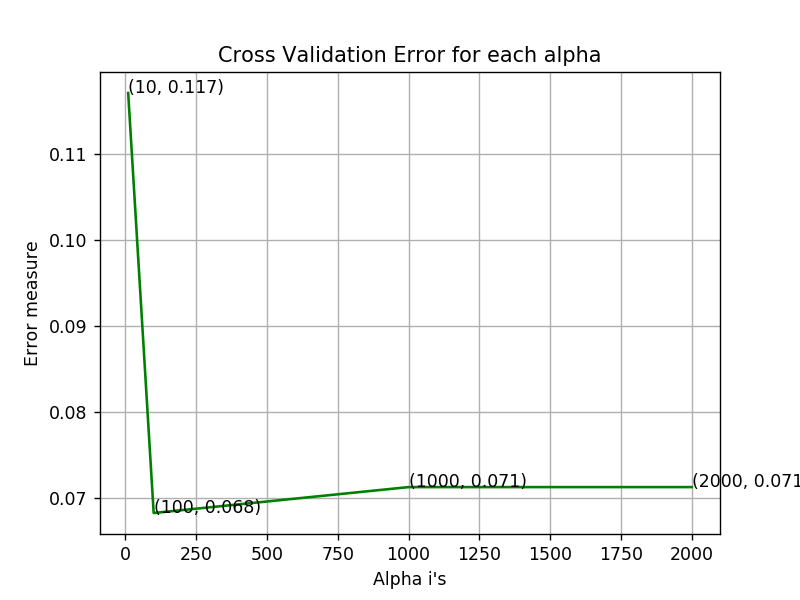

In [98]:
alpha=[10,100,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(x_trn_final, y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [99]:
x_cfl=XGBClassifier(n_estimators=100,nthread=-1)
x_cfl.fit(x_trn_final,y_trn_final,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(x_trn_final, y_trn_final)

predict_y = sig_clf.predict_proba(x_trn_final)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_trn_final, predict_y))
predict_y = sig_clf.predict_proba(x_cv_final)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_final, predict_y))
predict_y = sig_clf.predict_proba(x_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y))

For values of best alpha =  100 The train log loss is: 0.020643789539231766
For values of best alpha =  100 The cross validation log loss is: 0.06829001243736407
For values of best alpha =  100 The test log loss is: 0.05629753082983669


Number of misclassified points  1.0999999999999999
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


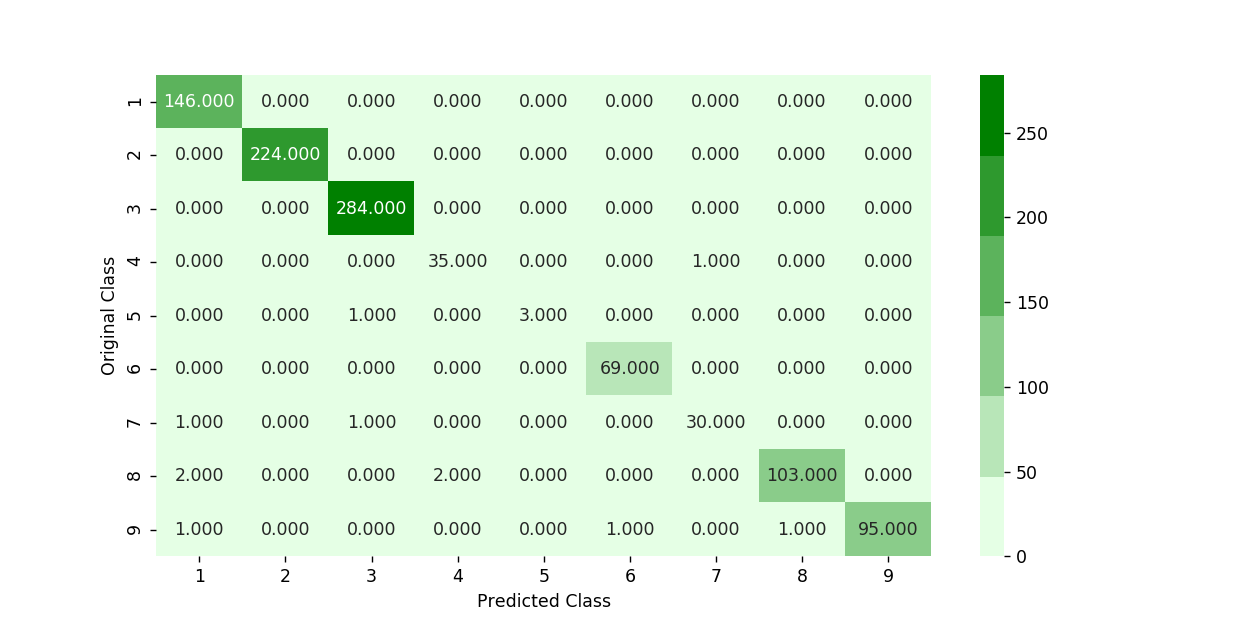

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


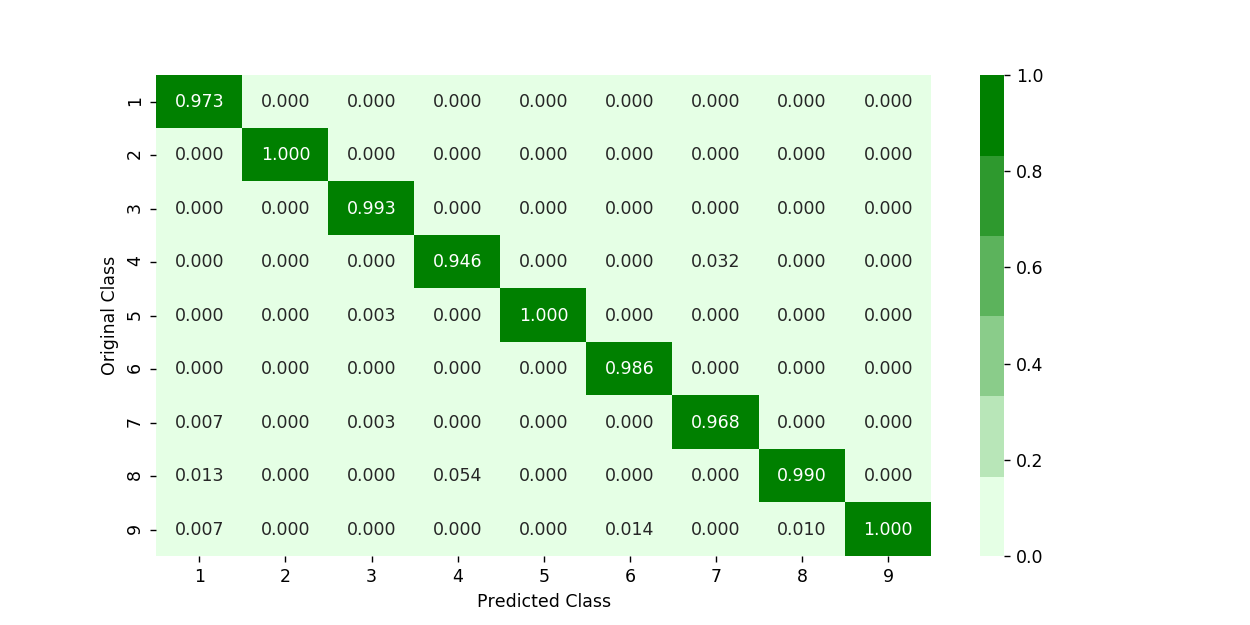

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


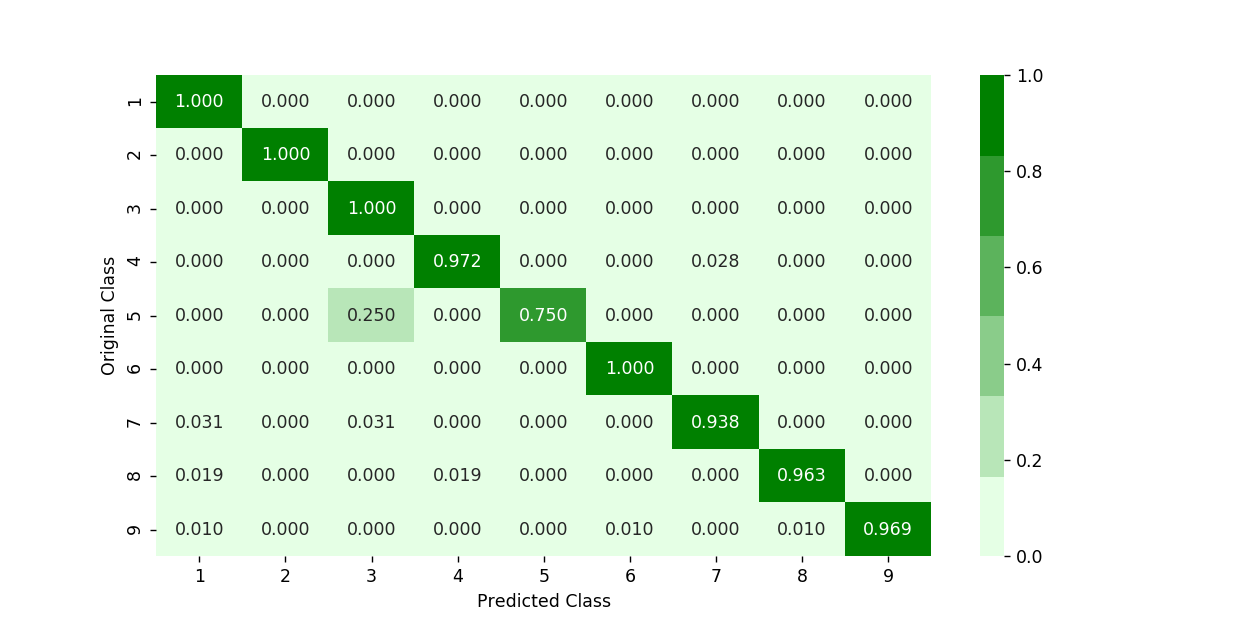

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [102]:
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test_final, predicted_y+1)

### NOTE : I am taking 5000 points this will have impact at log loss

### OBSERVATION:
* Log loss on train 0.020
* Log loss on cv 0.068
* Log loss on test 0.056